# 1.	Анализ данных по успеваемости студентов онлайн университета 

**Содержание работы:** <br>
[Codebook](#Codebook) <br>
[1. Описание и начальная работа с данными](#1.-Описание-и-начальная-работа-с-данными)<br>
[2. Расчёт потенциальной нагрузки на преподавателей](#2.-Расчет-потенциальной-нагрузки-на-преподавателей)<br>
[3. Выявление проблемных модулей](#3.-Выявление-проблемных-модулей)<br>
[4. Расчёт конверсии](#4.-Расчет-конверсии) <br>

## Codebook

`courses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `title` — название курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `field` — сфера, к которой относится курс. <br> <br><br>
`students.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `city` — город студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `birthday` — день рождения студента. <br> <br><br>
`course_contents.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `course_id` — идентификатор курса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `module_title` — название модуля, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_title` — название урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `lesson_token` — токен урока, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `is_video` — наличие видео *(true/false)*, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `is_homework` — наличие домашней работы *(true/false)*. <br>
<br><br>
`progresses.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `student_id` — идентификатор студента, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `course_id` — идентификатор курса, <br> <br><br>
`progress_phases.csv` содержит следующие значения: <br><br>
&nbsp;&nbsp;&nbsp;&nbsp; `progress_id` — идентификатор прогресса, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `module_number` — номер модуля, <br>
&nbsp;&nbsp;&nbsp;&nbsp; `lesson_number` — номер урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `status` — статус прохождения урока, <br>
&nbsp;&nbsp;&nbsp;&nbsp;  `start_date` — дата начала, <br> 
&nbsp;&nbsp;&nbsp;&nbsp; `finish_date` — дата окончания. <br>
<br><br>

## 1. Описание и начальная работа с данными

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import calendar

In [2]:
# загружаем данные
courses = pd.read_csv('courses.csv')
courses.head(3)

Unnamed: 0                                id                    title  \
0           0  943306102e5b067d08a29094f37b8193  Java-разработчик c нуля   
1           1  17013cd19d25cb3f28dc1b2683721bb9       Веб-дизайн Базовый   
2           2  ac634845fb0350d0e9d49078aaa4b68f            Excel Базовый   

         field  
0  Development  
1       Design  
2     Business

In [3]:
course_contents = pd.read_csv('course_contents.csv')
course_contents.head(3)

course_id  module_number  \
0  04ba6d0b40670c43a209141fa01fa784              1   
1  04ba6d0b40670c43a209141fa01fa784              1   
2  04ba6d0b40670c43a209141fa01fa784              1   

                                        module_title  lesson_number  \
0  Введение в Motion Design. Тренды, разновидност...              1   
1  Введение в Motion Design. Тренды, разновидност...              2   
2  Введение в Motion Design. Тренды, разновидност...              3   

                                        lesson_title  \
0                                         Знакомство   
1  Введение в Motion Design. Тренды, разновидност...   
2                                    Домашняя работа   

                           lesson_token  is_video  is_homework  
0  aa344de3-1191-4e69-b485-61823118f71c      True        False  
1  246c8429-dd18-4f3a-a9fb-d3c07e7d6912      True        False  
2  c4377574-d117-45c7-8da5-dd7d1923517d     False         True

In [4]:
progresses = pd.read_csv('progresses.csv')
progresses.head(3)

id                        student_id  \
0  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
1  a9d173142534e33ce39146017f9c6835  e24062de06d301937b3b3a8e383e3e21   
2  da26551a71cd62bbab844e3e54af7f71  35a36d90b745992b59085c8d54a072e7   

                          course_id  
0  0770b1b039964228294f1f34b29fc2c1  
1  bf27a4bf4ada4c756451703ea62a914f  
2  6e4837f0a65c68efbfdd0594d6774701

In [5]:
progress_phases = pd.read_csv('progress_phases.csv')
progress_phases.head(3)

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2  a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   

                      start_date                    finish_date  
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00  
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00  
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00

In [6]:
students = pd.read_csv('students.csv')
students.head(3)

id_                                id    city    birthday
0  1325  35e8a1938b9a33d5e45c8f4451c4309a     NaN         NaN
1  7503  6c3e52be632fc50de9640147e4017dcd  Москва  1979-10-23
2  8972  2033122d7c9b24b36eebc468d5259642     NaN         NaN

In [7]:
# обьединяем датасеты:
main = pd.merge(progress_phases, progresses, left_on='progress_id', right_on='id', how='left')
main = pd.merge(main, courses, left_on='course_id', right_on='id', how='left')
main = main.merge(course_contents, on=['course_id', 'module_number', 'lesson_number'], how='left')
main.head(3)

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2  a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   

                      start_date                    finish_date  \
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   

                               id_x                        student_id  \
0  a387ab916f402cb3fbfffd29f68fd0ce  768c2987a744c51ce64a5993a2a94eaf   
1  a387ab916f402cb3fbfffd29f68fd0ce  768c2987a744c51ce64a5993a2a94eaf   
2  a387ab916f402cb3fbfffd29f68fd0ce  768c2987a744c51ce64a5993a2a94eaf   

                          course_id  Unnamed: 0  \
0  c9fcb746d51e41bc5a217002d081454b           7   
1  c9fcb746d51e41bc5a217002d081454b           7   
2  c9fcb746d51e41bc5a217002d081454b           7   

                               id_y               title   field  \
0  c9fcb746d51e41bc5a217002d081454b  Веб-дизайн PRO 2.0  Design   
1  c9fcb746d51e41bc5a217002d081454b  Веб-дизайн PRO 2.0  Design   
2  c9fcb746d51e41bc5a217002d081454b  Веб-дизайн PRO 2.0  Design   

                              module_title                     lesson_title  \
0                    Концептуальный дизайн                Практика — мокапы   
1  Специализация и личное позиционирование                      Интро курса   
2                    Концептуальный дизайн  Что такое концептуальный дизайн   

                           lesson_token  is_video  is_homework  
0  7df8adef-1259-4b72-9bf2-353c73389d06      True        False  
1  df1a1f20-cdf7-443d-b25b-0a4b990b84d9      True        False  
2  f23b1890-9365-406f-816b-04864cefe58f      True        False

In [8]:
# удаляем дублирующие столбцы:
main = main.drop(columns=['id_x', 'Unnamed: 0', 'id_y'])

In [9]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350677 entries, 0 to 350676
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   progress_id    350677 non-null  object
 1   module_number  350677 non-null  int64 
 2   lesson_number  350677 non-null  int64 
 3   status         350677 non-null  object
 4   start_date     350677 non-null  object
 5   finish_date    334508 non-null  object
 6   student_id     350677 non-null  object
 7   course_id      350677 non-null  object
 8   title          350677 non-null  object
 9   field          350677 non-null  object
 10  module_title   350677 non-null  object
 11  lesson_title   350677 non-null  object
 12  lesson_token   350677 non-null  object
 13  is_video       350677 non-null  bool  
 14  is_homework    350677 non-null  bool  
dtypes: bool(2), int64(2), object(11)
memory usage: 38.1+ MB


В итоговом датасете 350677 строк, следовательно, датасет был сформирован правильно.  
Перед началом анализа отредактируем датасет:

In [10]:
# переводим значения столбцов start_date и finish_date в datetime:
main['start_date'] = pd.to_datetime(main['start_date']).dt.strftime('%Y-%m-%d').astype('datetime64')
main['finish_date'] = pd.to_datetime(main['finish_date']).dt.strftime('%Y-%m-%d').astype('datetime64')

# переименуем колонку с курсами:
main = main.rename(columns={'title': 'course'})

#### Oбщее количество курсов в датасете:

In [11]:
main['course'].nunique()

15

#### Количество модулей на каждом курсе:

In [12]:
main.groupby('course')['module_title'].nunique().reset_index(name='module').sort_values('module')

course  module
4   PHP-разработчик с 0 до PRO. Часть 1       8
8        Веб-вёрстка для начинающих 2.0       8
0                         Excel Базовый       9
2               Java-разработчик c нуля       9
5              SMM-маркетолог от А до Я      11
1                      Java-разработчик      17
9                    Веб-дизайн PRO 2.0      17
10                   Веб-дизайн Базовый      17
14        Руководитель digital-проектов      17
3                     JavaScript с нуля      18
13        Интернет-маркетолог от Ingate      18
11                Веб-дизайн с нуля 2.0      19
6                             UX-дизайн      20
12                      Веб-разработчик      20
7                  Анимация интерфейсов      21

#### Количество уроков в каждом модуле на каждом курсе:

In [13]:
main.groupby(['course', 'module_title'])['lesson_title'].nunique().reset_index(
    name='lessons'
).rename(
    columns={'module_title': 'module'}
).sort_values(
    'lessons', ascending=False
)

course  \
194  Интернет-маркетолог от Ingate   
34         Java-разработчик c нуля   
195  Интернет-маркетолог от Ingate   
200  Интернет-маркетолог от Ingate   
207  Интернет-маркетолог от Ingate   
..                             ...   
192                Веб-разработчик   
193                Веб-разработчик   
64        SMM-маркетолог от А до Я   
129             Веб-дизайн PRO 2.0   
111           Анимация интерфейсов   

                                                module  lessons  
194                                    Email-маркетинг       29  
34                                Числа, строки и даты       27  
195  SEO: больше, чем поисковая выдача (обновление ...       19  
200  Контекстная реклама в Yandex Direct и Google A...       17  
207         Таргетированная реклама в социальных сетях       16  
..                                                 ...      ...  
192                                           Проверка        1  
193                            Экзаменационная работа         1  
64                      Информация о дипломном проекте        1  
129                     Информация о дипломном проекте        1  
111                      Рабочие будни моушн-дизайнера        1  

[229 rows x 3 columns]

#### Медианное количество уроков в модуле на каждом курсе:

In [14]:
main.groupby(['course', 'module_title'])['lesson_title'].nunique().groupby('course').median().reset_index(name='median')

course  median
0                         Excel Базовый     5.0
1                      Java-разработчик     7.0
2               Java-разработчик c нуля    10.0
3                     JavaScript с нуля     7.0
4   PHP-разработчик с 0 до PRO. Часть 1     4.0
5              SMM-маркетолог от А до Я     6.0
6                             UX-дизайн     3.5
7                  Анимация интерфейсов     3.0
8        Веб-вёрстка для начинающих 2.0     7.0
9                    Веб-дизайн PRO 2.0     5.0
10                   Веб-дизайн Базовый     3.0
11                Веб-дизайн с нуля 2.0     4.0
12                      Веб-разработчик     2.0
13        Интернет-маркетолог от Ingate     6.5
14        Руководитель digital-проектов     5.0

#### Количество учеников на каждом курсе:

In [15]:
main.groupby('course')['student_id'].nunique().reset_index(name='students').sort_values('students')

course  students
5              SMM-маркетолог от А до Я       506
10                   Веб-дизайн Базовый       518
2               Java-разработчик c нуля       581
7                  Анимация интерфейсов       598
12                      Веб-разработчик       628
14        Руководитель digital-проектов       685
1                      Java-разработчик       763
0                         Excel Базовый       782
4   PHP-разработчик с 0 до PRO. Часть 1       854
3                     JavaScript с нуля       966
6                             UX-дизайн      1151
9                    Веб-дизайн PRO 2.0      1711
8        Веб-вёрстка для начинающих 2.0      2004
11                Веб-дизайн с нуля 2.0      2014
13        Интернет-маркетолог от Ingate      2168

#### Минимальный, максимальный, средний, медианный возраст студентов:

In [16]:
# удалим строки с отсутствующими значениями:
students = students.dropna()

In [17]:
# изменим тип данных в столбке birthday:
students['birthday'] = pd.to_datetime(students['birthday'], errors = 'coerce')

In [18]:
# Определим возраст студентов:
students['age'] = (dt.datetime.now() - students['birthday']).astype('<m8[Y]')
students.head(3)

id_                                id        city   birthday   age
1   7503  6c3e52be632fc50de9640147e4017dcd      Москва 1979-10-23  43.0
7  11070  35a36d90b745992b59085c8d54a072e7  Красноярск 1991-08-15  31.0
8  11756  37e8e8179295ae764524223086b0b568      Москва 1987-08-24  35.0

In [19]:
# Отфильтруем данные, установив диапозон возраста студентов от 18 до 55 лет:
students = students[(students['age'] > 18) & (students['age'] < 55)]

In [20]:
# минимальный возраст студентов:
students['age'].min()

19.0

In [21]:
# максимальный возраст студентов:
students['age'].max()

54.0

In [22]:
# средний возраст студентов:
round(students['age'].mean(), 2)

32.23

In [23]:
# медианный возраст студентов:
students['age'].median()

32.0

#### Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе:

In [24]:
# создадим отдельный датасет:
dat1 = main[['student_id', 'course']]
dat2 = dat1.merge(students, left_on='student_id', right_on='id', how='left')
dat2 = dat2.drop(columns=['id_', 'id'])
dat2.head(3)

student_id              course             city  \
0  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0  Санкт-Петербург   
1  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0  Санкт-Петербург   
2  768c2987a744c51ce64a5993a2a94eaf  Веб-дизайн PRO 2.0  Санкт-Петербург   

    birthday   age  
0 1984-11-30  38.0  
1 1984-11-30  38.0  
2 1984-11-30  38.0

In [25]:
# минимальный, максимальный, средний, медианный возраст студентов на каждом курсе:
dat2.groupby('course')['age'].agg(['min', 'mean', 'median', 'max']).reset_index()

course   min       mean  median   max
0                         Excel Базовый  19.0  35.750937    36.0  54.0
1                      Java-разработчик  19.0  32.095791    31.0  54.0
2               Java-разработчик c нуля  19.0  32.074202    31.0  53.0
3                     JavaScript с нуля  19.0  30.805198    30.0  54.0
4   PHP-разработчик с 0 до PRO. Часть 1  19.0  32.823215    32.0  54.0
5              SMM-маркетолог от А до Я  20.0  31.284780    30.0  54.0
6                             UX-дизайн  19.0  32.790403    32.0  53.0
7                  Анимация интерфейсов  19.0  32.388607    32.0  53.0
8        Веб-вёрстка для начинающих 2.0  19.0  30.850464    30.0  54.0
9                    Веб-дизайн PRO 2.0  19.0  30.993297    30.0  54.0
10                   Веб-дизайн Базовый  19.0  31.086335    30.0  53.0
11                Веб-дизайн с нуля 2.0  19.0  30.662808    30.0  54.0
12                      Веб-разработчик  19.0  30.122340    29.0  53.0
13        Интернет-маркетолог от Ingate  19.0  33.730670    33.0  54.0
14        Руководитель digital-проектов  23.0  34.599700    34.0  50.0

#### Диаграммы распределения студентов по курсам:

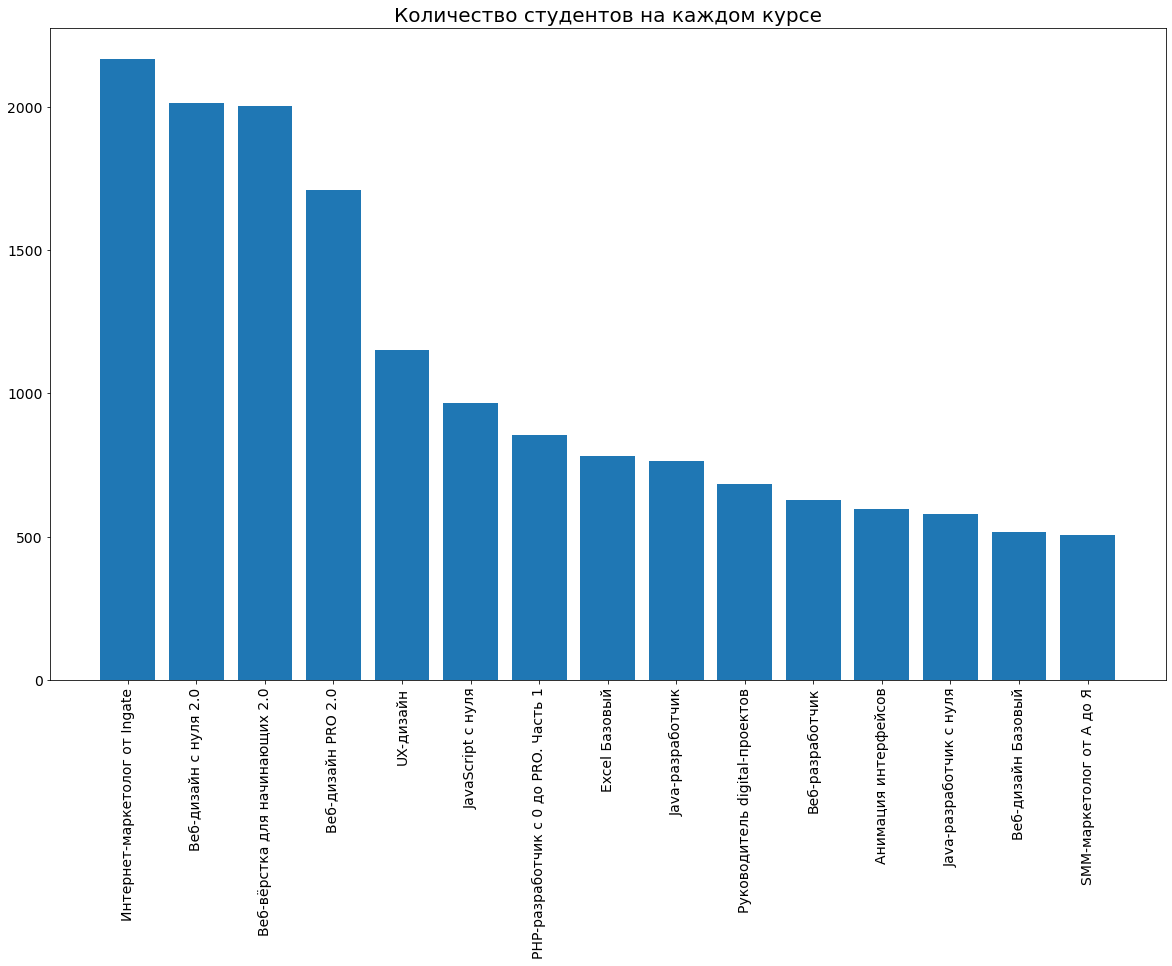

In [26]:
# сохраняем в переменную необходимые данные:
course_stud = main.groupby(['course', 'field'])['student_id'].nunique().reset_index(name='students').sort_values('students', ascending=False)

fig, ax = plt.subplots(figsize=(20, 12))

# строим график:
ax.bar(course_stud['course'], course_stud['students'])

# добавляем заголовок:
ax.set_title('Количество студентов на каждом курсе', fontsize=20)

# увеличиваем шрифт меток:
plt.xticks(rotation = 90, fontsize=14)
plt.yticks(fontsize=14)
plt.show()


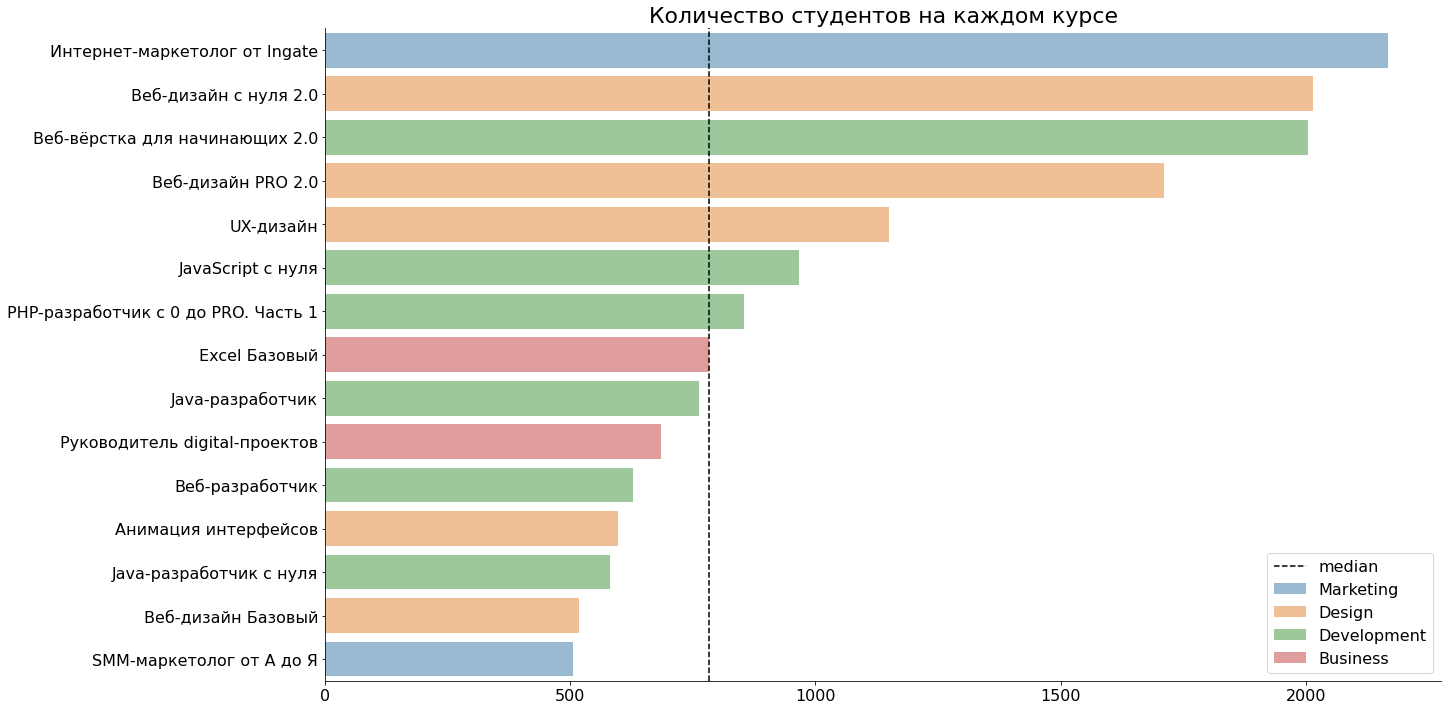

In [27]:
fig, ax = plt.subplots(figsize=(20, 12))

# строим график 
sns.barplot(x = 'students', y = 'course', data = course_stud, hue = 'field', dodge = False, alpha = 0.5)

# строим медиану
plt.axvline(course_stud['students'].median(), color='k', linestyle='--', label='median')

# скрываем заголовки осей 
ax.set_ylabel('')    
ax.set_xlabel('')

# добавляем заголовок и увеличиваем шрифт меток 
ax.set_title('Количество студентов на каждом курсе', fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

# скрываем верхнюю и правую рамки графика
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')

plt.show()

### Вывод:
В ходе анализа полученных данных были сделаны следующие выводы:  

Образовательная программа состоит из 15 курсов. В каждом курсе присутствуют от 8 до 21 модулей. Меньше всего модулей приходится на курсы: PHP-разработчик с 0 до PRO. Часть 1 и Веб-вёрстка для начинающих 2.0 по 8 модулей, Excel Базовый и Java-разработчик c нуля по 9. Наибольшее число модулей на курсах: Веб-дизайн с нуля 2.0 - 19, UX-дизайн - 20, Веб-разработчик - 20, Анимация интерфейсов - 21.  

Медиальное значение количества уроков показывает, что большенство курсов средней интенсивности, за исключением 'Java-разработчик c нуля', в нем наблюдается больше всех уроков. В курсах 'Анимация интерфейсов', 'Веб-дизайн Базовый', 'Веб-разработчик' значение медианы не превышает 3, что говорит нам о том, что они менее интенсивны.

На образовательной платформе обучаются студенты возрастом от 19 до 54 лет. Медианый возраст студентов в большинстве курсов не превышает 32 года, за исключение курсы 'Excel Базовый', 'Интернет-маркетолог от Ingate' и 'Руководитель digital-проектов'. В этих курсах наблюдается преобладающее количество студентов старшего возраста. Так же на курсе 'Руководитель digital-проектов' замечено отклонение диапозона: от 23 до 50 лет. 

Среди студентов самые популярные курсы: 'Веб-дизайн PRO 2.0', 'Веб-вёрстка для начинающих 2.0', 'Веб-дизайн с нуля 2.0', 'Интернет-маркетолог от Ingate', в каждом из которых насчитывается  более 1700 человек. Менее популярные курсы оказались: 'SMM-маркетолог от А до Я', 'Веб-дизайн Базовый', в которых численность не превышает 520 человек.

По полученным графикам видно, что больше всего студентов учится по направлению Design и Development. Менее популярное направление оказалось Business.  Marketing с учетом самого востребованного среди студентов курса 'Интернет-маркетолог от Ingate' занимает всего лишь 3 место.

## 2. Расчет потенциальной нагрузки на преподавателей

#### Расчет количества студентов в каждом месяце для каждого курса, которые начинали выполнение первой домашней работы в каждом месяце за всю историю.

In [28]:
# создаем датасет домашними заданиями каждого курса:
hw_1 = main[main['is_homework'] == True]

# определяем в каком модуле курса первое домашнее задание:
hw_2 = main[main['is_homework'] == True].groupby('course')['module_number'].min().reset_index()

# обьединяем датасеты:
hw = hw_2.merge(hw_1, how = 'left').fillna(0)

# добавляем столбец date c годом и месяцем начала урока:
hw['date'] = hw['start_date'].dt.to_period("M").astype('str')

# добавляем счетчик:
hw['student'] = 1

# рассчитываем количество студентов в каждом месяце для каждого курса: 
hw = hw.groupby(['course', 'date'])['student'].count().reset_index().sort_values('date')

# поворачиваем таблицу с помощью pivot
hw = hw.pivot(index='date', columns='course', values='student').fillna(0).astype('int')

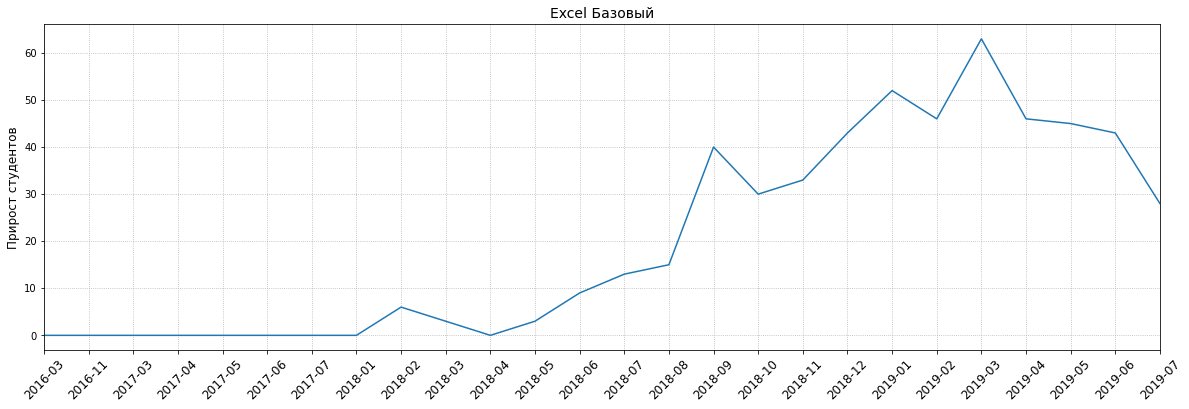

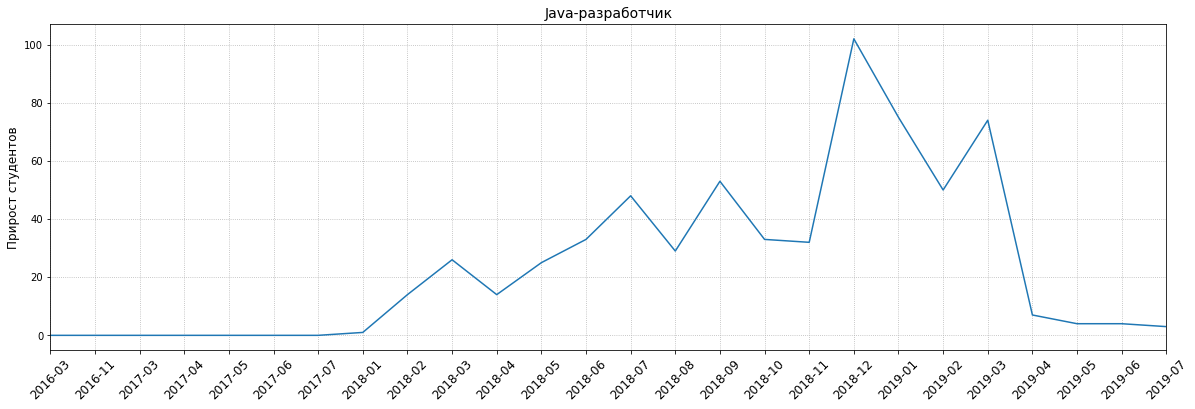

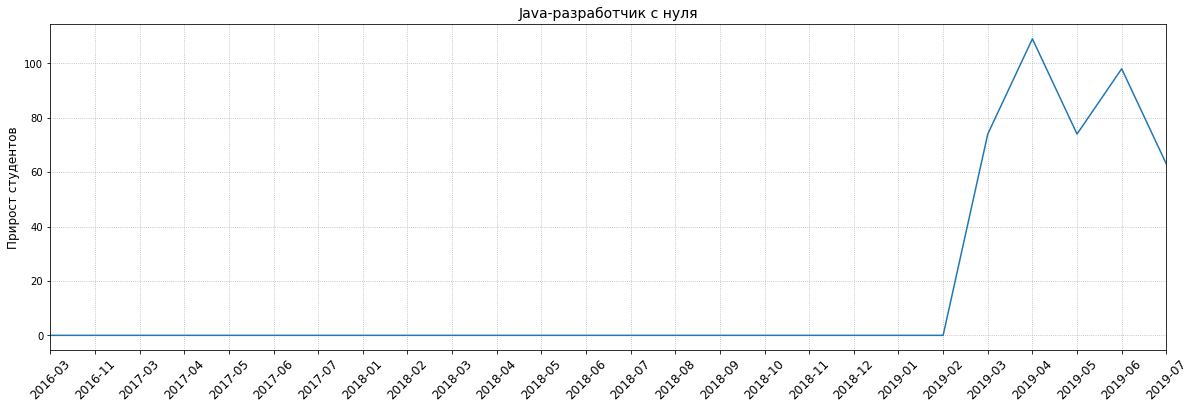

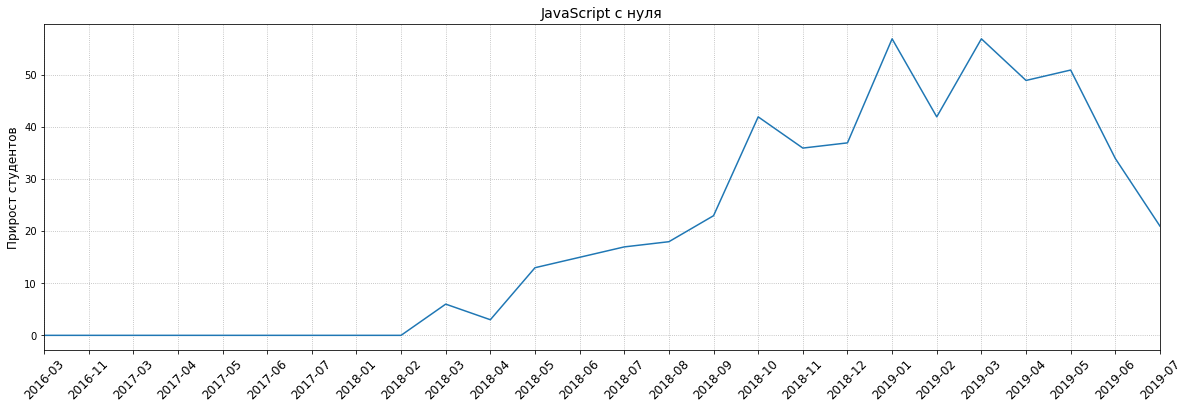

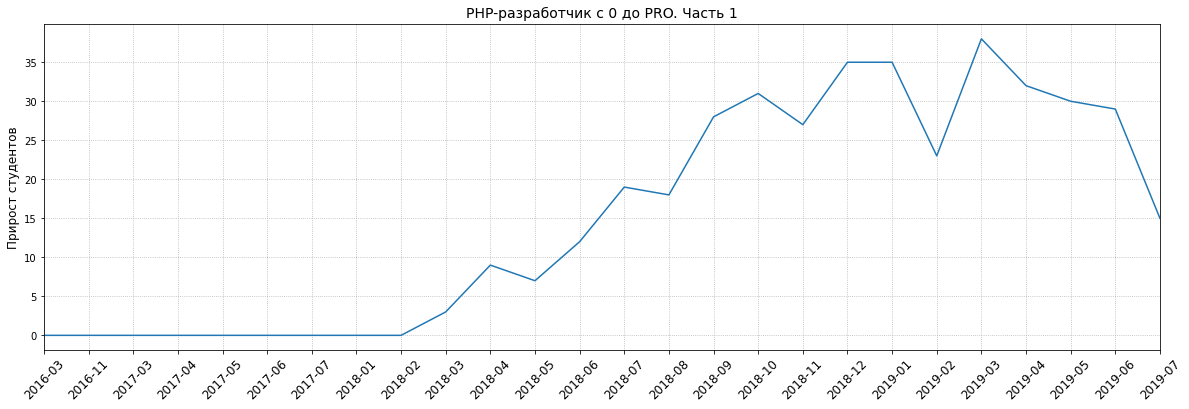

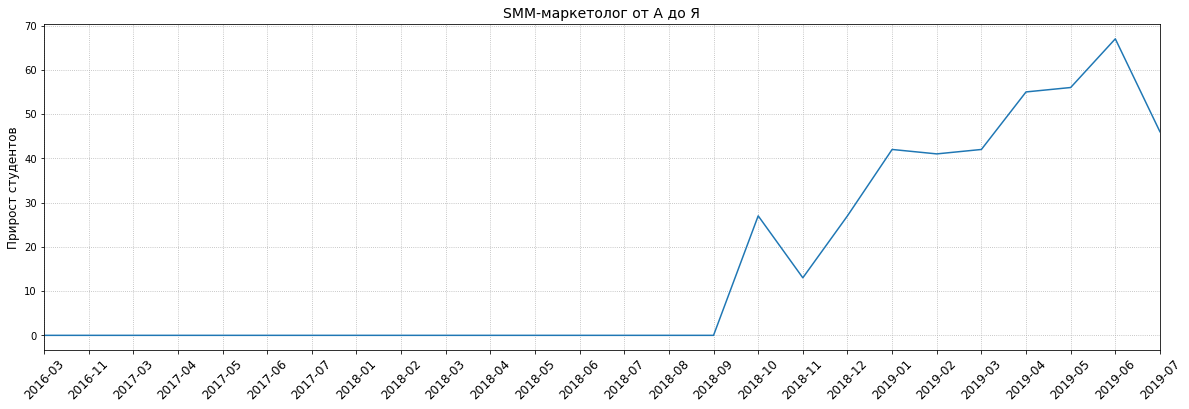

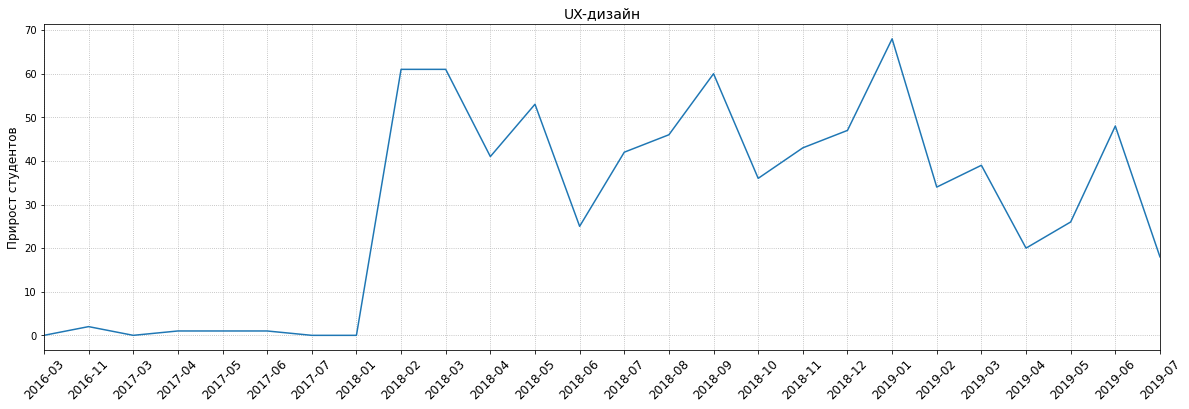

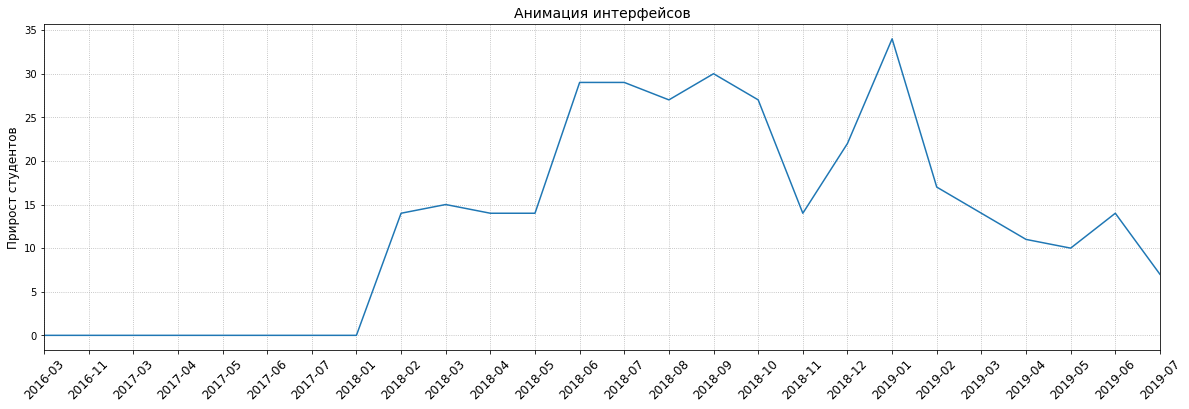

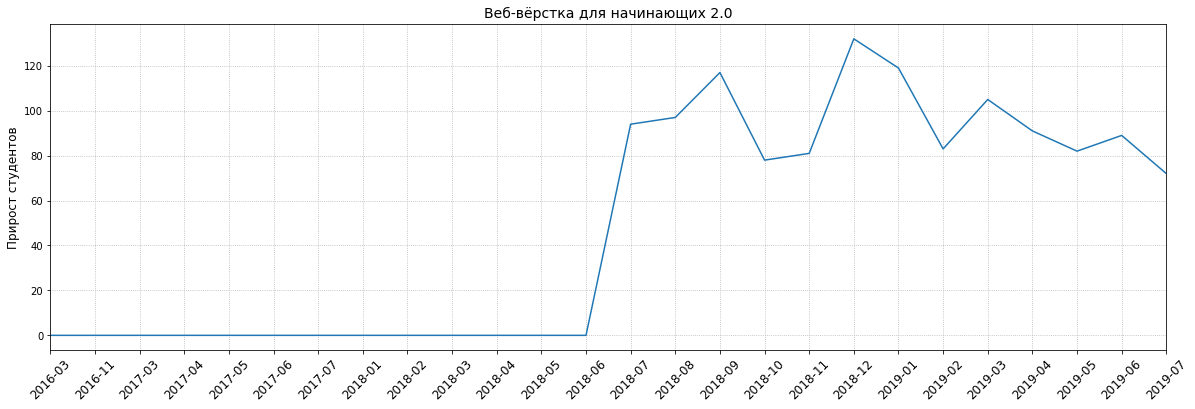

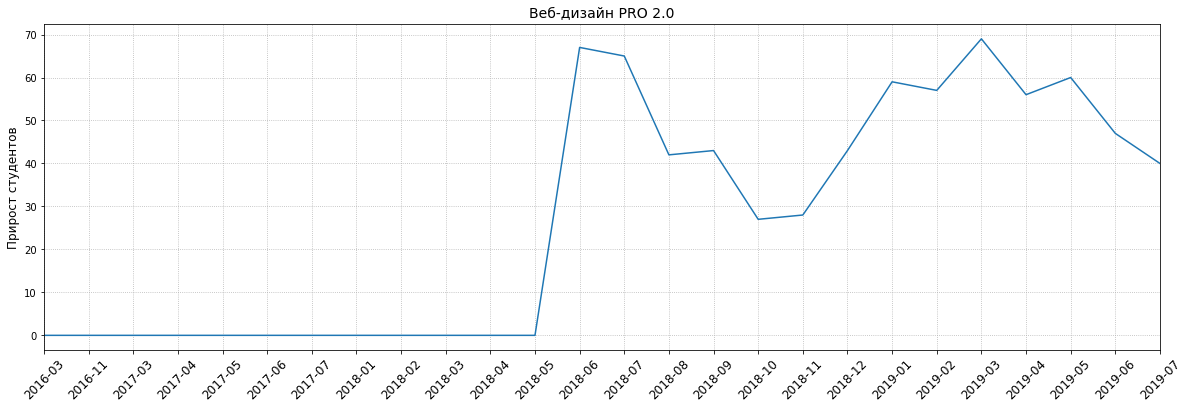

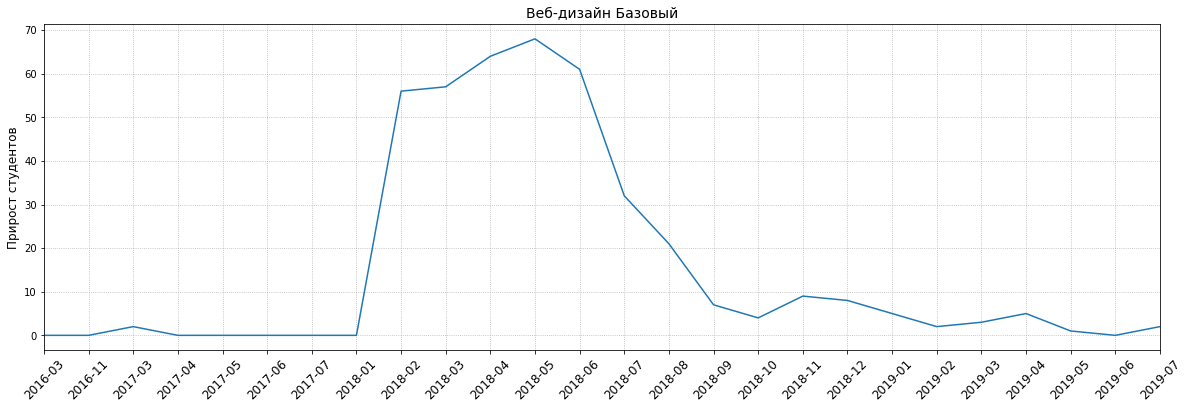

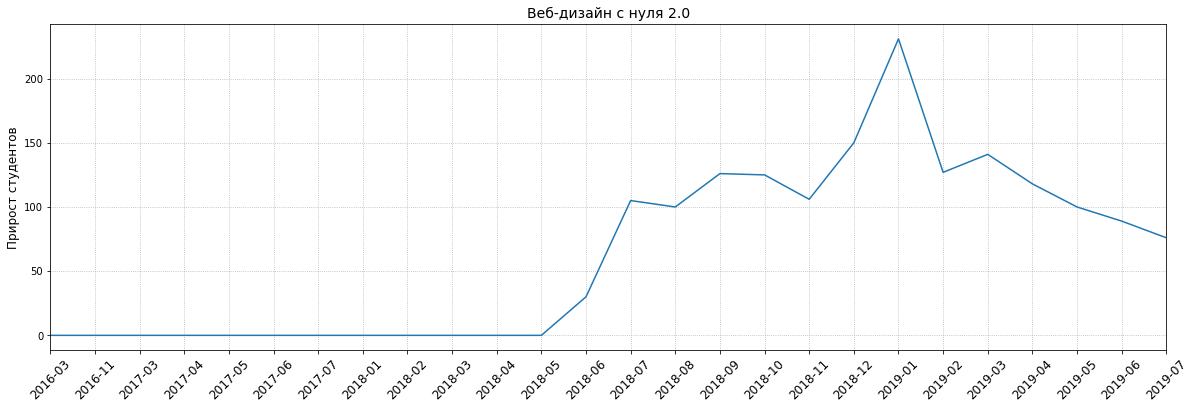

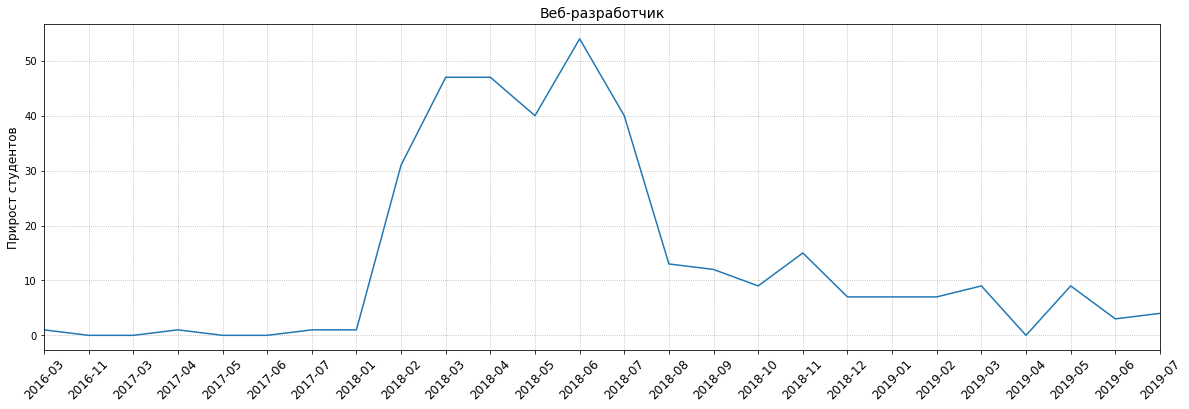

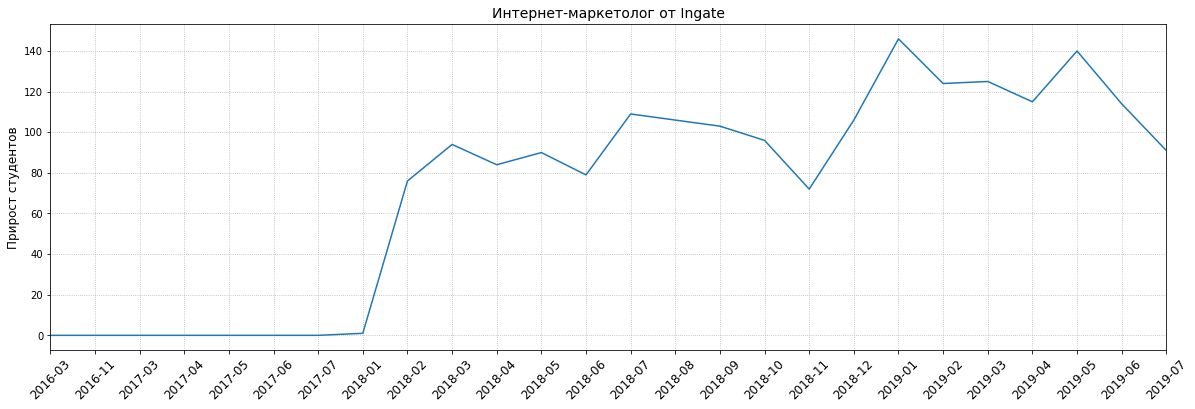

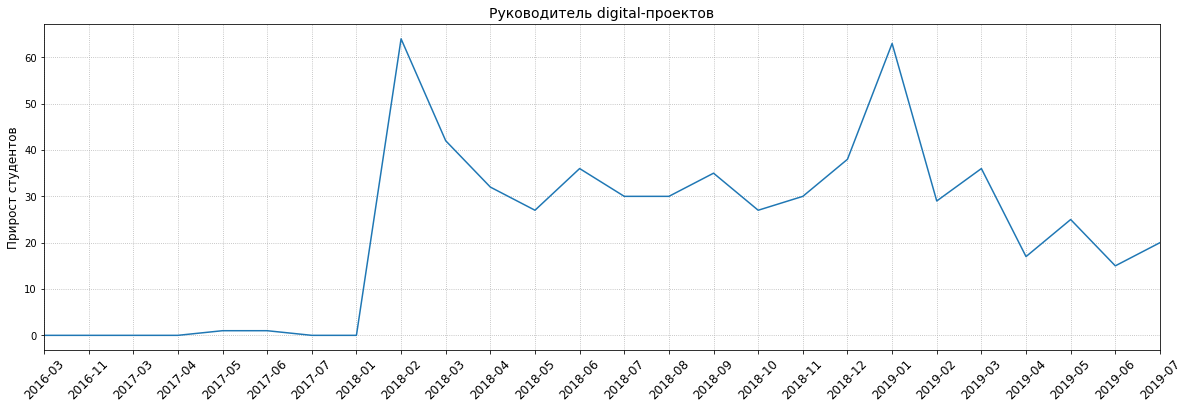

In [29]:
# строим графики:
for i in range(15):
    plt.figure(figsize=(20, 6))
    
    # сохраняем название столбца в переменную:
    course = hw.columns[i]

    plt.plot(hw.index, hw[course].values)
    
    # добавляем заголовок и увеличиваем шрифт меток:
    plt.ylabel('Прирост студентов', fontsize=12)
    plt.xticks( rotation=45, fontsize=12)
    plt.title(course, fontsize=14)
    
    # задаем горизонтальные границы графика:
    plt.xlim('2016-03', '2019-07') 
    
    # добавляем сетку:
    plt.grid(linestyle='dotted')
    plt.show()

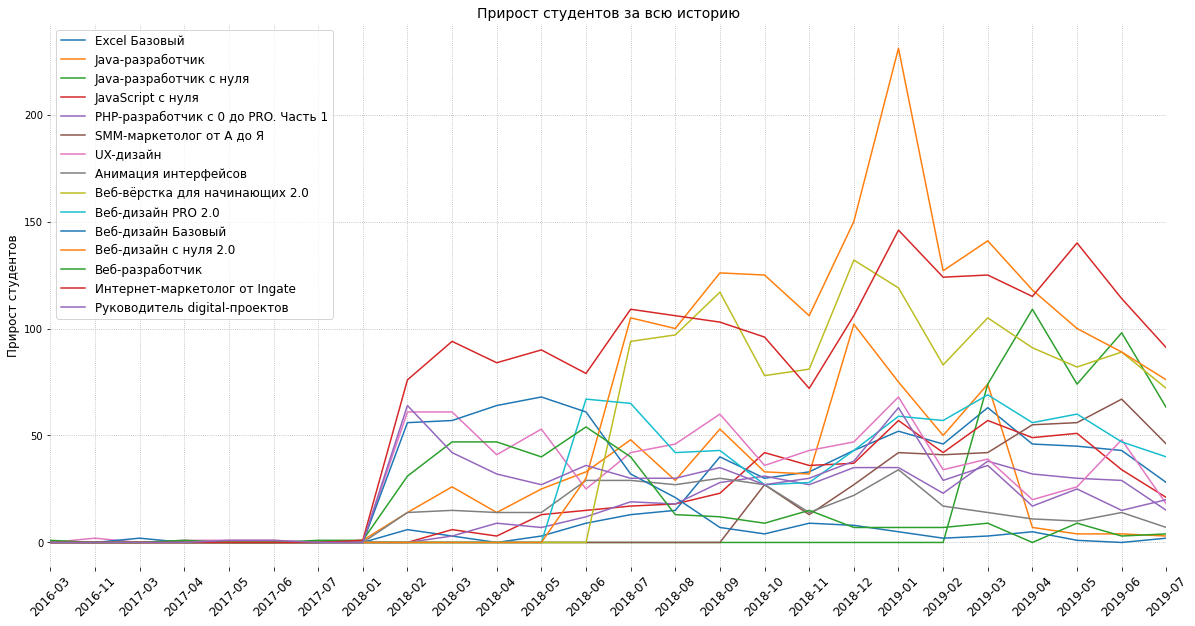

In [30]:
plt.figure(figsize=(20, 10))    

plt.plot(hw.index, hw.values)
    
# добавляем заголовок и увеличиваем шрифт меток:
plt.ylabel('Прирост студентов', fontsize=12)
plt.xticks( rotation=45, fontsize=12)
plt.title('Прирост студентов за всю историю', fontsize=14)
    
# задаем горизонтальные границы графика:
plt.xlim('2016-03', '2019-07') 
    
# добавляем сетку:
plt.grid(linestyle='dotted')

# добавляем легенду:
plt.legend(hw.columns, fontsize=12)

# скрываем рамки графика
plt.box(False)

plt.show()

#### Расчет количества прогрессов по выполнению домашних работ в каждом месяце за всю историю для каждого курса.

In [31]:
# на основе главного датасета формируем датасет с необходимыми колонками:
hw_compl_time = main[main['is_homework'] == True].loc[:, ['course', 'start_date', 'finish_date']]

# пропущенные финишные даты запомняем значениями, равные датами начала работ:
hw_compl_time = hw_compl_time.fillna(method="ffill", axis=1)

# оставляем в start_date и finish_date только год и месяц:
hw_compl_time['start_date'] = hw_compl_time['start_date'].dt.strftime('%Y-%m').astype('datetime64')
hw_compl_time['finish_date'] = hw_compl_time['finish_date'].dt.strftime('%Y-%m').astype('datetime64')

# расчитываем сколько месяцев у студентов уходило на выполнение домашней работы:
hw_compl_time["range"]=hw_compl_time.apply(lambda x: pd.date_range(x["start_date"], x["finish_date"], freq="M"), axis=1).apply(lambda s: s.to_period("M").to_list())

# полученные списки с месяцами распределяем по всей колонке:
hw_compl_time = hw_compl_time.explode('range')

hw_compl_time.head(10)

course start_date finish_date    range
4              Веб-дизайн PRO 2.0 2018-06-01  2018-06-01      NaT
7              Веб-дизайн PRO 2.0 2018-06-01  2018-06-01      NaT
12  Интернет-маркетолог от Ingate 2018-03-01  2018-03-01      NaT
17  Интернет-маркетолог от Ingate 2018-02-01  2018-02-01      NaT
29          Веб-дизайн с нуля 2.0 2018-10-01  2018-10-01      NaT
37          Веб-дизайн с нуля 2.0 2019-01-01  2019-01-01      NaT
38          Веб-дизайн с нуля 2.0 2018-10-01  2019-01-01  2018-10
38          Веб-дизайн с нуля 2.0 2018-10-01  2019-01-01  2018-11
38          Веб-дизайн с нуля 2.0 2018-10-01  2019-01-01  2018-12
40          Веб-дизайн с нуля 2.0 2019-01-01  2019-01-01      NaT

При анализе полученного датасета можно заметить, что в столбце range в домашних заданиях на решение которых ушло больше месяца не учитывается последний месяц. Чтобы не потерять данные создадим второй датасет с финишными месяцами, а затем объединим их.

In [32]:
# первый датасет:

# создаем колонку со счетчиком:
hw_compl_time['count'] = 1

# суммируем домашние работы, группируя по месяцам и курсам:
hw_compl_time_start = hw_compl_time[hw_compl_time['finish_date'] == hw_compl_time['start_date']] \
                                    .groupby(['course', 'start_date'])['count'].count().reset_index()

# переименовываем колонку start_date:
hw_compl_time_start.rename(columns={'start_date': 'date'}, inplace = True)

# в столбце date оставляем только год и месяц:
hw_compl_time_start['date'] = hw_compl_time_start['date'].dt.strftime('%Y-%m')

In [33]:
# второй датасет:

# формируем второй датасет:
hw_compl_time_finish = hw_compl_time[hw_compl_time['finish_date'] != hw_compl_time['start_date']][['course', 'range', 'count']] \
                                                                            .reset_index().drop(columns=['index'])

# переименовываем колонку start_date:
hw_compl_time_finish.rename(columns={'range': 'date'}, inplace = True)

# в столбце date оставляем только год и месяц:
hw_compl_time_finish['date'] = hw_compl_time_finish['date'].dt.strftime('%Y-%m')

In [34]:
# объединяем полученные датасеты:
tables = [hw_compl_time_start, hw_compl_time_finish] 
result = pd.concat(tables)

# складываем данные двух датасетов:
result = result.groupby(['course', 'date'])['count'].sum().reset_index()

result

course     date  count
0                    Excel Базовый  2018-02     37
1                    Excel Базовый  2018-03      7
2                    Excel Базовый  2018-04     13
3                    Excel Базовый  2018-05     17
4                    Excel Базовый  2018-06     33
..                             ...      ...    ...
248  Руководитель digital-проектов  2019-03    301
249  Руководитель digital-проектов  2019-04    210
250  Руководитель digital-проектов  2019-05    230
251  Руководитель digital-проектов  2019-06    182
252  Руководитель digital-проектов  2019-07    110

[253 rows x 3 columns]

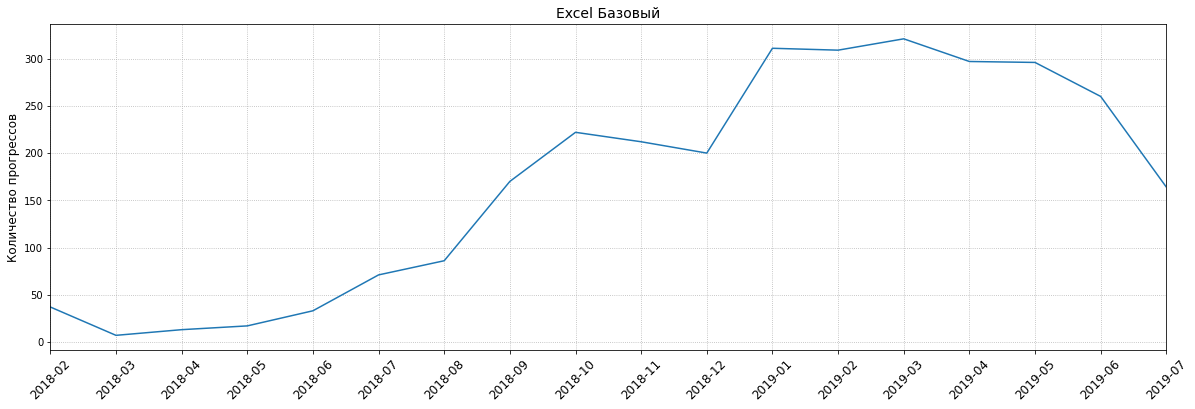

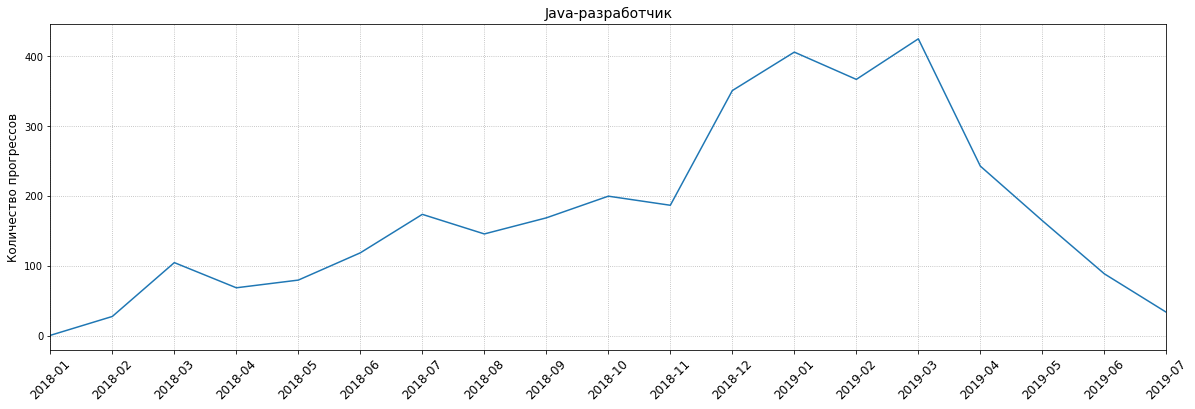

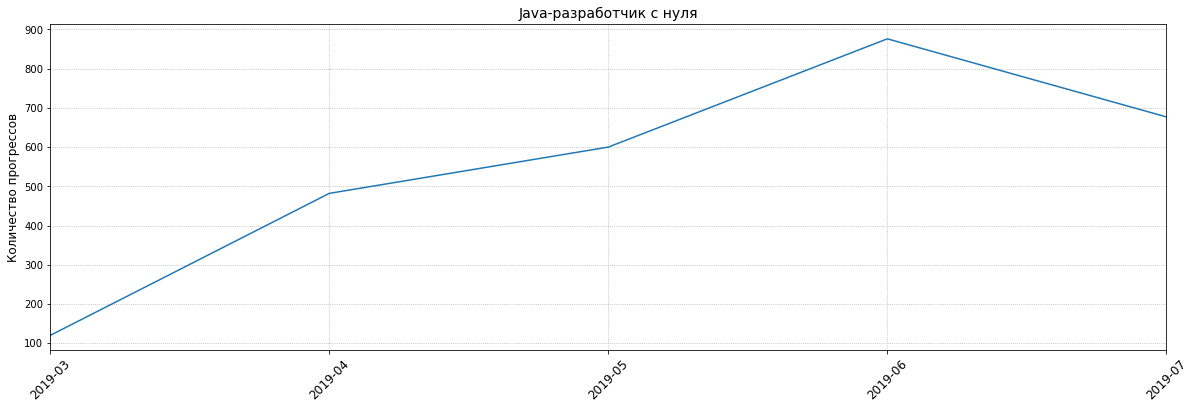

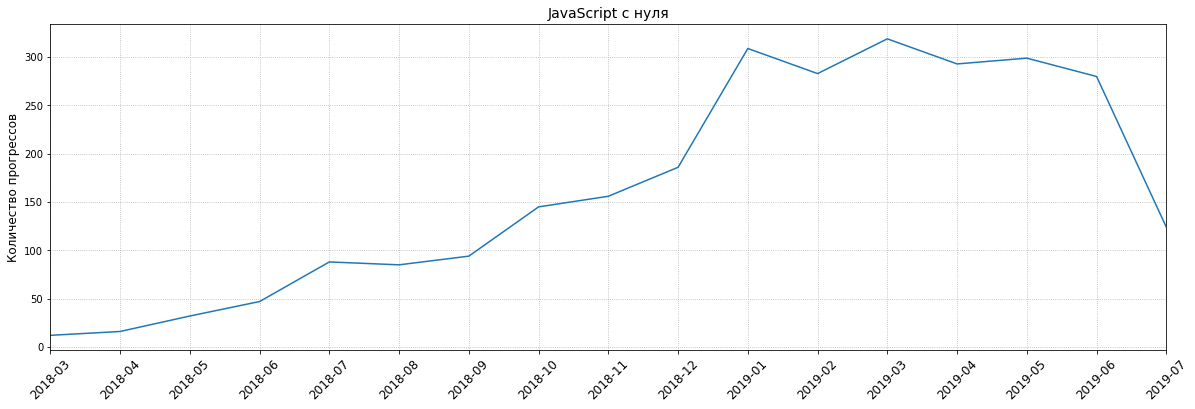

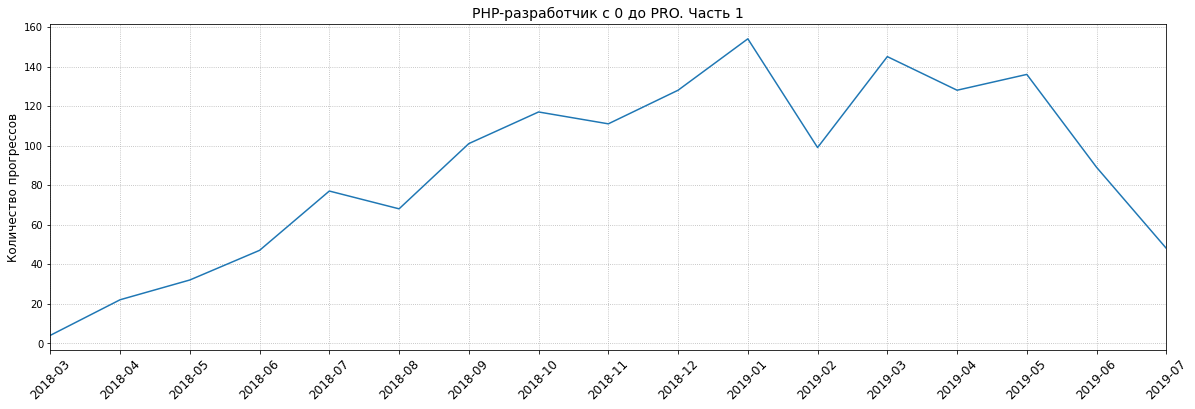

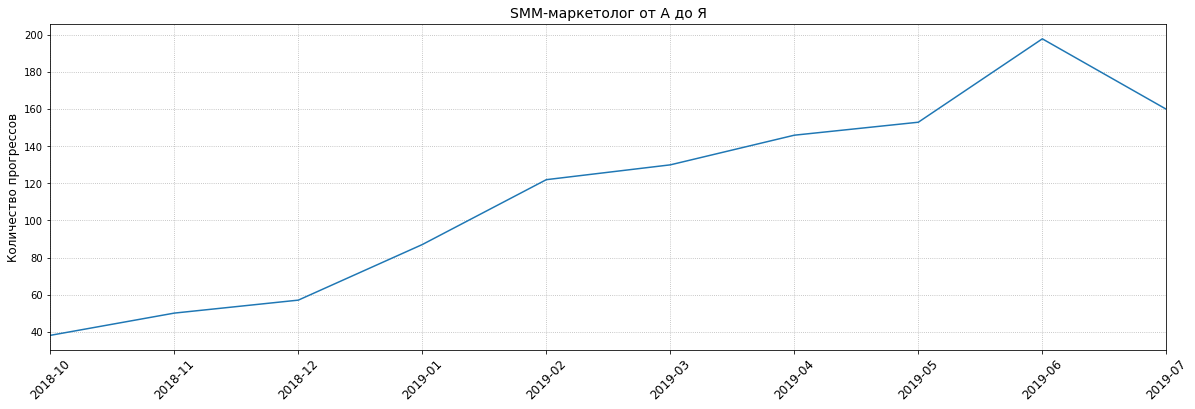

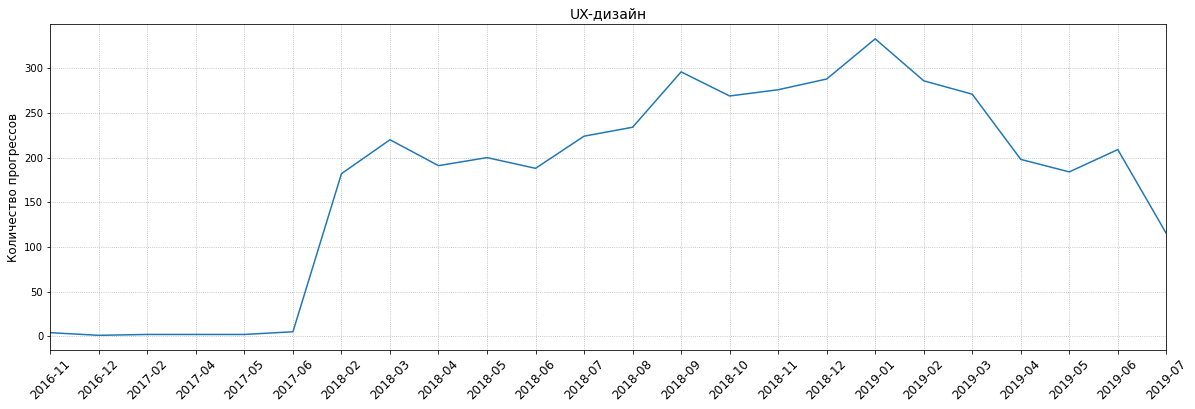

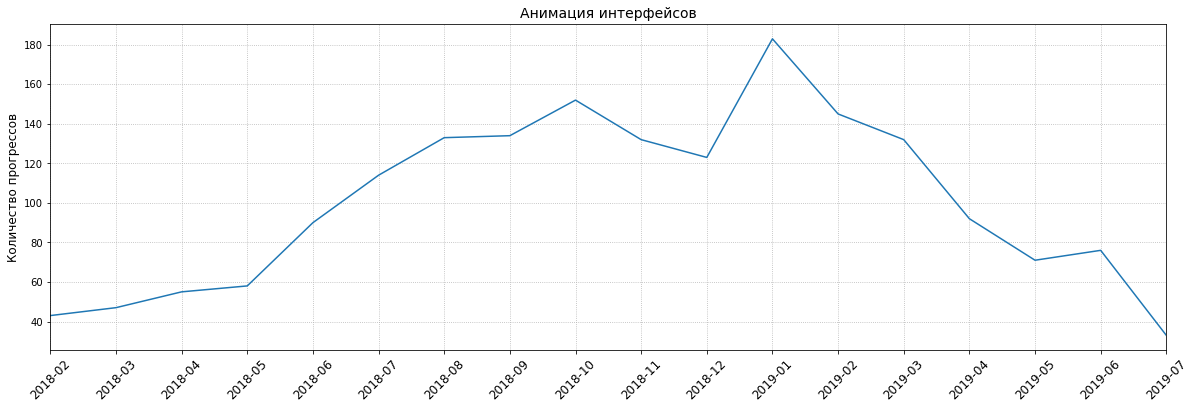

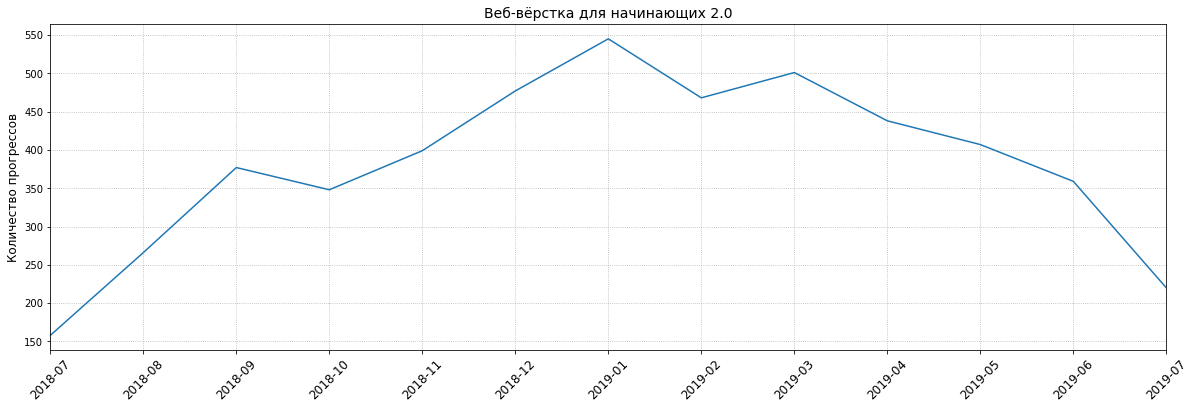

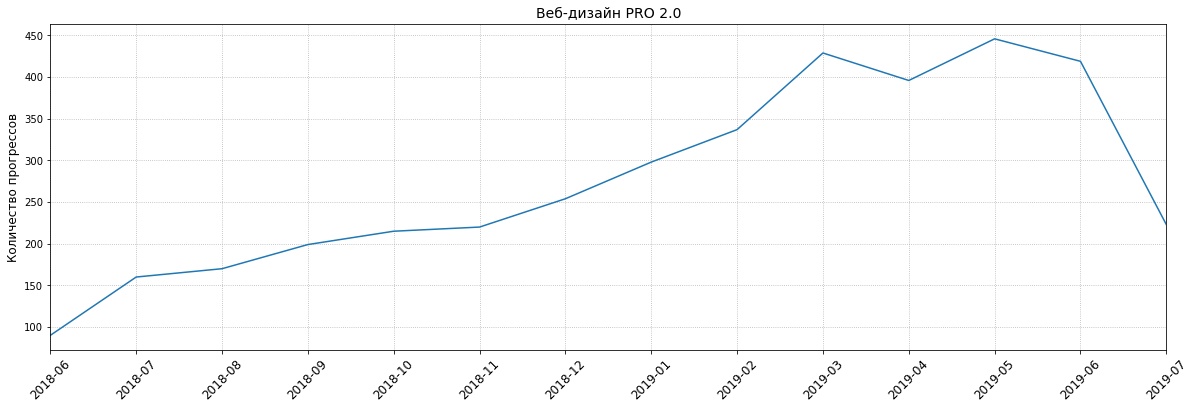

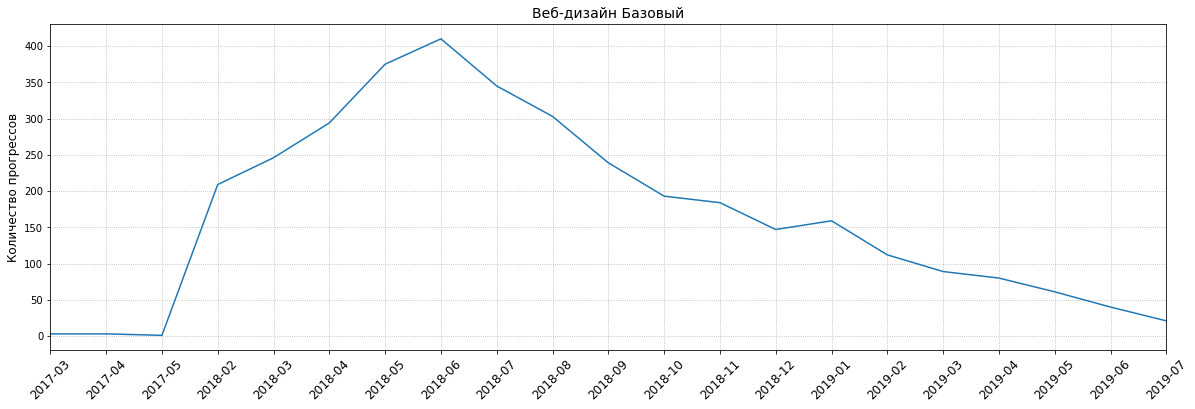

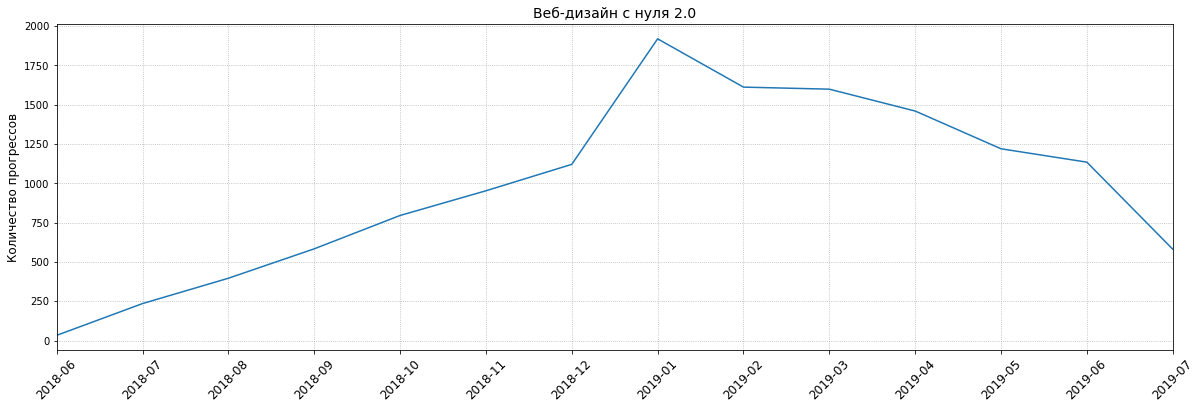

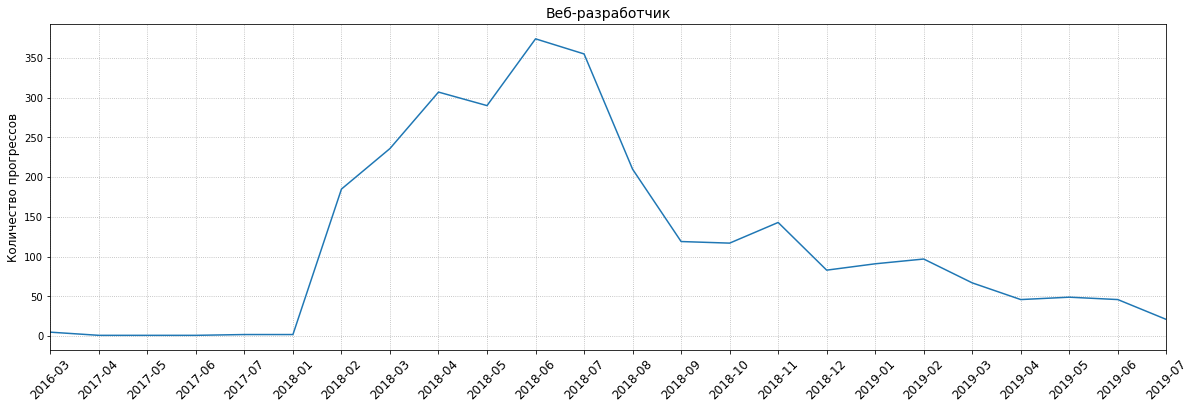

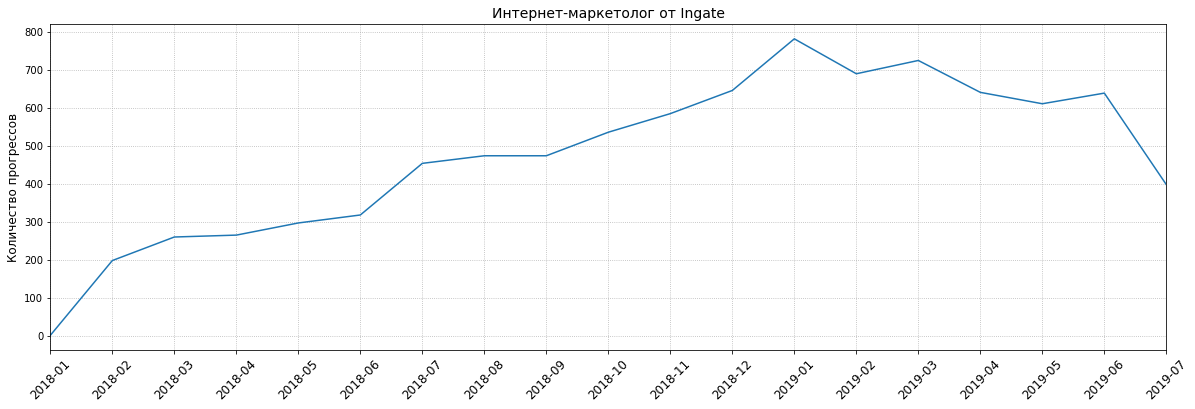

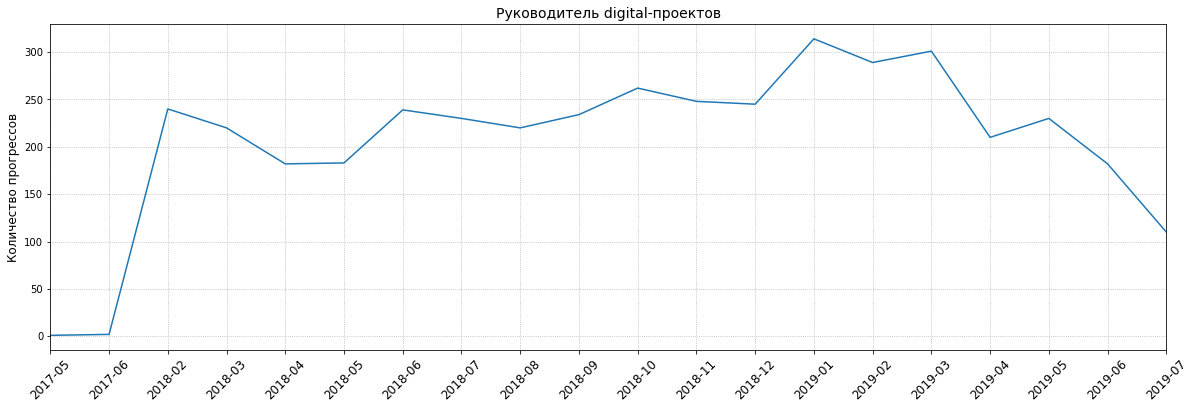

In [35]:
# строим графики:

# сохраняем в переменную название всех курсов:
courses = result['course'].unique()

for i in range(15):
    plt.figure(figsize=(20, 6))
    
    # сохраняем в переменную данные определенного курса:
    data = result[result['course'] == courses[i]]

    plt.plot(data['date'], data['count'])
    
    # добавляем заголовок и увеличиваем шрифт меток:
    plt.ylabel('Количество прогрессов', fontsize=12)
    plt.xticks( rotation=45, fontsize=12)
    plt.title(courses[i], fontsize=14)
    
    # задаем горизонтальные границы графика:
    plt.xlim(data['date'].min(), data['date'].max()) 
    
    # добавляем сетку:
    plt.grid(linestyle='dotted')
    plt.show()

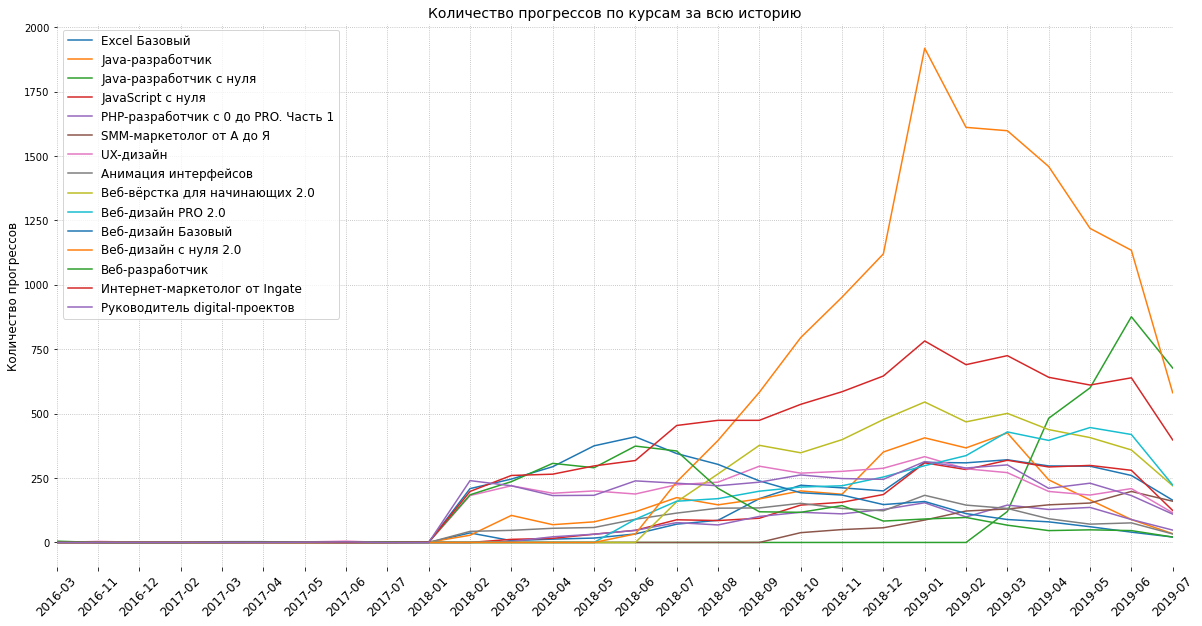

In [36]:
# поворачиваем таблицу с помощью pivot
data = result.pivot(index='date', columns='course', values='count').fillna(0).astype('int')

plt.figure(figsize=(20, 10))    

plt.plot(data.index, data.values)
    
# добавляем заголовок и увеличиваем шрифт меток:
plt.ylabel('Количество прогрессов', fontsize=12)
plt.xticks( rotation=45, fontsize=12)
plt.title('Количество прогрессов по курсам за всю историю', fontsize=14)
    
# задаем горизонтальные границы графика:
plt.xlim('2016-03', '2019-07')     
    
# добавляем сетку:
plt.grid(linestyle='dotted')

# добавляем легенду:
plt.legend(data.columns, fontsize=12)

# скрываем рамки графика
plt.box(False)

plt.show()

### Вывод:
Курс **'Excel Базовый'** - Первые студенты курса появились в марте 2018 года. В дальнейшем постоянный прирост студентов начался с мая 2018 и достиг пика в марте 2019, далее прирост стал двигаться по нисходящему тренду. Выполнение домашних работ студентами происходило по тому же сценарию.

Курс **'Java разработчик'** - Постепенный прирост начался в марте 2018 года и с июня 2018 года по ноября 2018 держался в коредоре прироста 25 - 50 человек в месяц. Далее в декабре 2018 года произошел сильный всплеск прироста студентов, достигнув за все время наблюдения пика в размере 100 человек. В дальнейшем прирост начал постепенно сокращаться и на июль 2019 года он прекратился. Выполнение домашних работ студентами происходило по тому же сценарию. Выполнять домашнее задания начали с января 2018 года и к октябрю 2018 года показатель достигал до 290 работ в месяц. С ноября 2018 года количество прогрессов стало возрастать и достигла пика в марте 2019 года 580 домашник работ за месяц. После чего количество прогрессов стало снижаться.

Курс **'Java разработчик с нуля'** - Прирост студентов на курс пришелся на февраль 2019 и в июне 2019 года достиг пика 72 человека, после прирост снизился. Количество прогресса увеличивалось по тому же сценарию и к июню 2019 года достигла 1000 выполненых домашних работ.

Курс **'JavaScript с нуля'** - С февраля 2018 года начался прирост студентов и в мае этого же года достиг пика в 13 человек. С июня 2018 года до конца наблюдения прирост держался в коридоре 5 - 12 студентов в месяц. В свою очередь количество прогресса с марта 2018 года по июнь 2019 года находилось в восходящем тренде и в пике достигало более 400 домашних работ. После показатель начал падать.

Курс **'PHP-разработчик с 0 до PRO. Часть 1'** - Прирост первых студентов начинается с февраля 2018 года. С мая 2018 по конец наблюдения держался в диапозоне 12 - 20 человек в месяц, кроме декабря 2018, на который приходится пик - 24 студента. Количество прогрессов с марта 2018 года по июль 2019 года держалось в районе 200 работ в месяц с чередой падений прогресса раз в 2 - 3 месяца.

Курс **'SMM-маркетолог от А до Я'** - С сентября 2018 года по июнь 2019 наблюдается положительная динамика прироста студентов. После достижения максимума в 67 студентов за месяц прирост начал снижаться. В свою очередь количество прогресса за весь период наблюдения только росло с небольшой просадкой в марте и мае 2019 года.

Курс **'UX-дизайн'** - Первые студенты на курс были зачислены в ноябре 2016 года и по январь 2018 года прирост насчитываел 1 - 2 в месяц. В феврале 2018 прирост сильно увеличилсяи за месяц достиг максимума за все время в 59 человек. После тенденция прироста постипенно начала снижаться. Если говорить о количестве прогресса, то с ноября 2016 по июль 2017 этот показатель в области нуля и только после показал сильную положительную динамику, которая до конца периода наблюдения держалась в районе от 200 до 500 работ за месяц.

Курс **'Анимация интерфейсов'** - Прирост студентов начался с января 2018 года и через год достиг пика в 18 человек, после чего до конца периода наблюдения держался в рамках 4-8 человек за месяц. Рост количества прогресса с момента поступления первых студентов в течение год с небольшими просадками (август - сентябрь, декабрь) рос и в январе 2019 года достиг максимума в более 250 выполненых домашних работ, после чего показатель начал падать.

Курс **'Веб-вёрстка для начинающих 2.0'** - Начало прироста студентов приходится на июнь 2018 года и за 3 месяца достигла показателя в 80 студентов за месяц, следом произошла просадка до показателя 36 человек, а с октября 2018 года прирост достиг максимума в 96 человек. С февраля до конца наблюдения прирост держался на уровне 60 - 80 человек. Количественный показатель с июля 2018 года по март 2019 года рос и достигал максимума в январе и марте 2019 года после рост начал снижаться.

Курс **'Веб-дизайн PRO 2.0'** - Прирост начался в мае 2018 и за месяц достиг пика в 51 человек, далее произошло резкое падения и до конца периода наблюдения не превышало 15 человек. Тем не менее, количество прогресса за это время держалось в восходящем тренде и к июню 2019 года достигла отметки в более 600 выполненых работ.

Курс **'Веб-дизайн Базовый'** - Первые студенты на курсе появились в марте 2017 года и только с января 2018 курс стал набирать популярность и к маю достиг отметки в 66 студентов за месяц, но после чего прирост резко сократился и до июля 2019 не привышал отметки в 6 человек за месяц. Количественный показатель прогресса с февраля по июль 2018 года уверенно рос и на протяжении последних 3-х месяцев держался на максимуме, свыше 500 работ. Но как и показатель прироста новых студентов он стал неуклонимо падать.

Курс **'Веб-дизайн с нуля 2.0'** - Старт прироста приходится на июнь 2018 года и к январю 2019 года достиг показателя в свыше 200 студентов, после чего прирост начал падать. Количество прогресса тем временем не отставало и к январю 2019 года достигла пика в 2400 работ, а после так же как и показатель прироста пошло по низходящей траектории.

Курс **'Веб-разработчик'** - Первых студентов на курс зачислили в марте 2016 года, но практически через 2 года с февраля 2018 показатель прироста начал показывать сильный рост и к июню достиг значения в 41 человек. После произошел резкий спад и к июлю 2019 года достиг прироста меньше 5 человек. По количеству процессов прослеживается похожая с показателем прироста динамика. С января года по июль 2018 наблюдается рост, с максимумами в июне - июле, а потом резкое падение.

Курс **'Интернет-маркитолог от ingate'** - С февраля 2018 года по июль 2019 прирост студентов держался в диапозоне 70 - 140 человек за месяц с пиками в январе и мае 2019 года. Количество процессов с января 2018 года по январь 2019 года достигла максимума в 1000 выполненных работ и до конца наблюдений держалось в пределах 650 - 1000 работ.

Курс **'Руководитель digital-проектов'** - Большой прирост студентов приходится на февраль 2018 и было достигнуто максимума в более 60 человек. С марта по декабрь 2018 года показатель снизился до 22 - 35 человек, после в январе прирост достиг 60 человек и очередное падение. Количество процессов за весь период держался в коридоре 230 - 480 работ за месяц и птковыми значениями в марте, октябре 2018 года и в феврале 2019 года.

Подводя общие итоги по всем курсам, можно сказать, что массовый прирост студентов на платформу в большей части курсов пришелся на февраль 2018 год. **'Веб-дизайн с нуля 2.0'**, **'Веб-дизайн PRO 2.0'**, **'Веб-вёрстка для начинающих 2.0'**, **'SMM-маркетолог от А до Я'**, **'Java разработчик с нуля'** являются молодыми курсами, т.к. были запущены намного позже. Достижение максимального прироста по многим курсам достигнуто в промежуток с середины 2018 года по февраль-март 2019 года, за исключением **'Java разработчик с нуля'** (июнь 2019 г.), **'SMM-маркетолог от А до Я'** (июнь 2019 г.) и **'UX-дизайн'** (январь-февраль 2018 г.). С марта 2019 года наблюдается падение прироста на многих курсах. Показатель количества процессов на каждом курсе преимущественно повторяет динамику показателя прироста.

## 3. Выявление проблемных модулей

#### Расчет минимальное, максимальное, среднее, медианное время прохождения каждого модуля для каждого курса

In [37]:
# выгружаем необходимые данные из основного датасета:
hw_days = main[main['is_homework'] == True].loc[:, ['course', 'module_title', 'module_number', 'start_date', 'finish_date']].dropna()

# определяем количество дней:
hw_days['days'] = (hw_days['finish_date'] - hw_days['start_date']).dt.days

In [38]:
# рассчитываем минимальное, максимальное, среднее, медианное время прохождения каждого модуля:
hw_days_result = hw_days.groupby(['course', 'module_title', 'module_number']).agg(['min', 'mean', 'median', 'max'])['days'] \
                                                                             .astype('int').reset_index().sort_values(['course', 'module_number'])
hw_days_result

course  \
1                    Excel Базовый   
2                    Excel Базовый   
5                    Excel Базовый   
6                    Excel Базовый   
4                    Excel Базовый   
..                             ...   
185  Руководитель digital-проектов   
177  Руководитель digital-проектов   
188  Руководитель digital-проектов   
180  Руководитель digital-проектов   
179  Руководитель digital-проектов   

                                          module_title  module_number  min  \
1                            Основной функционал Excel              1    0   
2              Основной функционал Excel (продолжение)              2    0   
5                    Формулы и функции Excel. Введение              3    0   
6    Формулы и функции Excel. Продолжаем работать с...              4    0   
4       Формулы и функции Excel. Более сложные формулы              5    0   
..                                                 ...            ...  ...   
185                  Решение факапов. Lean/TOC. Обзор.             12    0   
177                            Интеграционные проекты.             13    0   
188  Управление дизайнерами. Разработка дизайна по ...             14    0   
180                     Основы технической грамотности             15    0   
179  Контроль. Риски. Поощрения. Наказания. Обратна...             16    0   

     mean  median  max  
1       6       2  184  
2       4       2  185  
5       3       2   89  
6      10       3  328  
4       7       3  176  
..    ...     ...  ...  
185    21       7  212  
177    26      12  247  
188    14       8  199  
180     6       3  132  
179    18       7  356  

[190 rows x 7 columns]

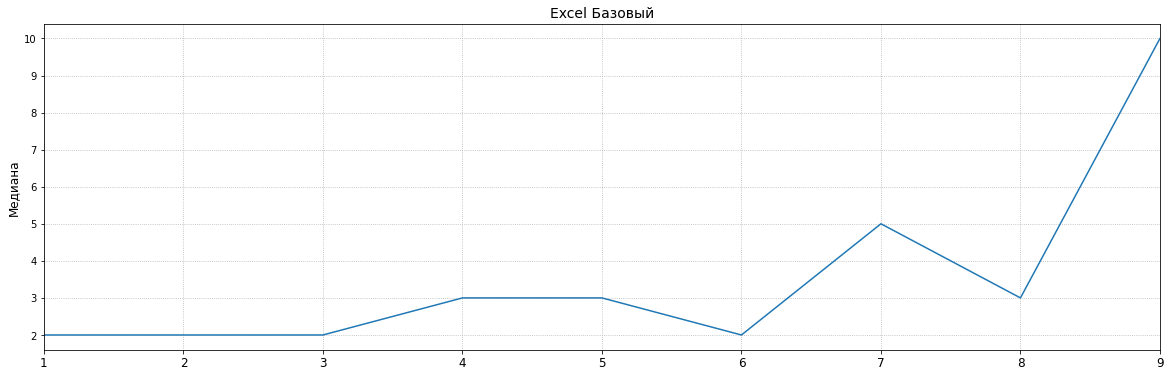

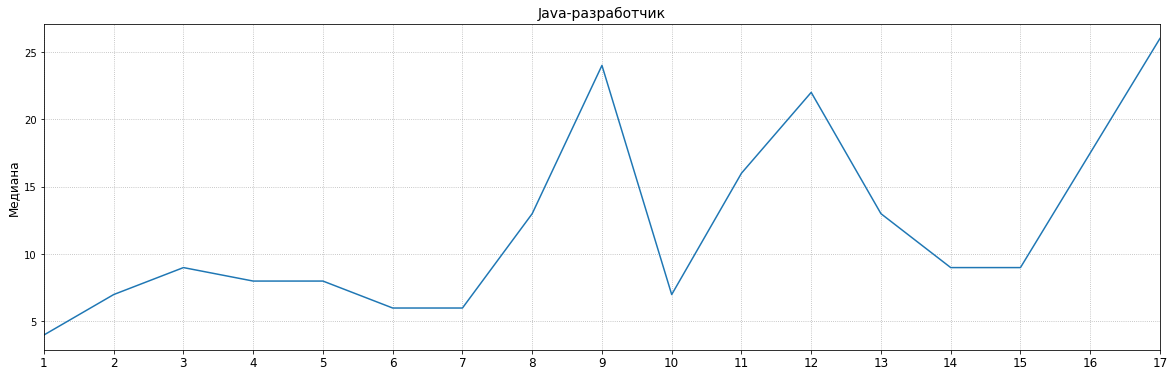

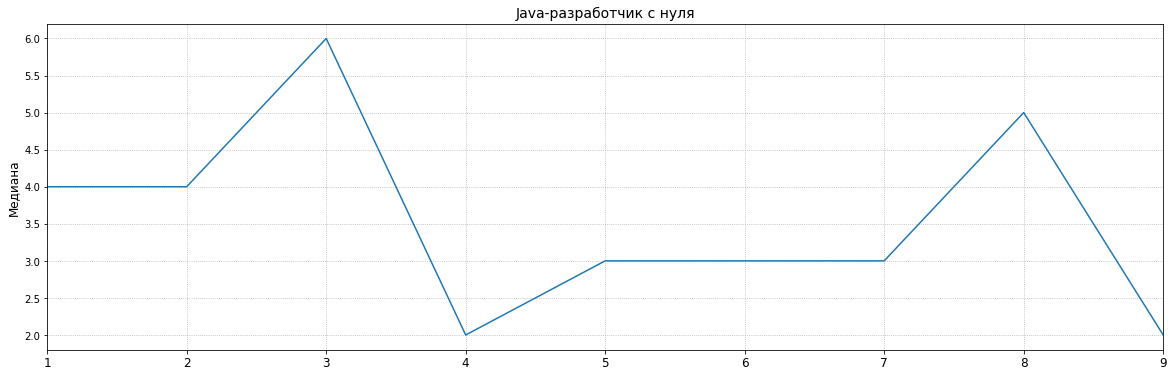

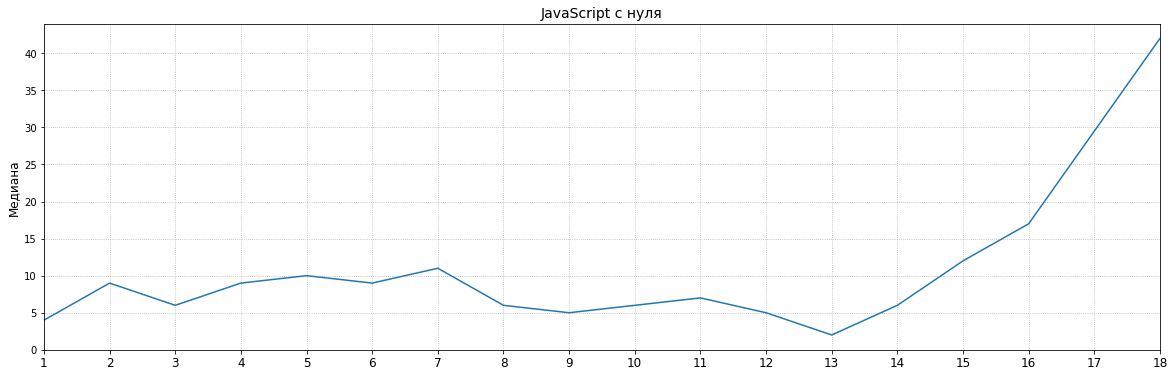

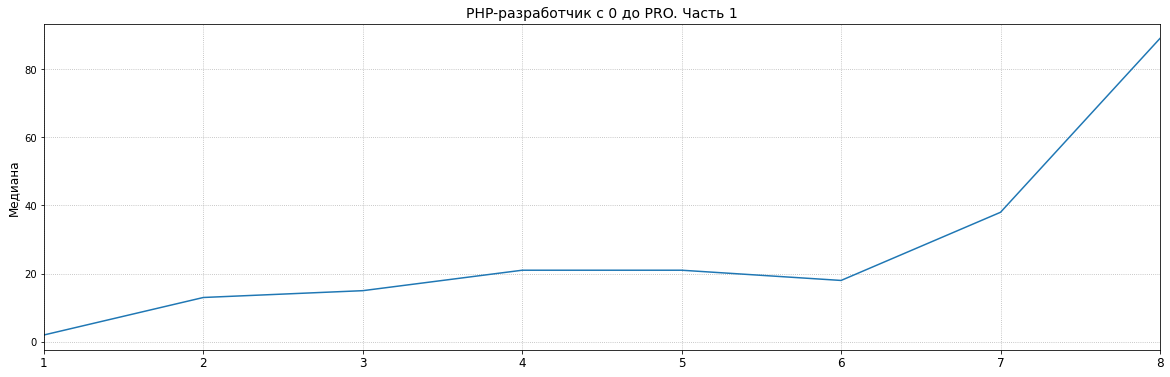

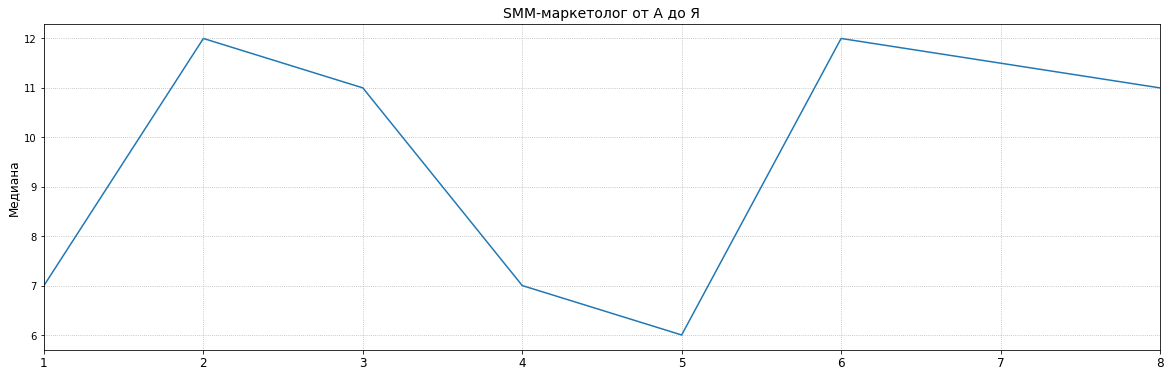

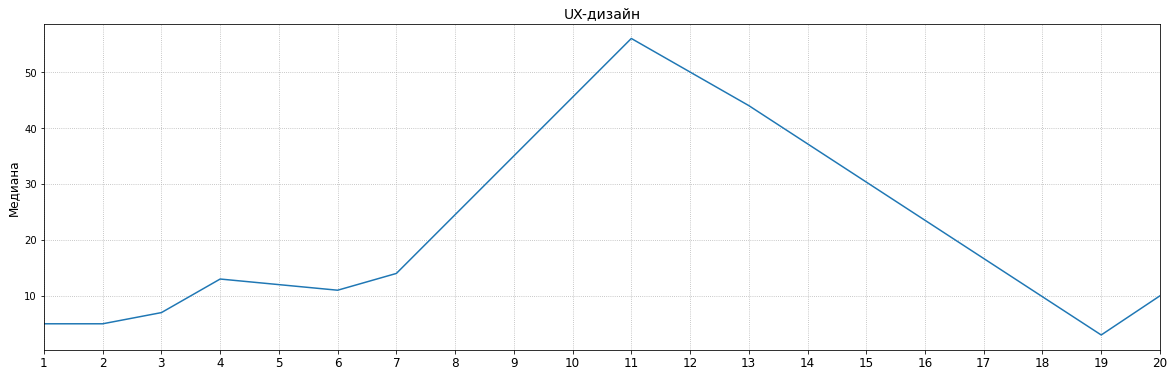

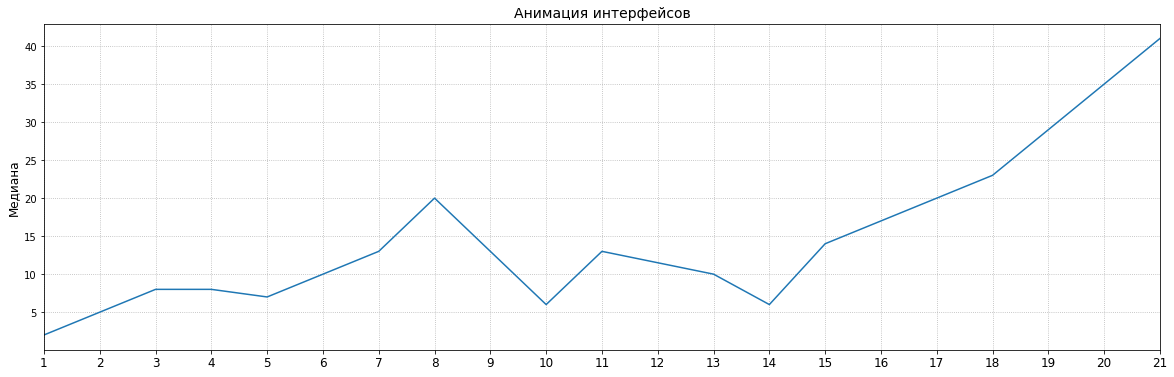

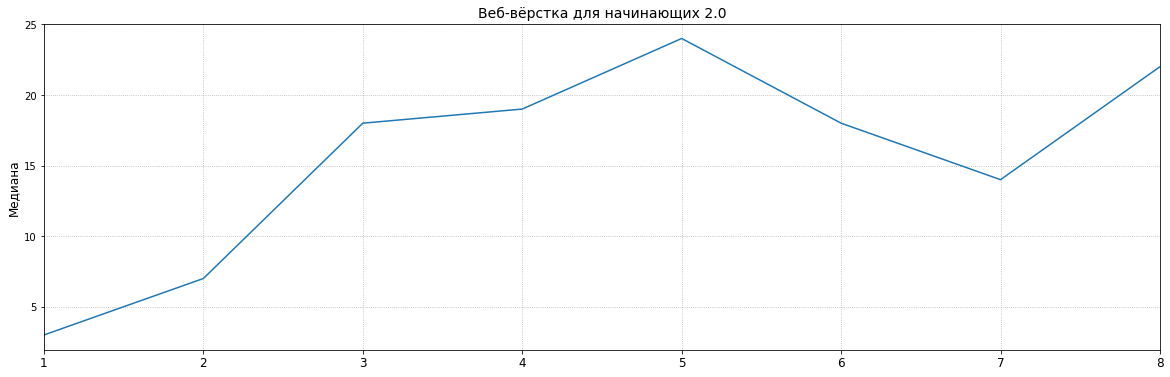

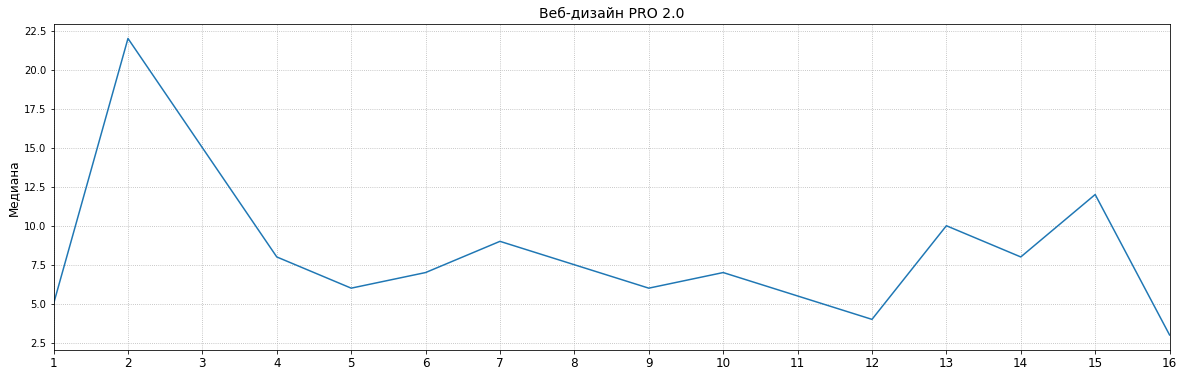

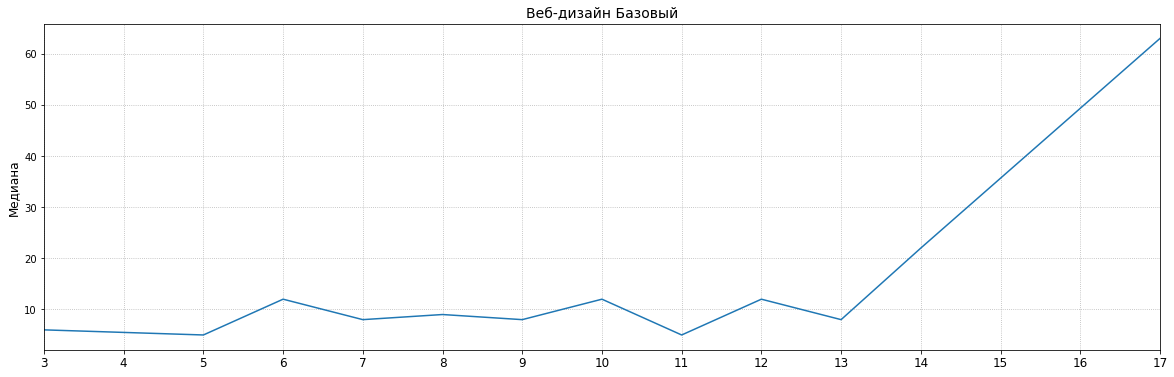

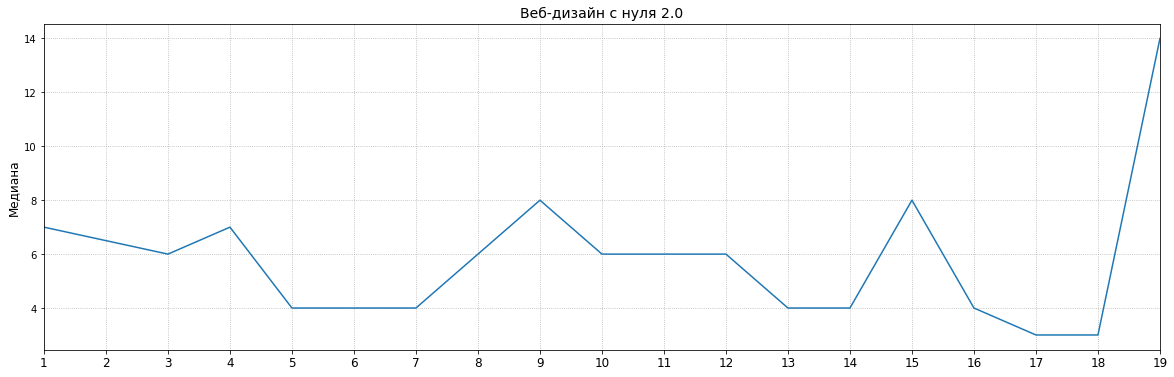

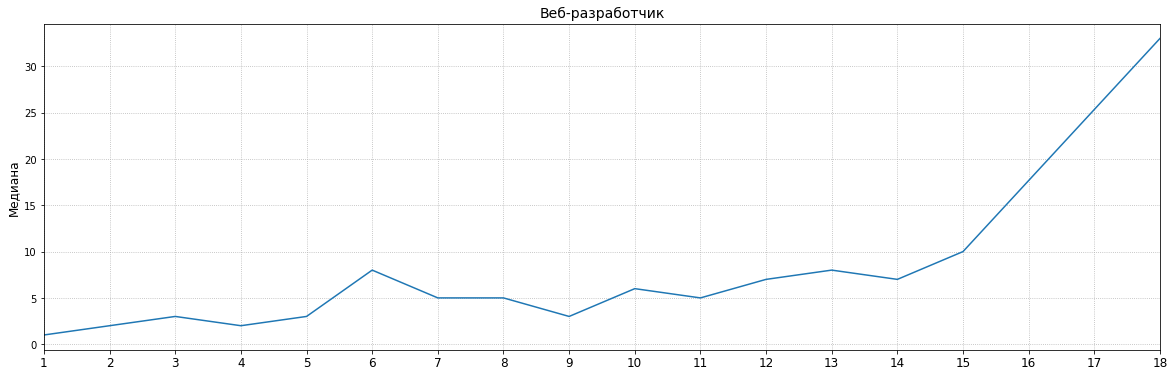

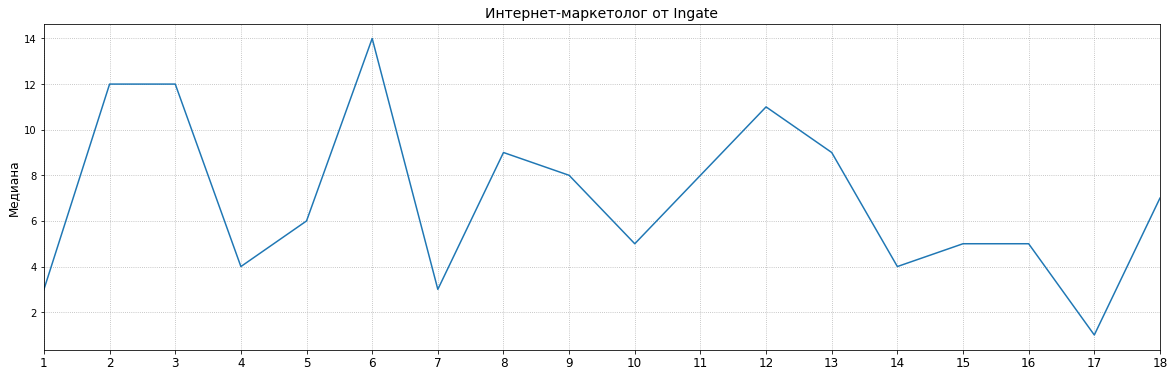

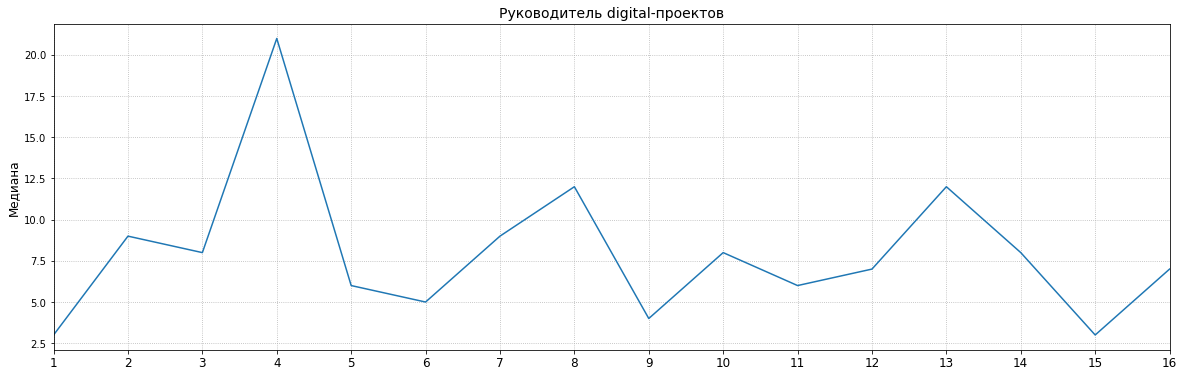

In [39]:
# строим графики:

# сохраняем в переменную название всех курсов:
courses = hw_days_result['course'].unique()

for i in range(15):
    plt.figure(figsize=(20, 6))
    
    # сохраняем в переменную данные определенного курса:
    data = hw_days_result[hw_days_result['course'] == courses[i]]

    plt.plot(data['module_number'], data['median'])
    
    # добавляем заголовок и увеличиваем шрифт меток:
    plt.ylabel('Медиана', fontsize=12)
    plt.xticks(np.arange(data['module_number'].min(), data['module_number'].max() + 1, 1), fontsize=12)
    plt.title(courses[i], fontsize=14)
    
    # задаем горизонтальные границы графика:
    plt.xlim(data['module_number'].min(), data['module_number'].max()) 
    
    # добавляем сетку:
    plt.grid(linestyle='dotted')
    plt.show()

#### Расчет медианного времени выполнения домашней работы по месяцам для каждого курса

In [40]:
# выгружаем необходимые данные из основного датасета:
hw_month = main[main['is_homework'] == True][['course', 'start_date', 'finish_date']]

# определяем количество дней потраченные на выполнение домашнего задания и соответствующий месяц:
hw_month['days'] = (main['finish_date'] - main['start_date']).dt.days
hw_month['month'] = hw_month['start_date'].dt.month_name()

# группируем и находим медиану:
hw_month_result = hw_month.groupby(['course', 'month'])['days'].median().reset_index()

# поворачиваем таблицу с помощью pivot:
pivot_result = hw_month_result.pivot(index='month', columns='course', values='days').fillna(0)

# сортируем месяца в хронологическом порядке:
all_months = calendar.month_name[1:]
pivot_result = pivot_result.reindex(index=all_months)

pivot_result

course     Excel Базовый  Java-разработчик  Java-разработчик c нуля  \
month                                                                 
January              2.0               6.0                      0.0   
February             2.0               5.0                      0.0   
March                3.0               7.0                      7.0   
April                2.0               9.0                      3.0   
May                  3.0               9.0                      3.0   
June                 2.0               7.0                      3.0   
July                 2.0               6.0                      2.0   
August               4.0              14.0                      0.0   
September            2.0              11.0                      0.0   
October              2.0               9.0                      0.0   
November             3.0               9.0                      0.0   
December             4.0               4.0                      0.0   

course     JavaScript с нуля  PHP-разработчик с 0 до PRO. Часть 1  \
month                                                               
January                  7.0                                 12.0   
February                 6.0                                  8.5   
March                    6.0                                 10.5   
April                    5.0                                 11.0   
May                      5.0                                  9.0   
June                     5.0                                  9.0   
July                     6.0                                  6.0   
August                   8.0                                 13.5   
September               12.0                                 10.5   
October                 12.0                                 24.0   
November                 9.0                                 20.0   
December                 8.0                                  8.0   

course     SMM-маркетолог от А до Я  UX-дизайн  Анимация интерфейсов  \
month                                                                  
January                        12.0       10.0                   7.0   
February                       10.0        4.0                   3.0   
March                          11.0       10.0                   8.0   
April                           8.0        9.0                   6.0   
May                            10.0        8.0                   6.5   
June                            7.0        6.0                   5.0   
July                            5.0        6.0                   6.0   
August                          0.0       10.0                   4.0   
September                       0.0       11.0                   8.0   
October                        18.0       13.0                   5.0   
November                       16.0       11.0                   9.0   
December                       24.5       11.0                  12.0   

course     Веб-вёрстка для начинающих 2.0  Веб-дизайн PRO 2.0  \
month                                                           
January                               9.0                10.0   
February                              9.0                 9.0   
March                                 8.0                 7.0   
April                                 9.5                 7.0   
May                                   8.0                 5.0   
June                                  5.5                 5.0   
July                                  3.0                 8.0   
August                                8.0                31.0   
September                            10.0                27.0   
October                              12.0                15.0   
November                             10.0                11.0   
December                              9.0                10.0   

course     Веб-дизайн Базовый  Веб-дизайн с нуля 2.0  Веб-разработчик  \
month                                        

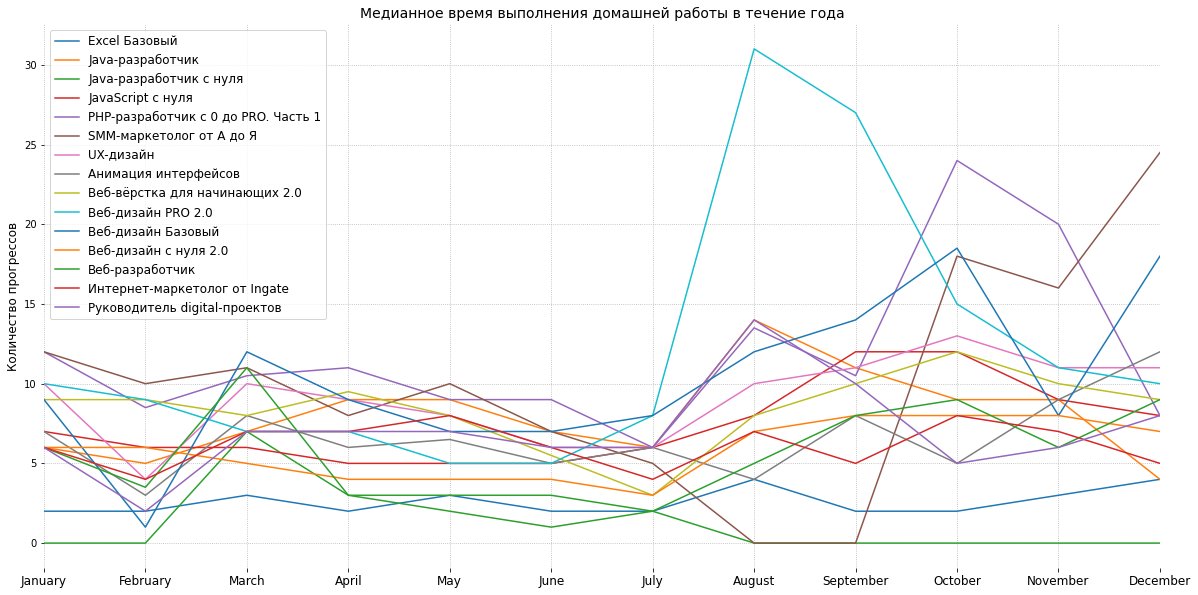

In [41]:
# строим графики:

plt.figure(figsize=(20, 10))    

plt.plot(pivot_result.index, pivot_result.values)
    
# добавляем заголовок и увеличиваем шрифт меток:
plt.ylabel('Количество прогрессов', fontsize=12)
plt.xticks(fontsize=12)
plt.title('Медианное время выполнения домашней работы в течение года', fontsize=14)
    
# задаем горизонтальные границы графика:
plt.xlim('January', 'December')     
    
# добавляем сетку:
plt.grid(linestyle='dotted')

# добавляем легенду:
plt.legend(pivot_result.columns, fontsize=12)

# скрываем рамки графика
plt.box(False)

plt.show()

### Вывод:
Проведя анализ медианного времени прохождения каждого модуля по всем курсам, можно сделать вывод, что на курсах с итоговыми модуляли (экзамен, курсовая и дипломные работы) в течении всего курса медиана держится в определенном диапозоне и достигает пика в этих итоговых модулях. К таким курсам относятся: **'Excel Базовый'**, **'Java-разработчик'**, **'JavaScript с нуля'**, **'PHP-разработчик с 0 до PRO. Часть 1'**, **'Веб-дизайн Базовый'**, **'Веб-разработчик'**. Так же в курсах встречаются сложные или объемные модули, требующие много времени, как например:  
в курсе **'UX-дизайн'** - модули: 'Visual desigh теория и практика', 'Техника успешной презентации';  
в курсе **'Веб-дизайн PRO 2.0'** - модуль 'Концептуальный дизайн';  
в курсе **'Веб-дизайн с нуля 2.0'** - модуль 'Первый кейс на Behance';  
в курсе **'Руководитель digital-проектов'** - модуль 'Аналитика. Базовые навыки'  
В остальном медианное время по всем модулям лежит в определенном диапозоне в зависимости от курса.

С точки зрения сезонности, то пик выполнения домашних работ приходится на вторую половину года (август - декабрь). В первой половине года показатель как правило падает.


## 4. Расчет конверсии

In [42]:
# выгружаем необходимые данные из основного датасета:
df_conversion = main[main['is_homework'] == True].loc[:, ['field', 'course', 'module_title', 'module_number', 'status']]

# добавляем счетчик:
df_conversion['count'] = 1

# формируем датасет с начатыми домашними заданиями:
df_conv_numerator = df_conversion.groupby(['field', 'course', 'module_title', 'module_number'])['count'].count().reset_index().sort_values(['course', 'module_number'])

# формируем датасет со завершенными домашними заданиями:
df_conv_denominator = df_conversion[df_conversion['status'] == 'done'].groupby(['field', 'course', 'module_title', 'module_number'])['count'] \
                                                                      .count().reset_index().sort_values(['course', 'module_number'])

# сводим полученные датасеты:
result_conv = pd.merge(df_conv_numerator, df_conv_denominator, on=['field', 'course', 'module_title', 'module_number'])

# переименовываем колонки и удаляем лишнее:
result_conv = result_conv.rename(columns={'count_x': 'numerator', 'count_y': 'denominator'}).drop(columns=['module_number'])

# смещаем данные колонки со завершенными домашними заданиями на 1 строку вниз:
result_conv.denominator = result_conv.denominator.shift(1)

# определяем конверсию:
result_conv['conversion'] = result_conv['numerator'] / result_conv['denominator']

result_conv

field                         course  \
0    Business                  Excel Базовый   
1    Business                  Excel Базовый   
2    Business                  Excel Базовый   
3    Business                  Excel Базовый   
4    Business                  Excel Базовый   
..        ...                            ...   
185  Business  Руководитель digital-проектов   
186  Business  Руководитель digital-проектов   
187  Business  Руководитель digital-проектов   
188  Business  Руководитель digital-проектов   
189  Business  Руководитель digital-проектов   

                                          module_title  numerator  \
0                            Основной функционал Excel        518   
1              Основной функционал Excel (продолжение)        434   
2                    Формулы и функции Excel. Введение        398   
3    Формулы и функции Excel. Продолжаем работать с...        345   
4       Формулы и функции Excel. Более сложные формулы        298   
..                                                 ...        ...   
185                  Решение факапов. Lean/TOC. Обзор.         95   
186                            Интеграционные проекты.         87   
187  Управление дизайнерами. Разработка дизайна по ...         71   
188                     Основы технической грамотности         66   
189  Контроль. Риски. Поощрения. Наказания. Обратна...         64   

     denominator  conversion  
0            NaN         NaN  
1          458.0    0.947598  
2          406.0    0.980296  
3          387.0    0.891473  
4          303.0    0.983498  
..           ...         ...  
185         98.0    0.969388  
186         88.0    0.988636  
187         69.0    1.028986  
188         64.0    1.031250  
189         64.0    1.000000  

[190 rows x 6 columns]

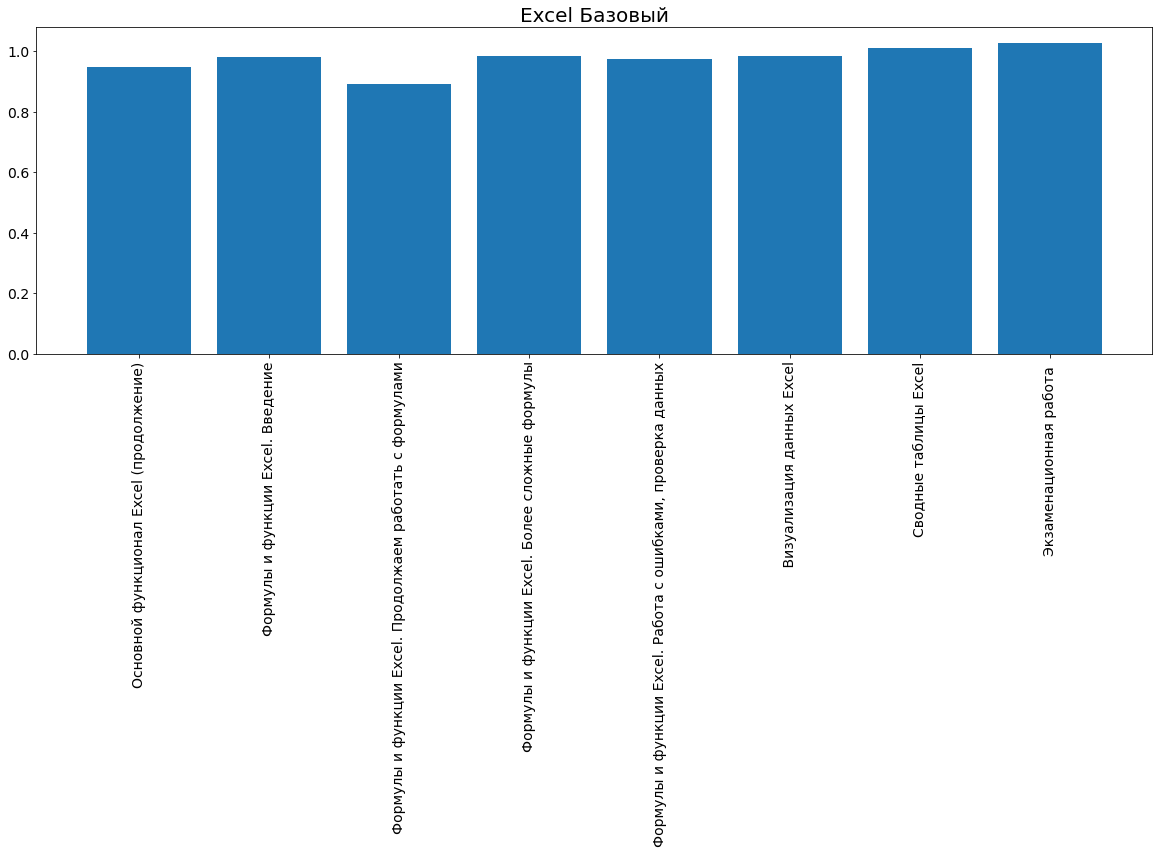

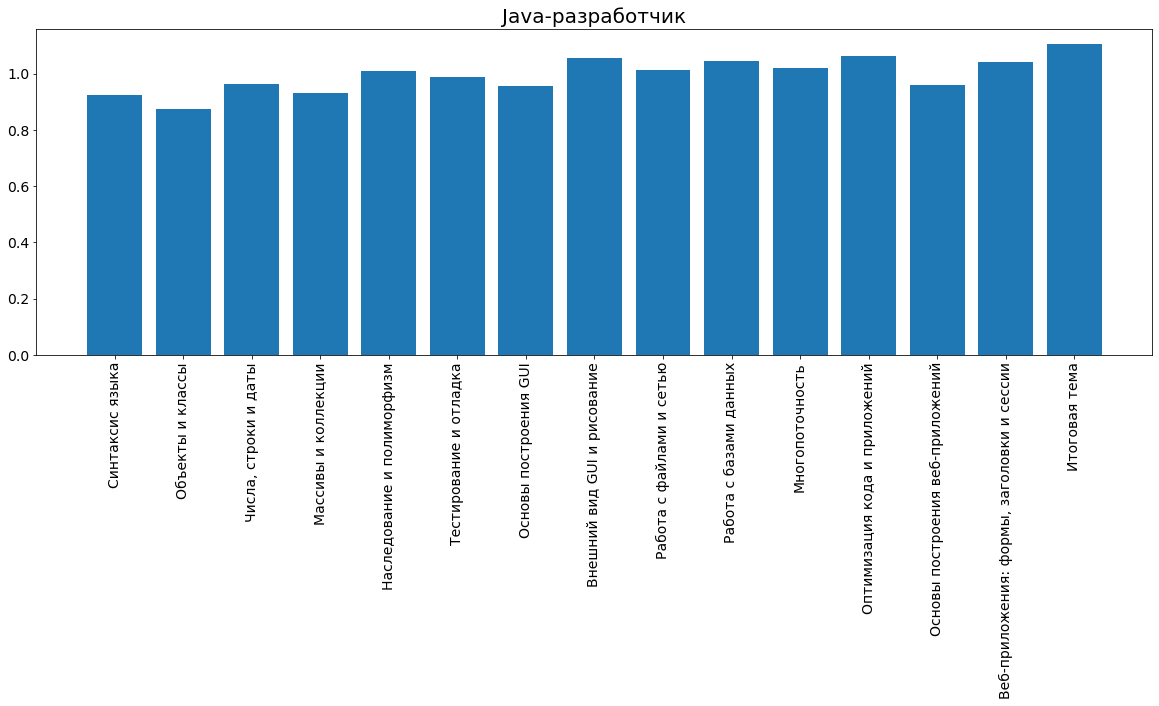

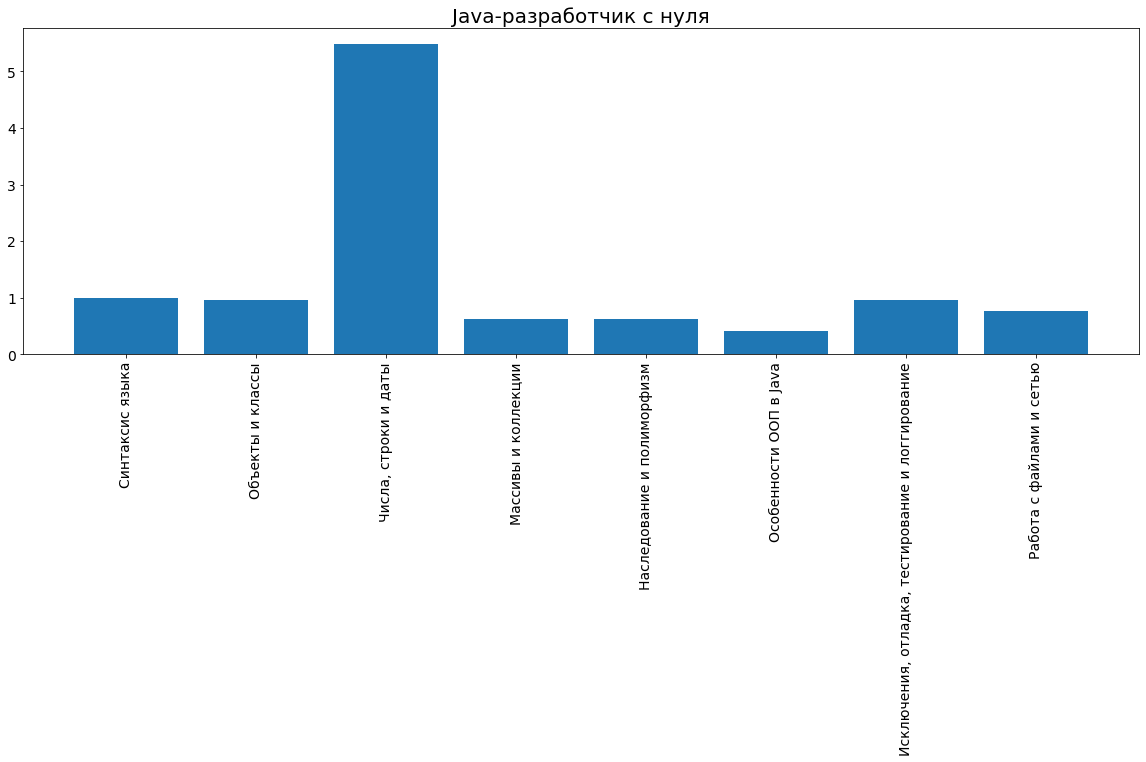

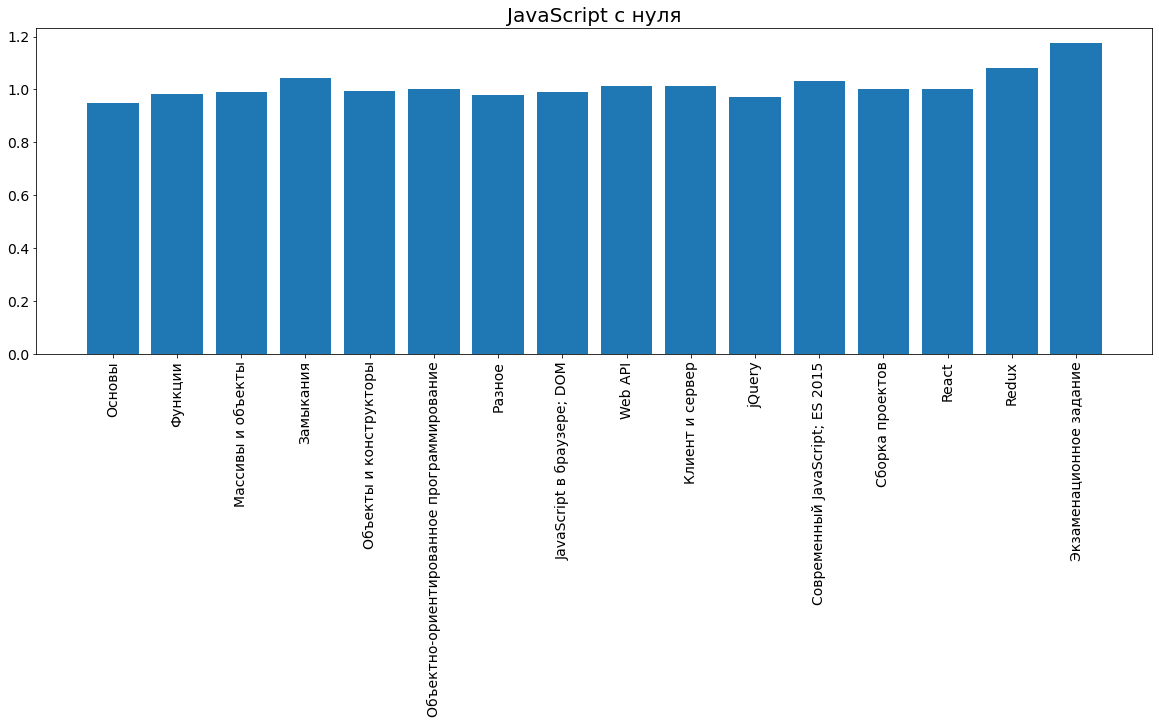

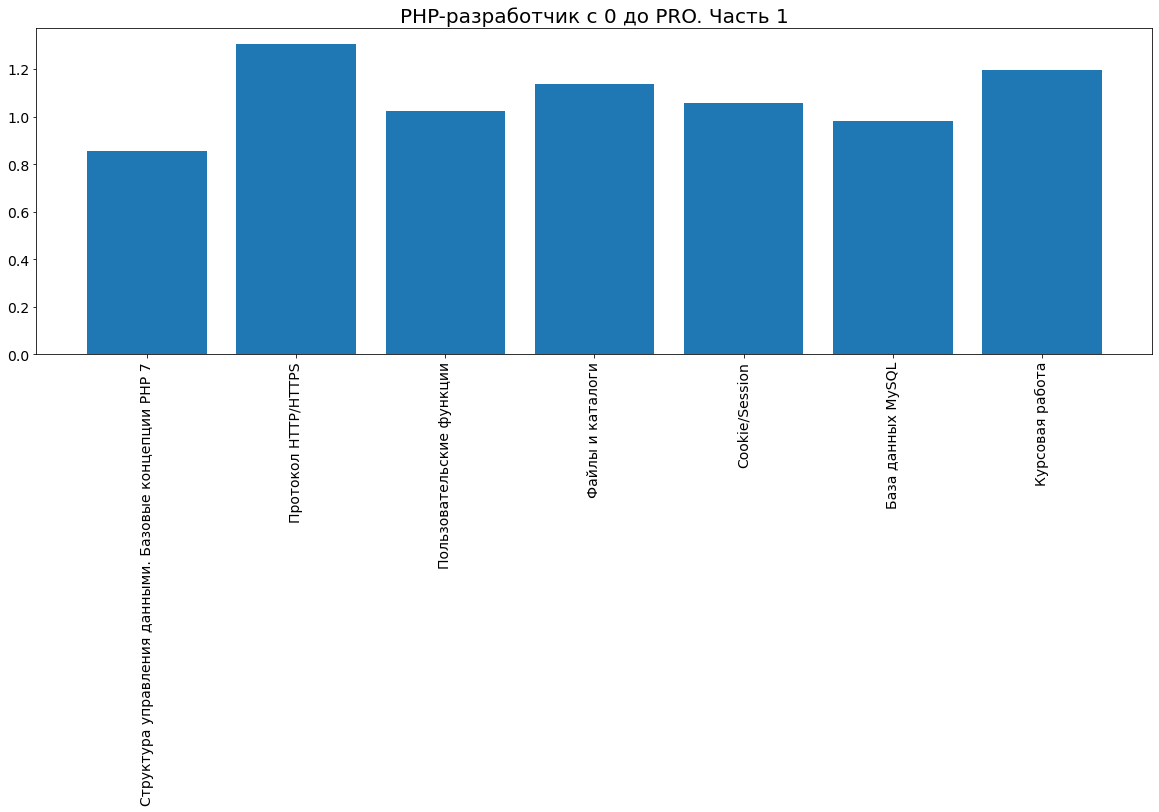

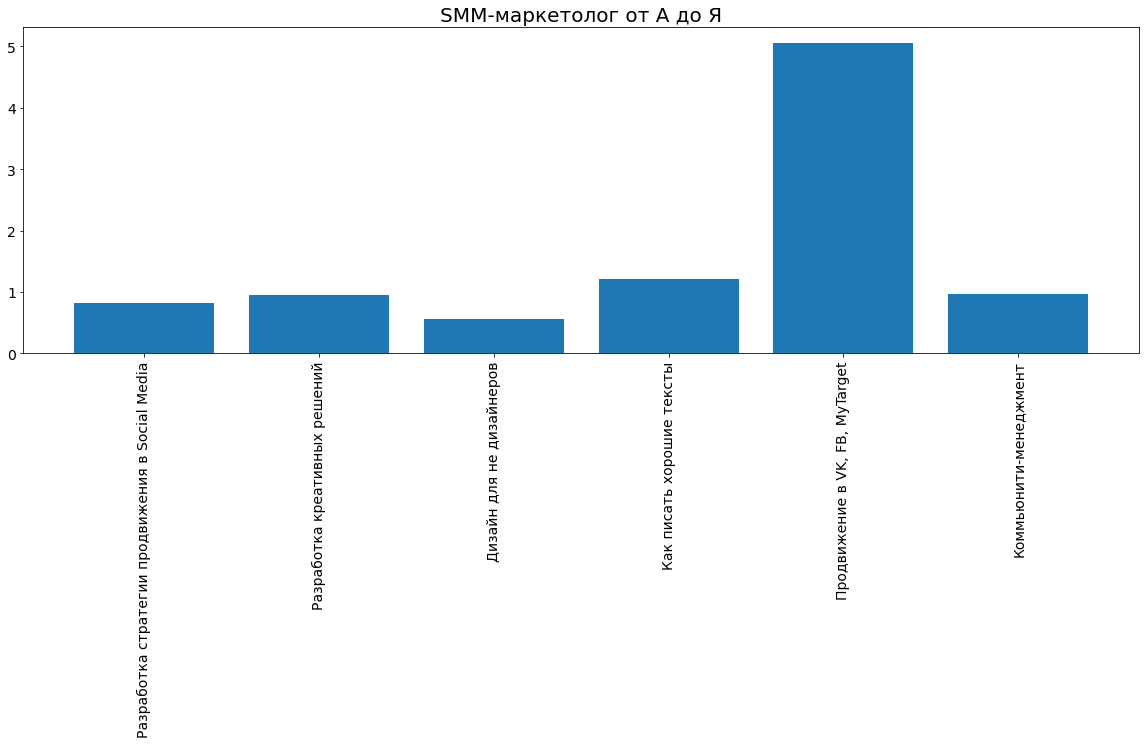

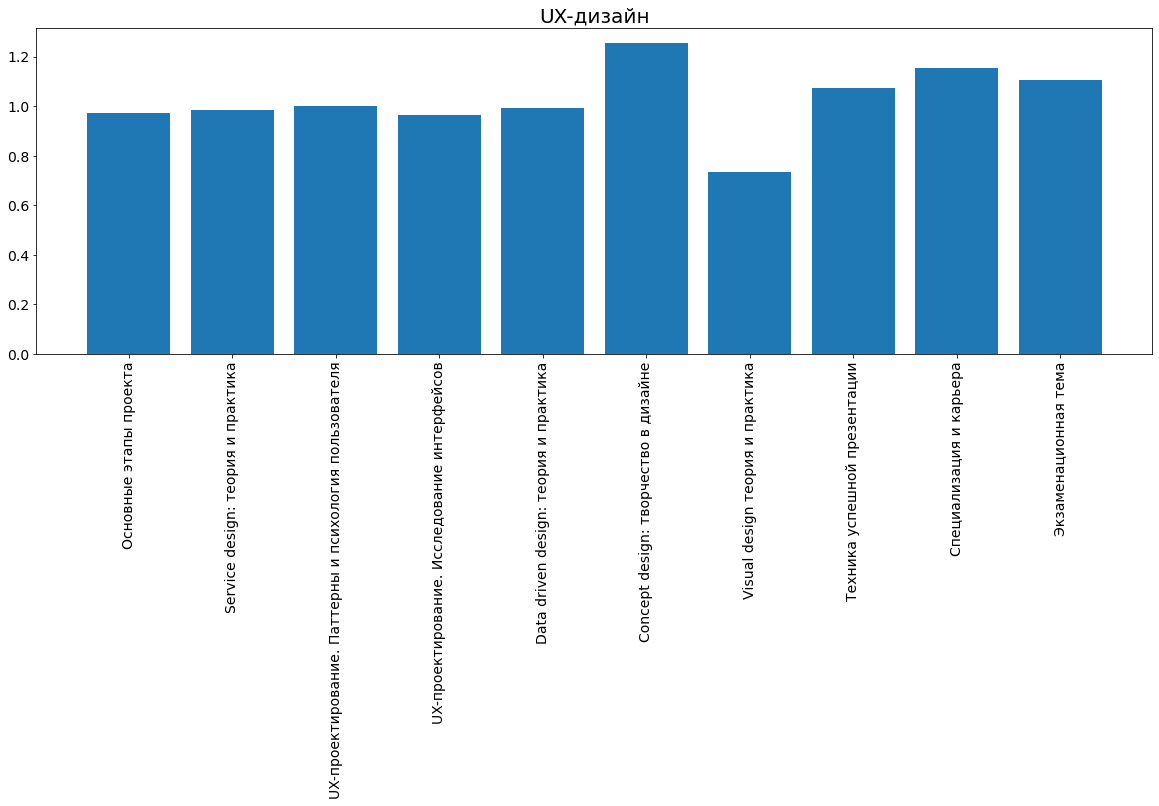

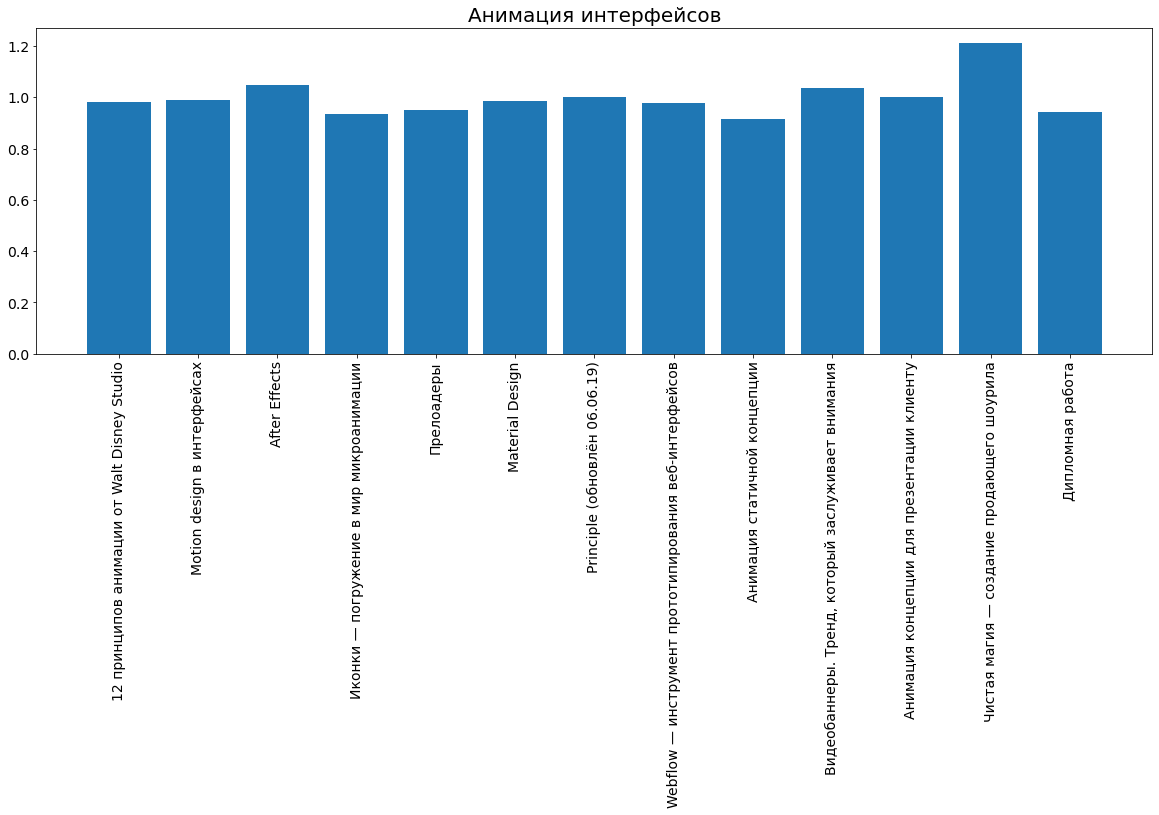

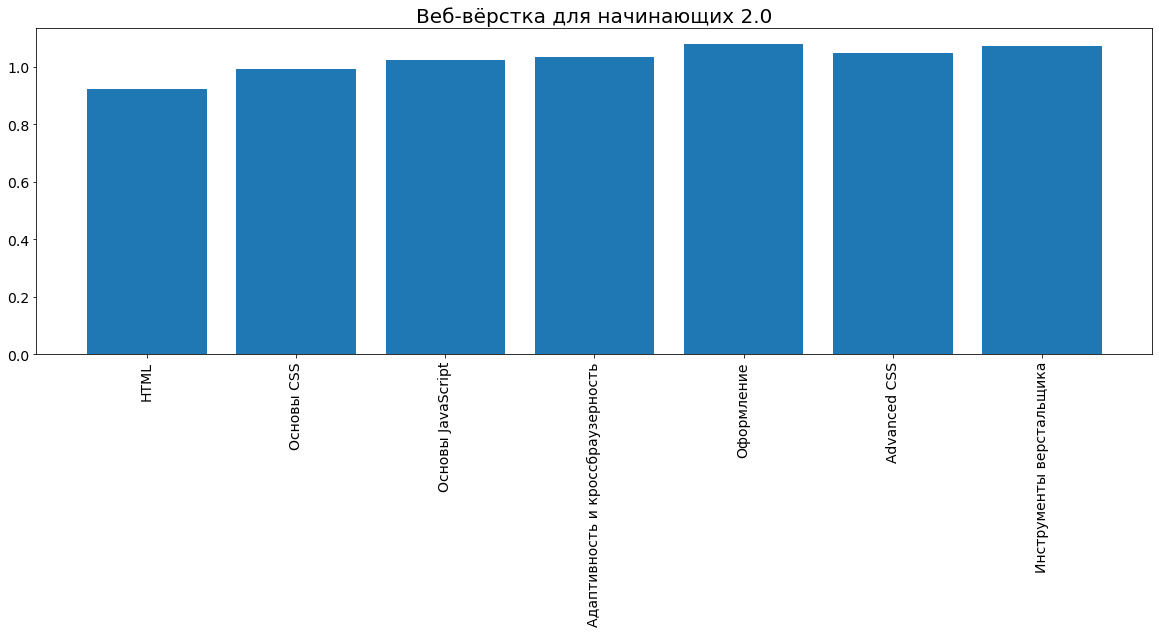

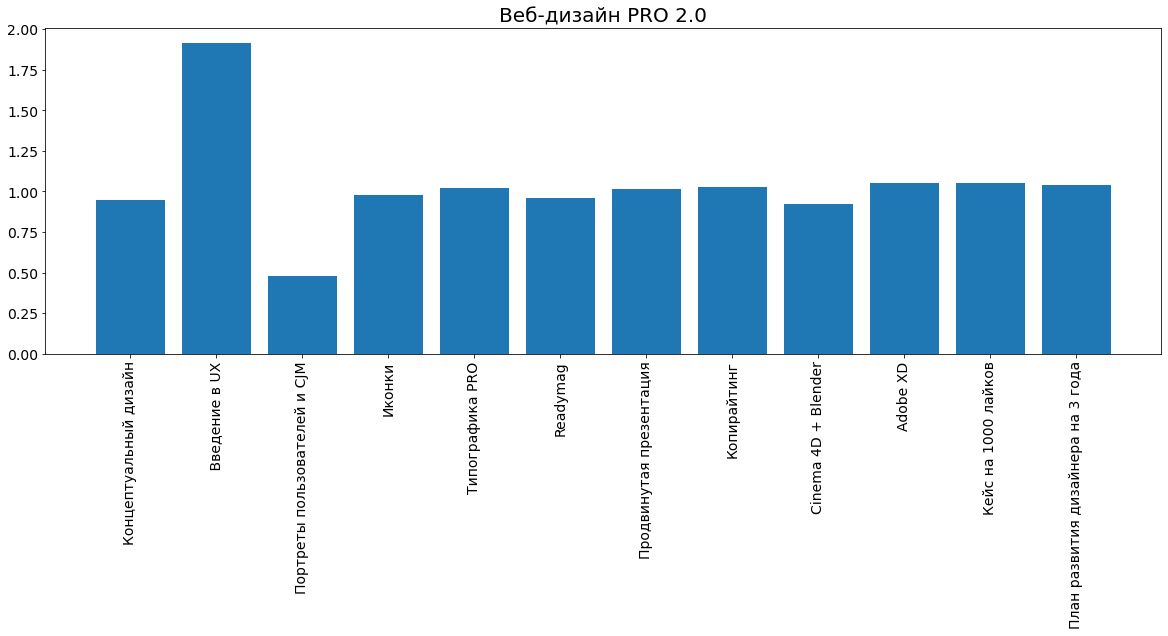

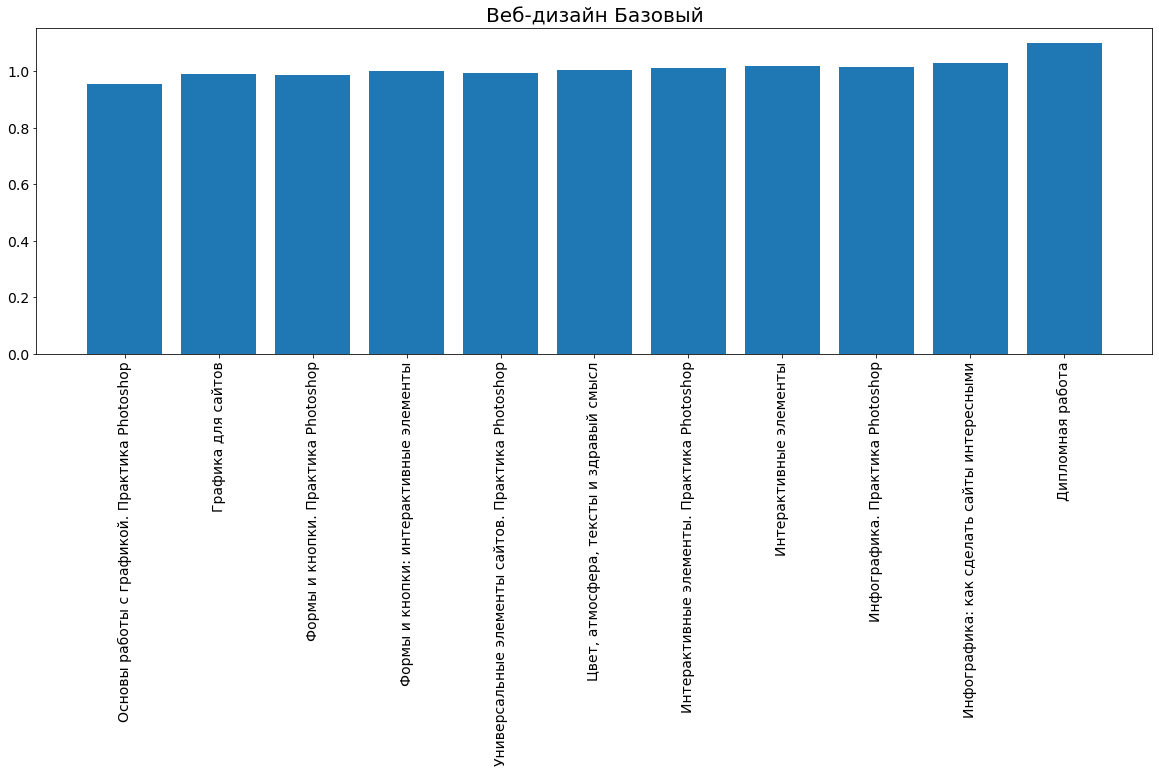

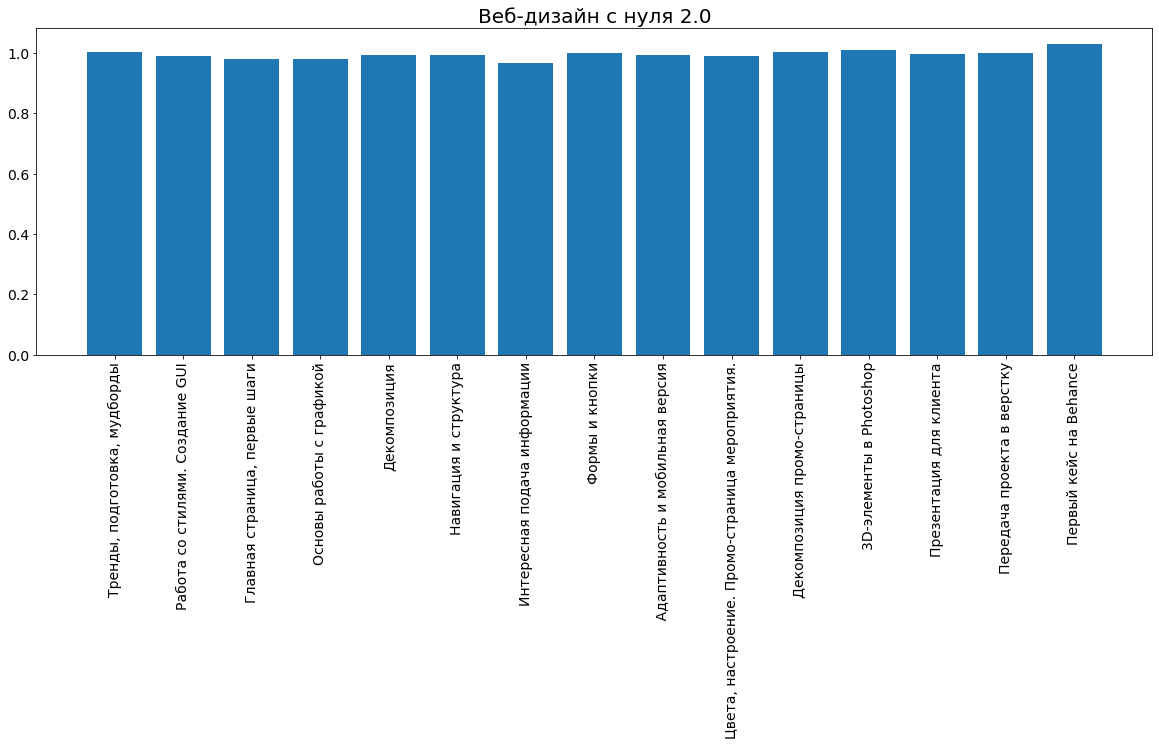

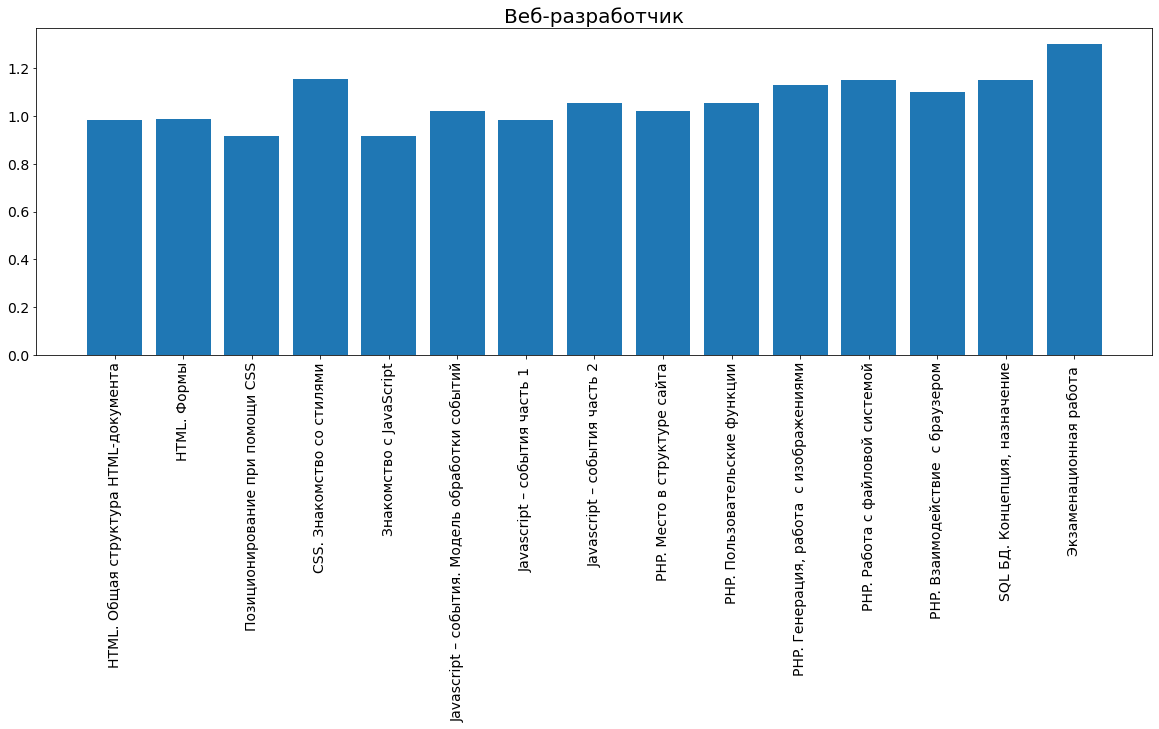

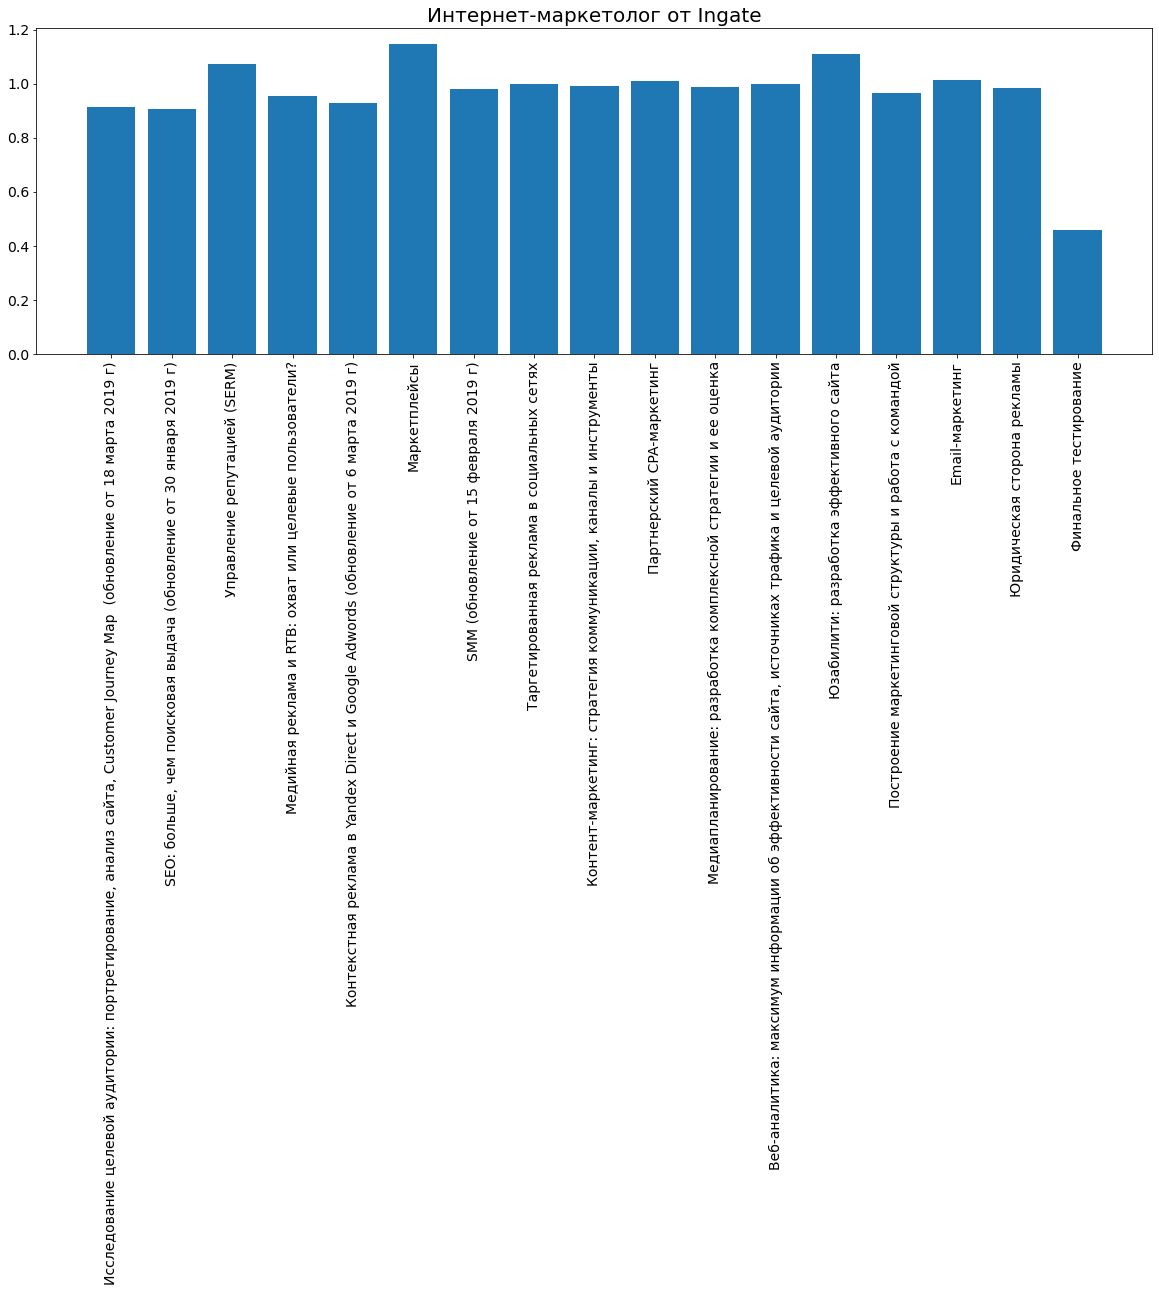

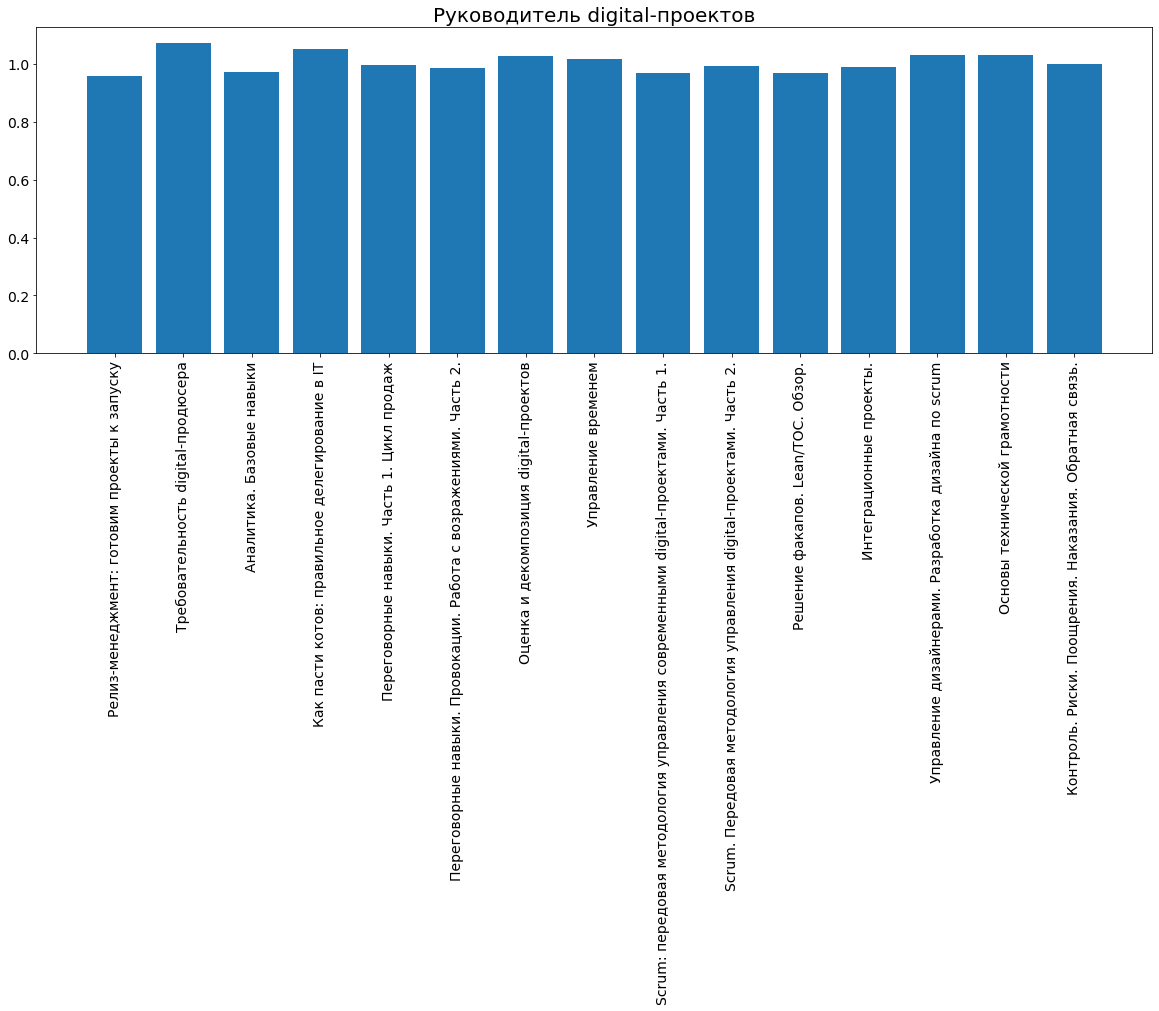

In [43]:
# строим графики:

# сохраняем в переменную название всех курсов:
courses = result_conv['course'].unique()

for i in range(15):
    
    # сохраняем в переменную данные определенного курса:
    data = result_conv[result_conv['course'] == courses[i]]
    
    # сохраняем в переменную количество модулей:
    module_count = data['module_title'].count()
    
    fig, ax = plt.subplots(figsize=(20, 6))

    ax.bar(data['module_title'][1: module_count], data['conversion'][1: module_count])

    # добавляем заголовок и увеличиваем шрифт меток:
    ax.set_title(courses[i], fontsize=20)
    plt.xticks(rotation = 90, fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()


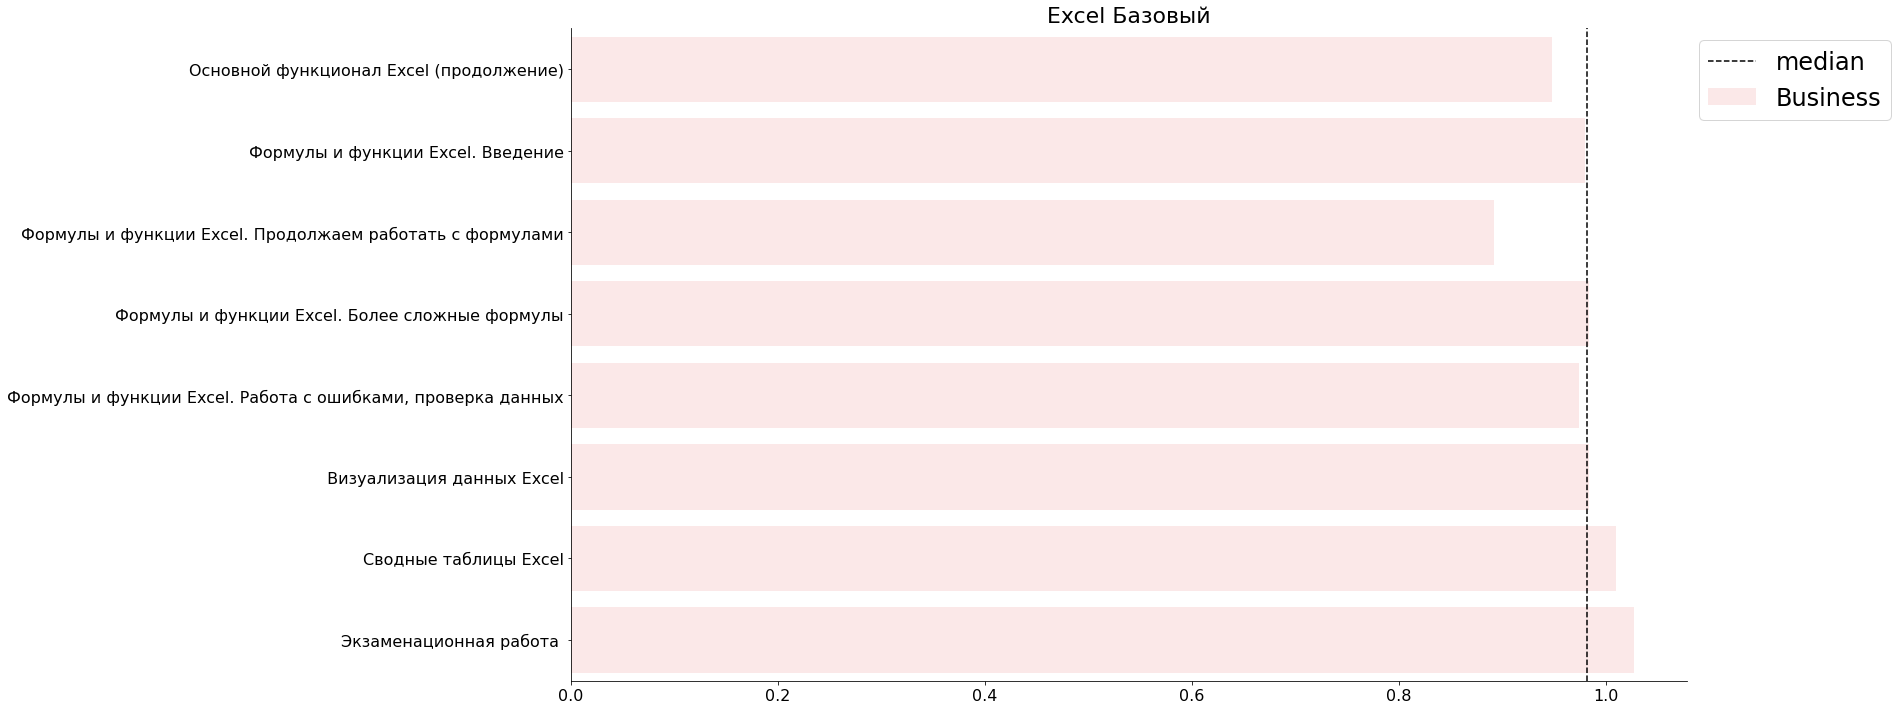

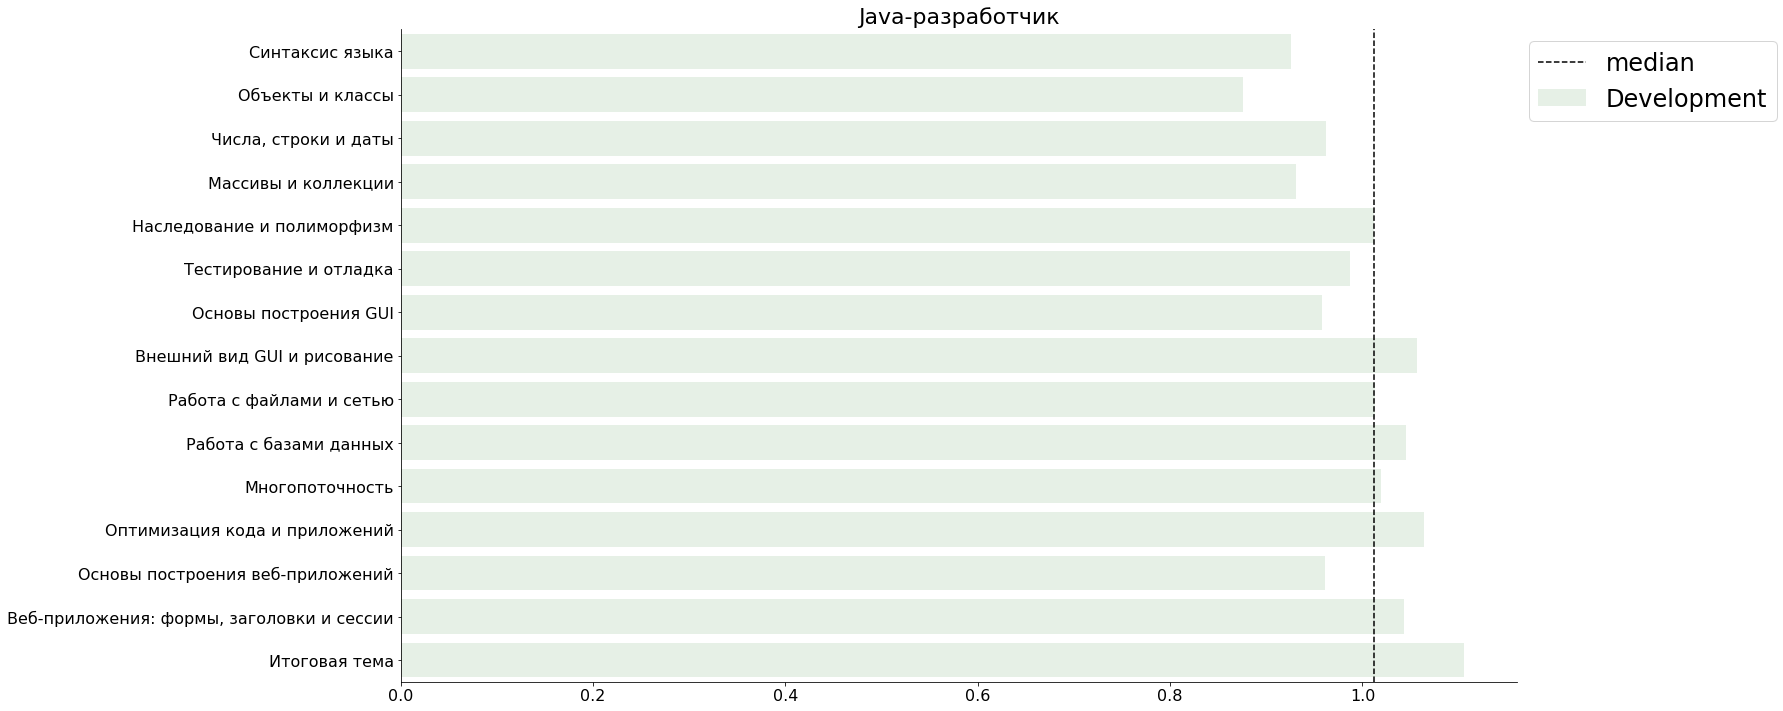

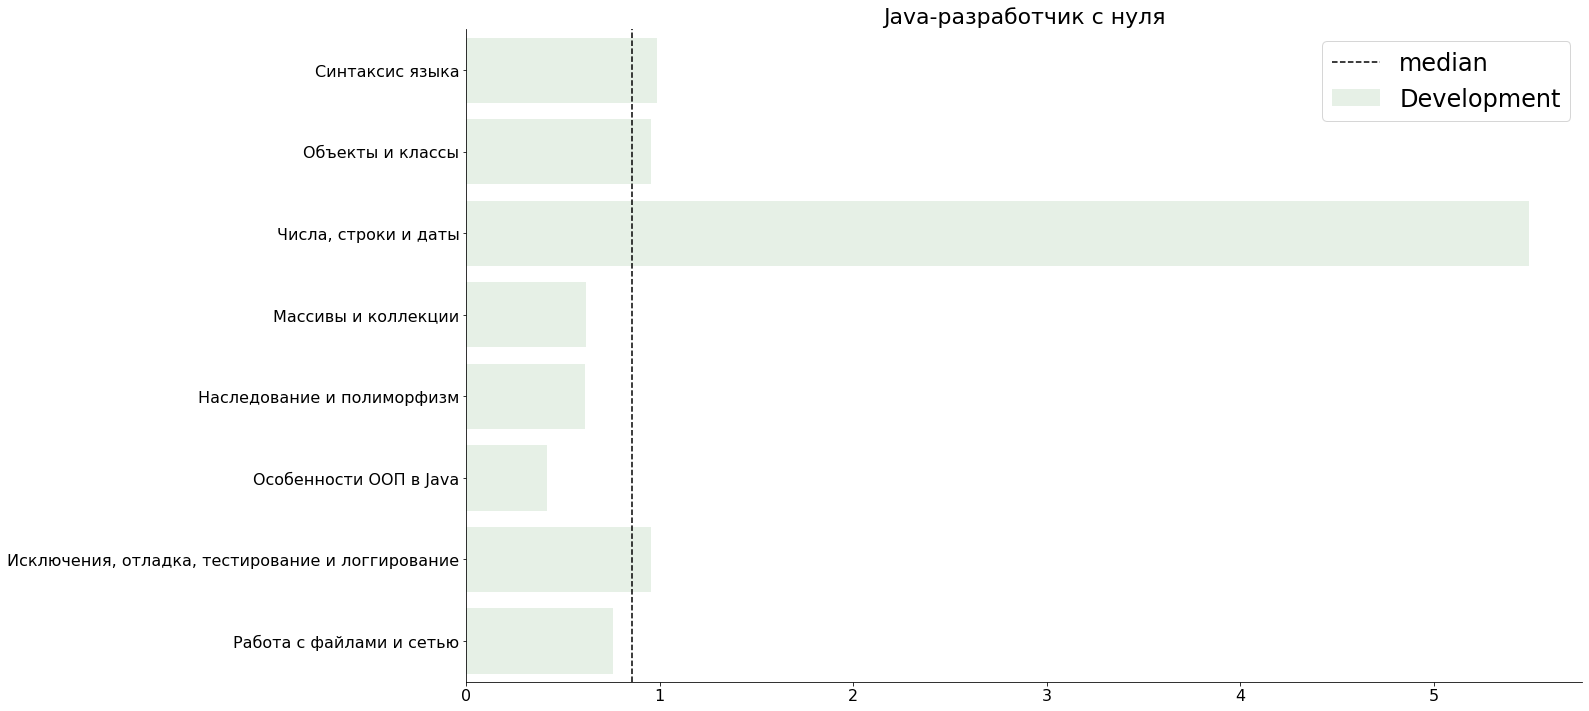

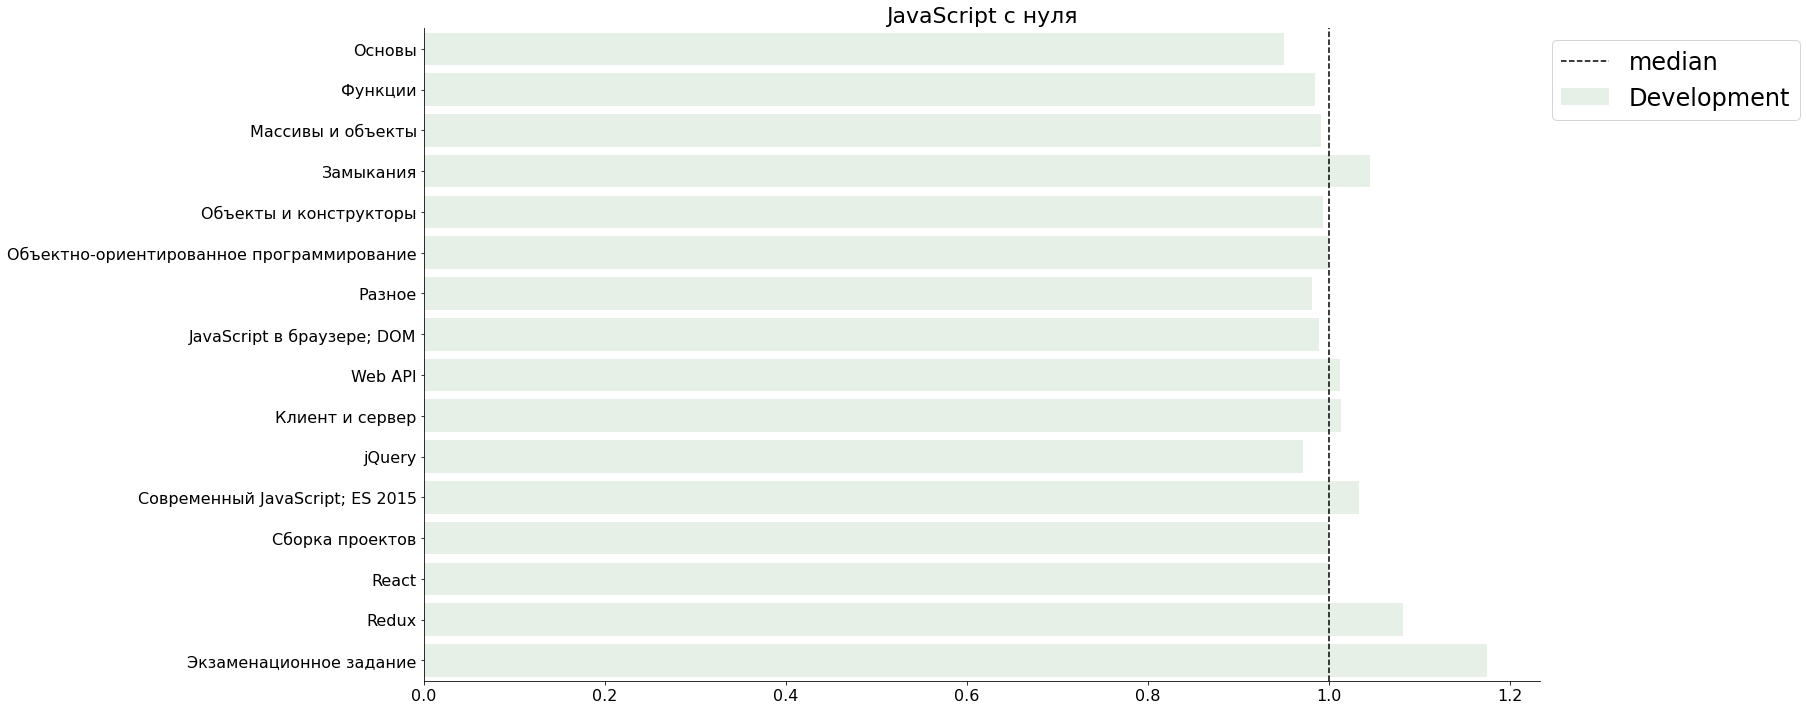

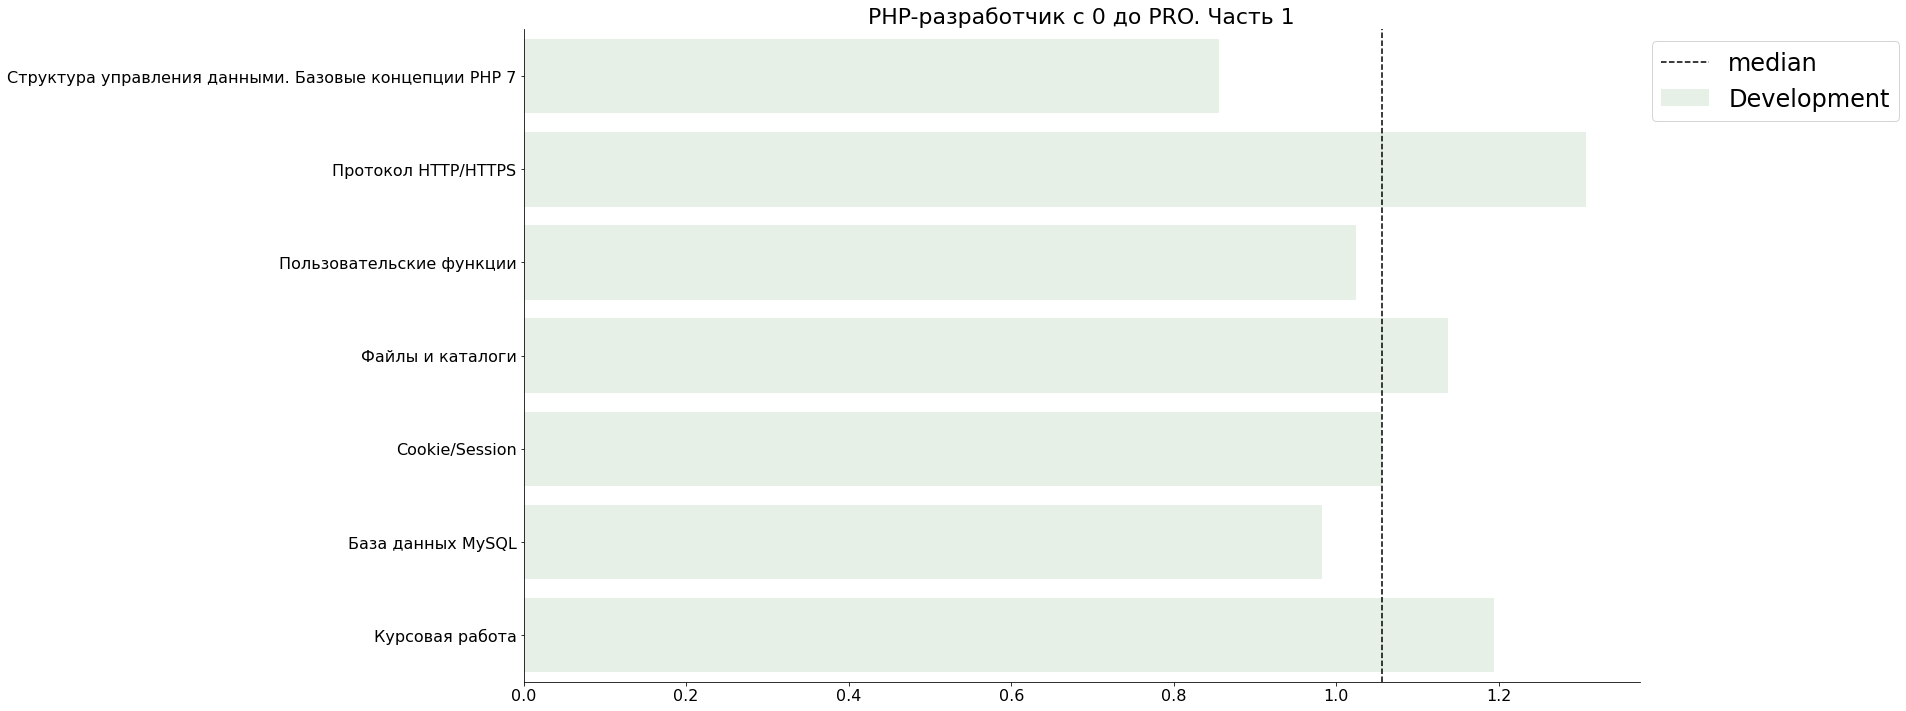

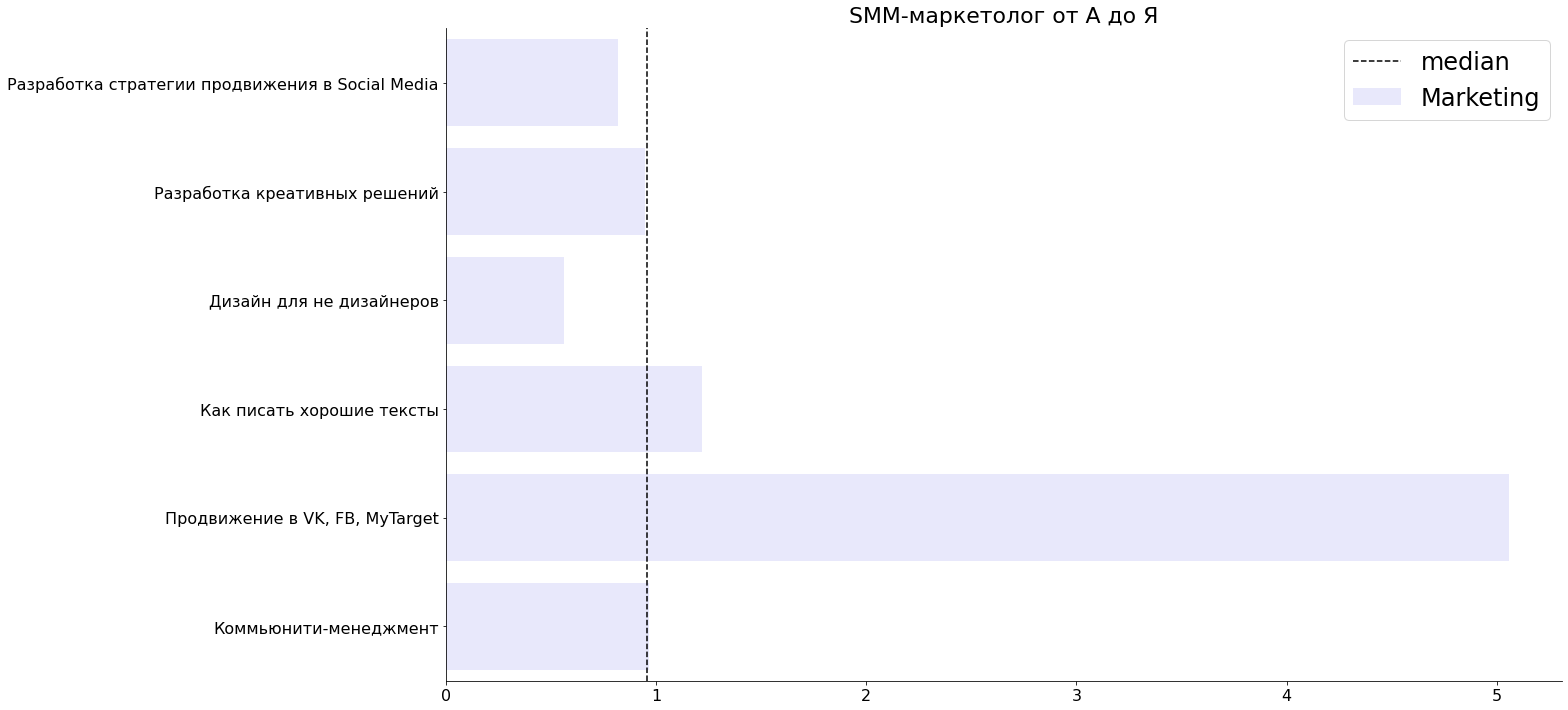

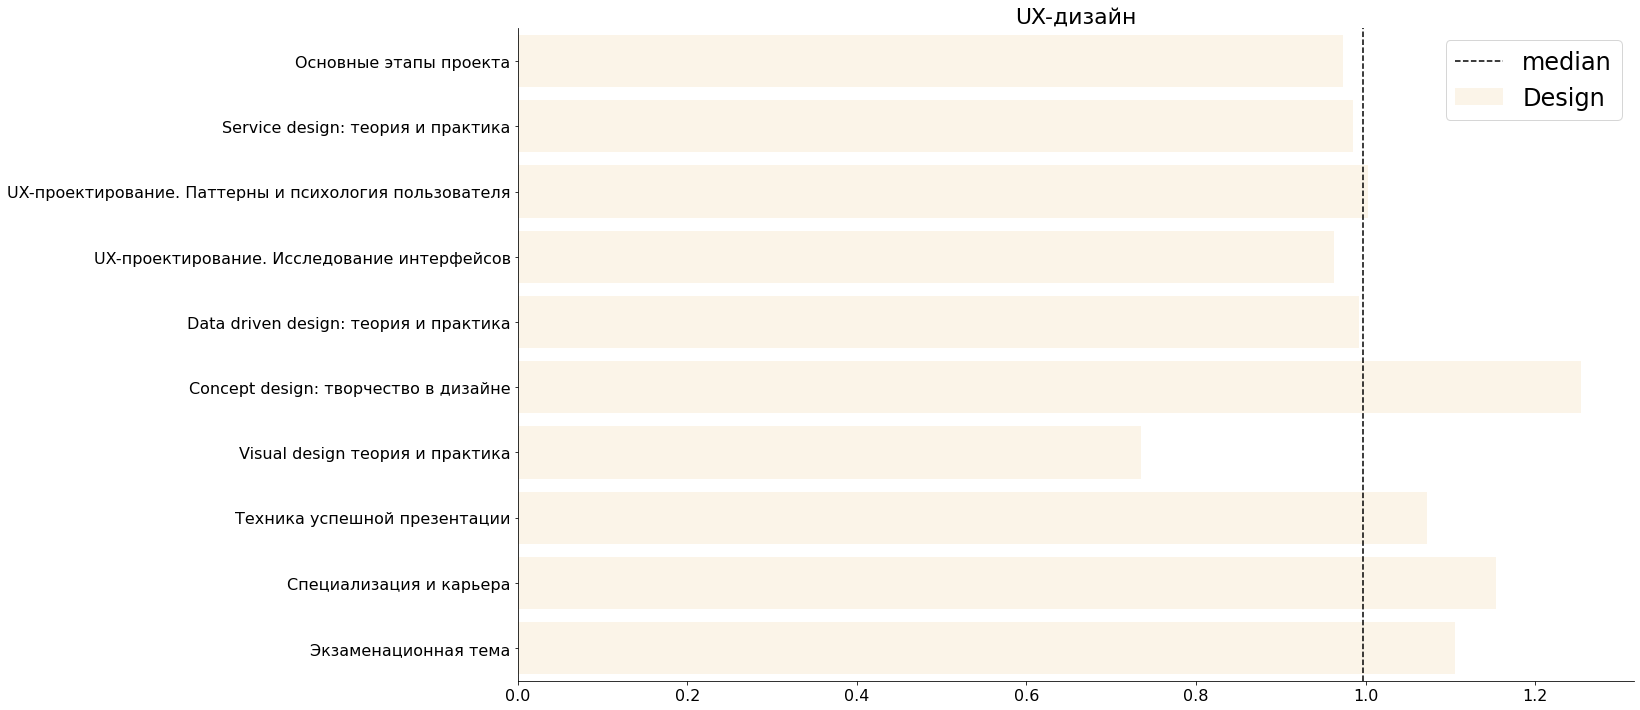

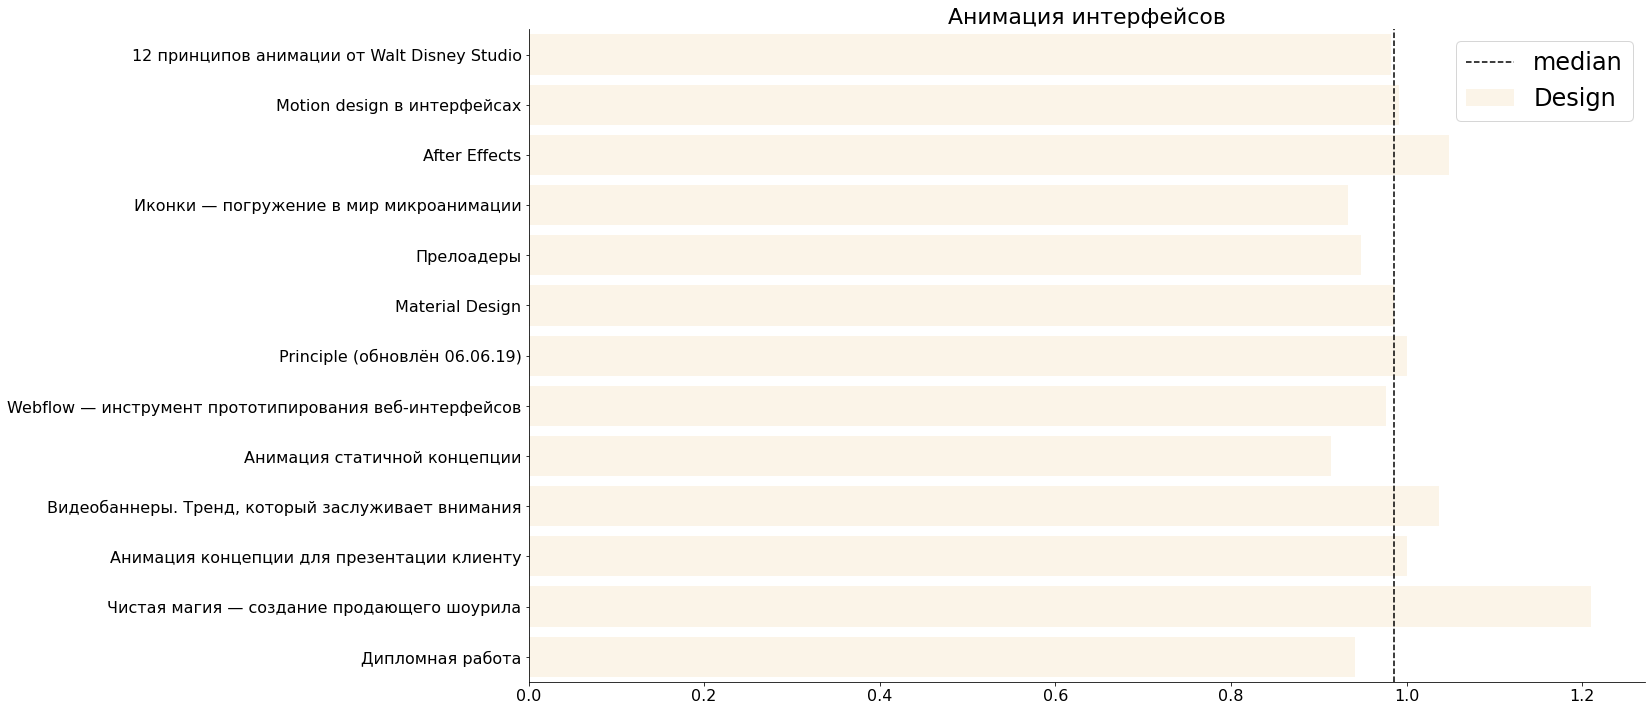

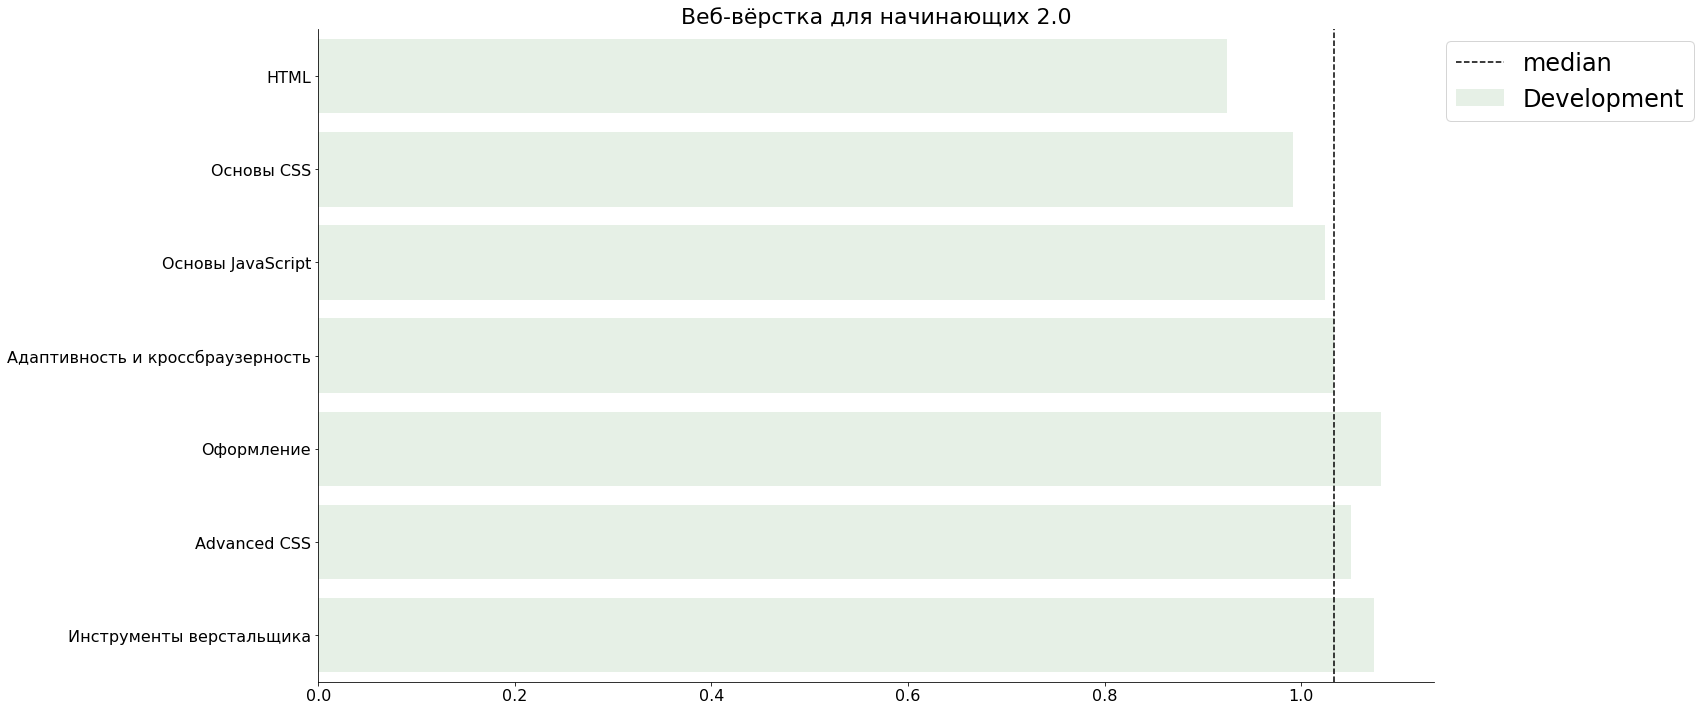

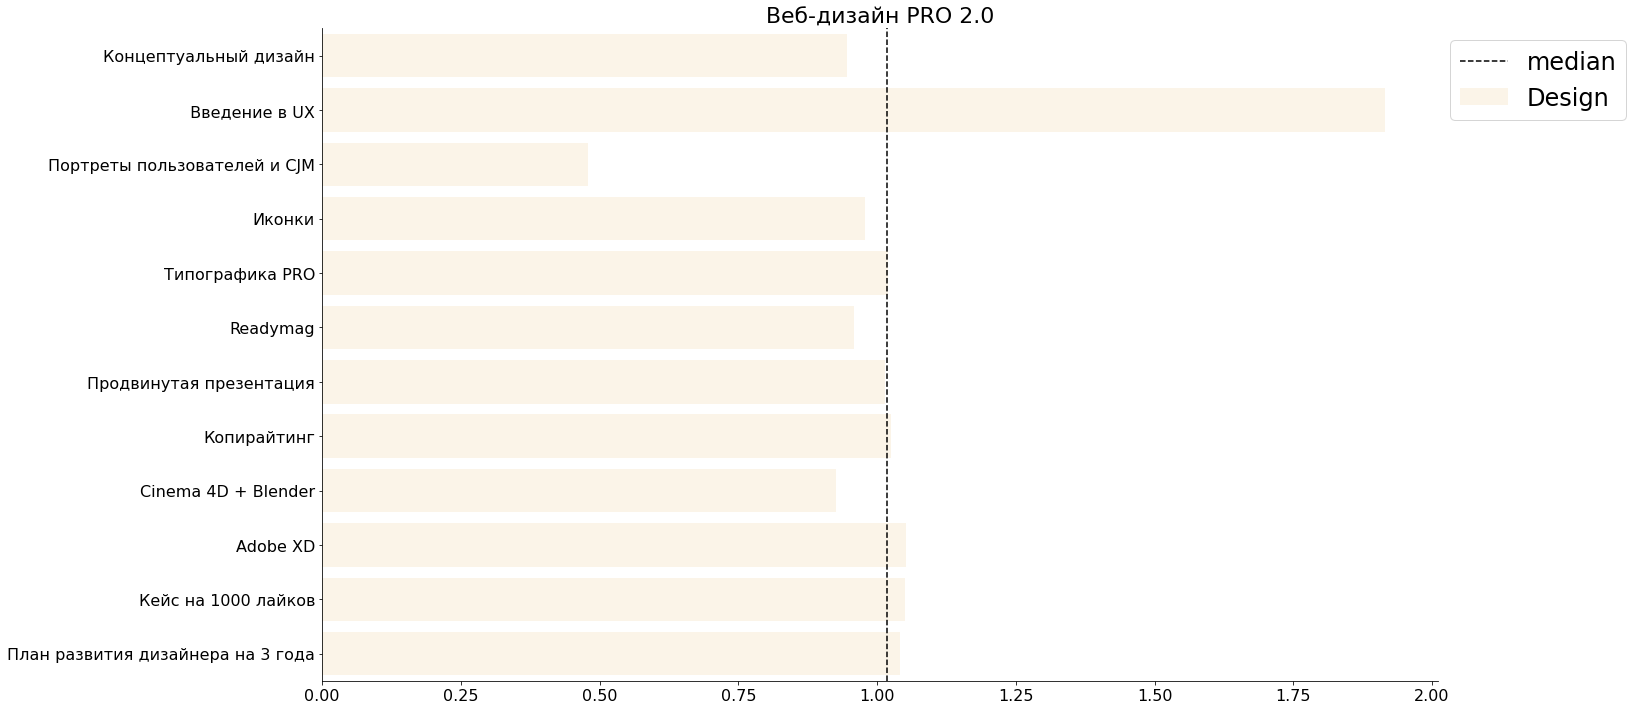

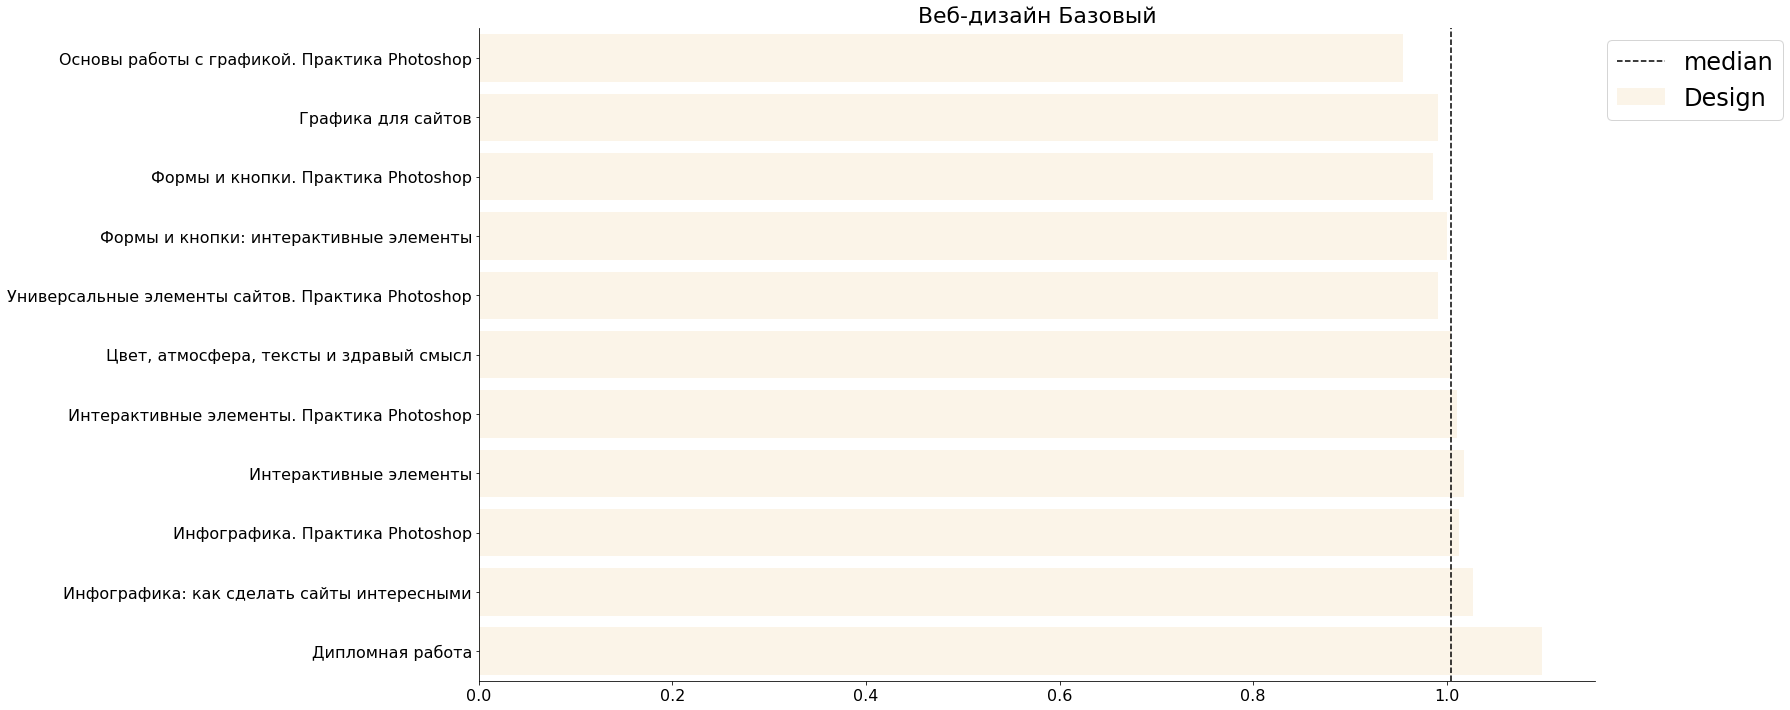

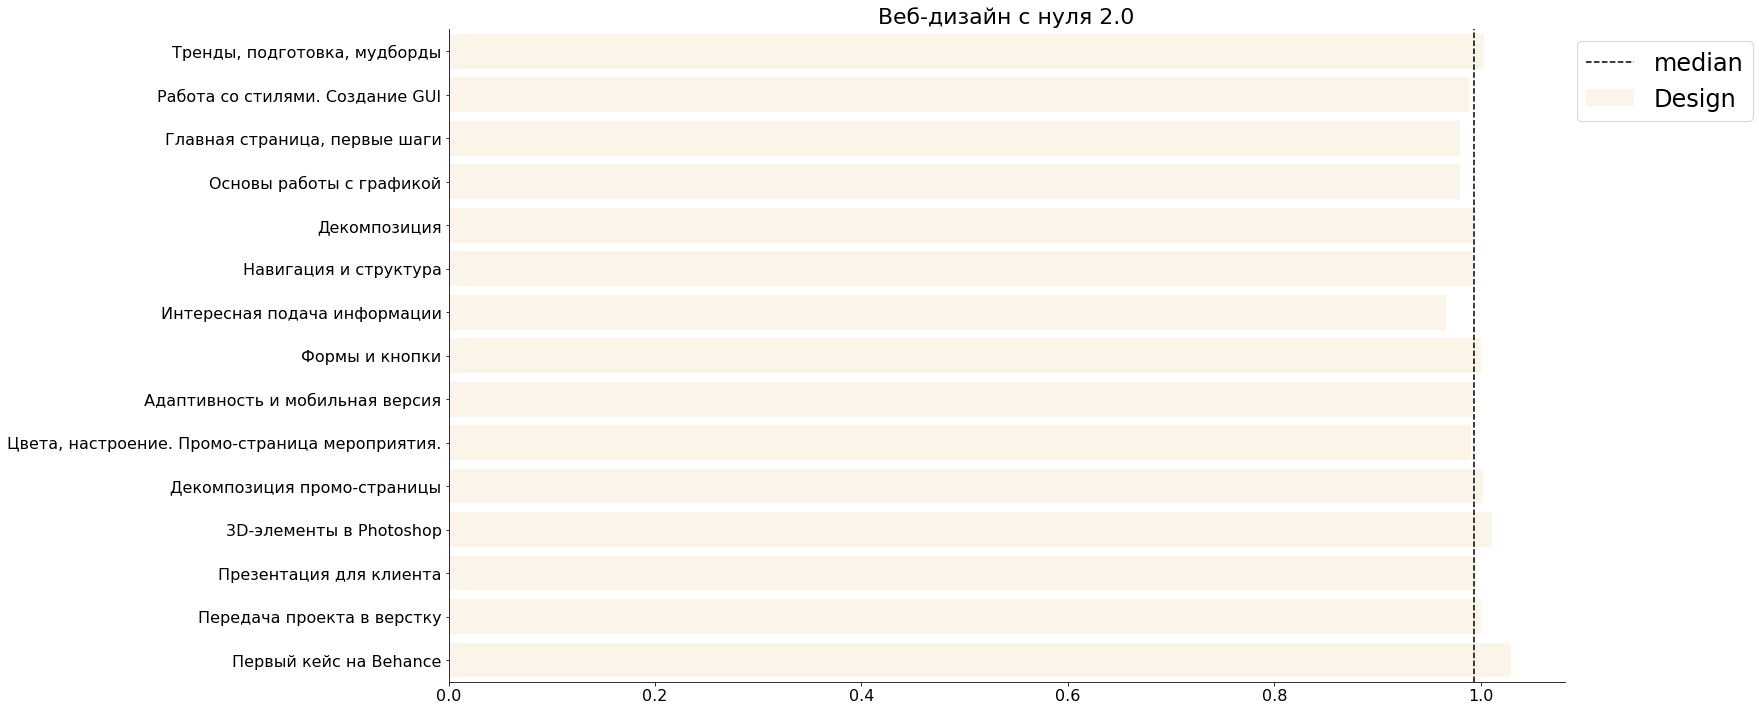

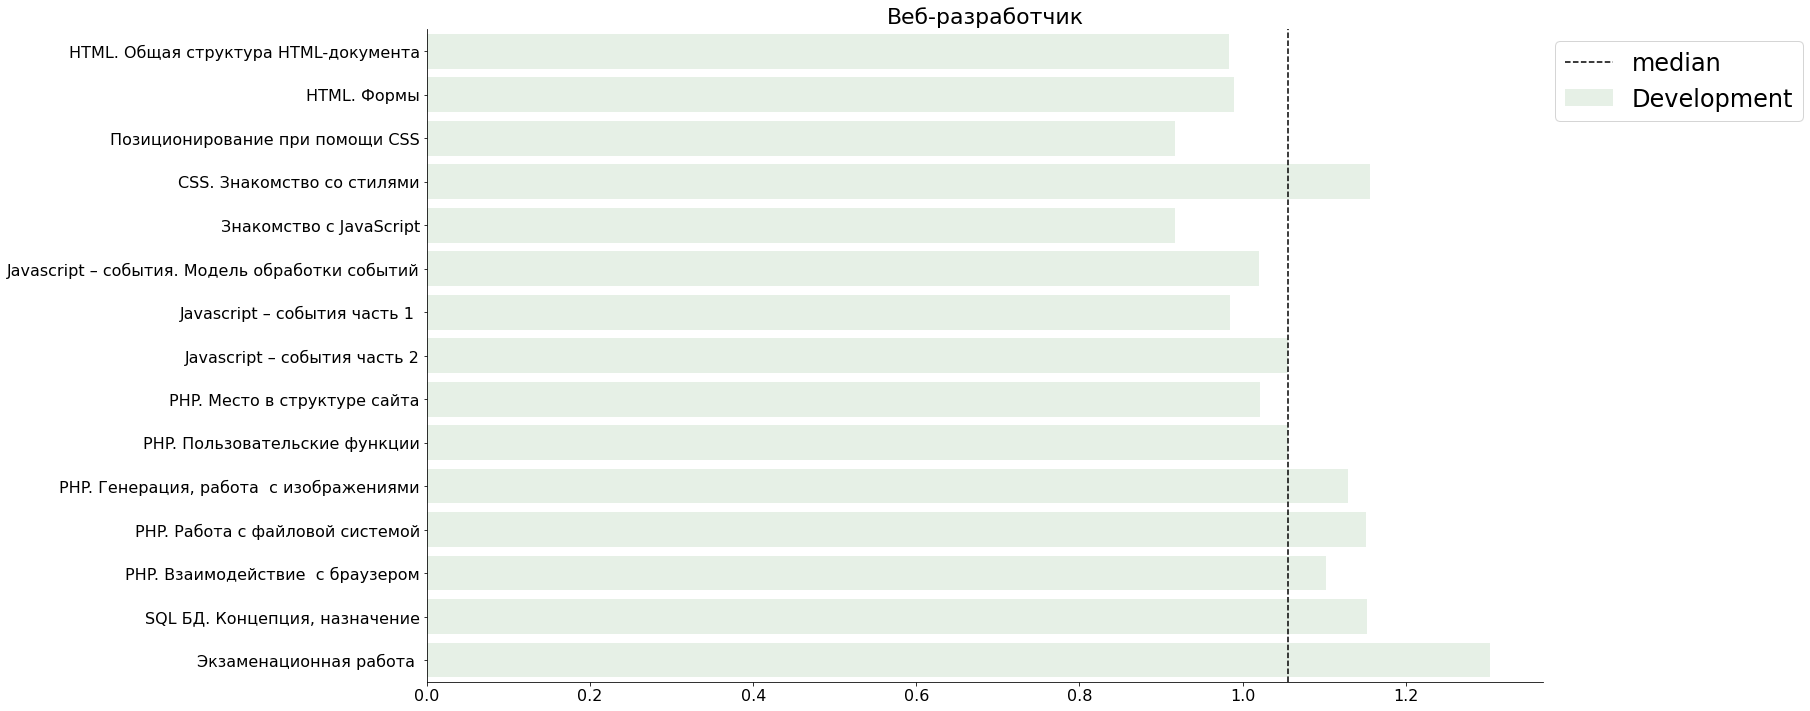

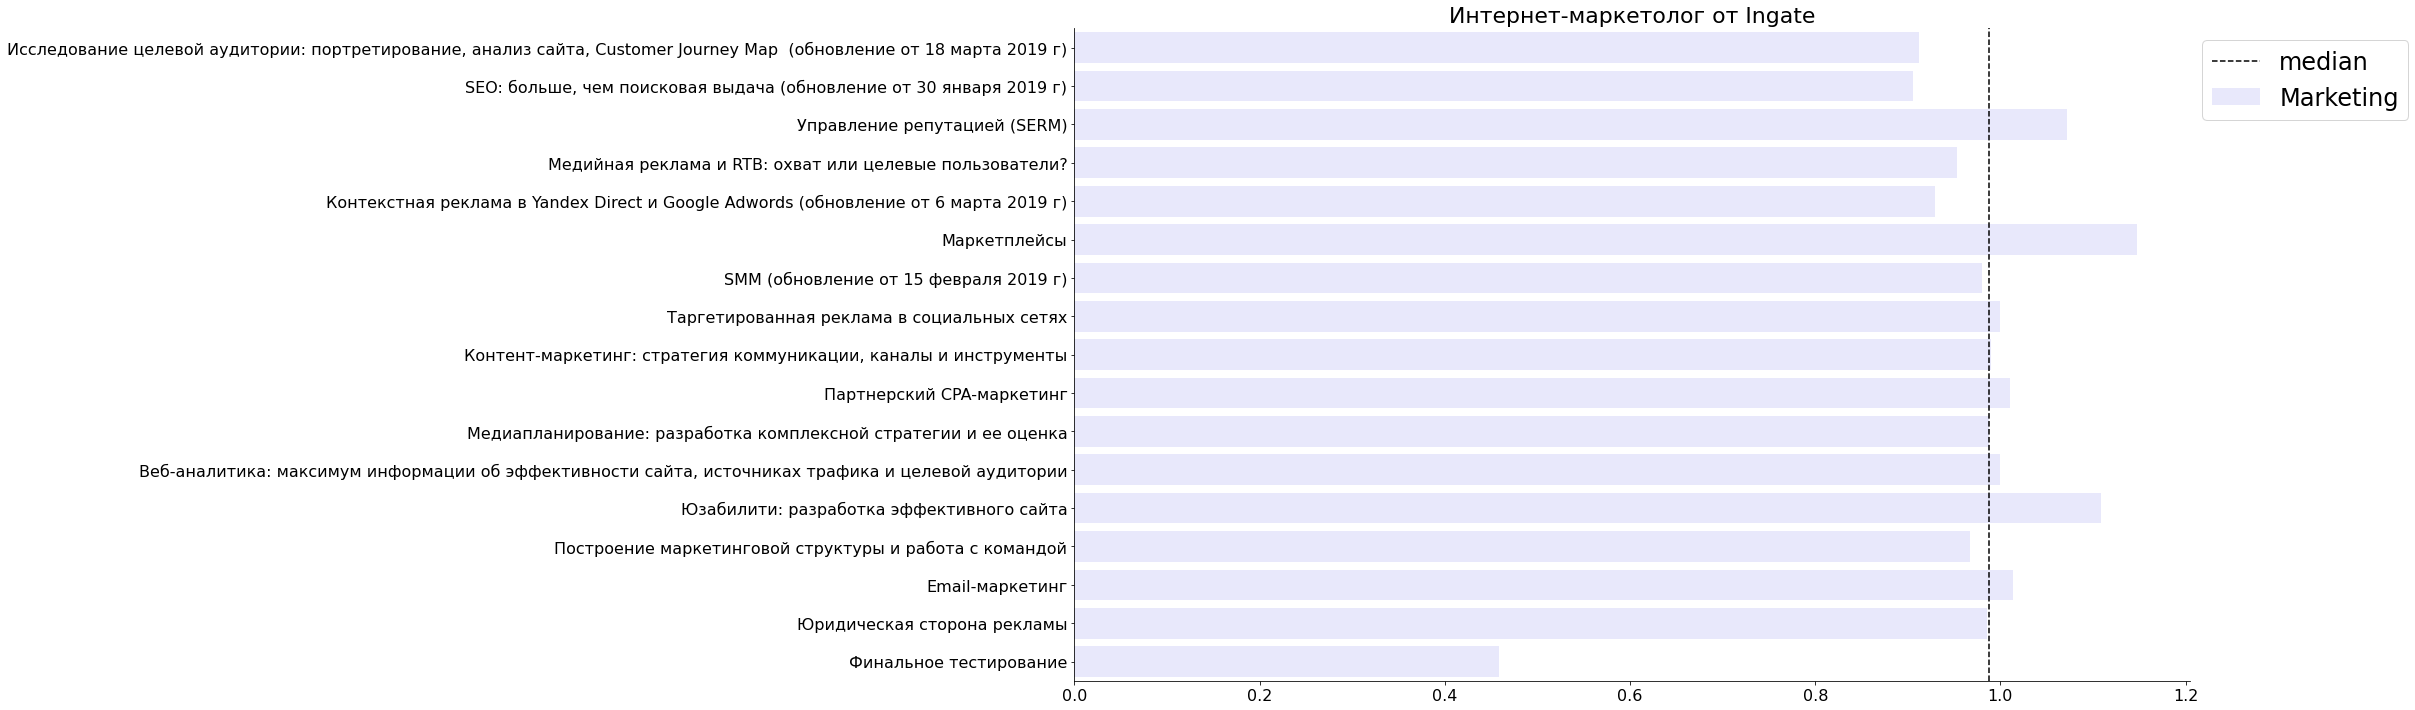

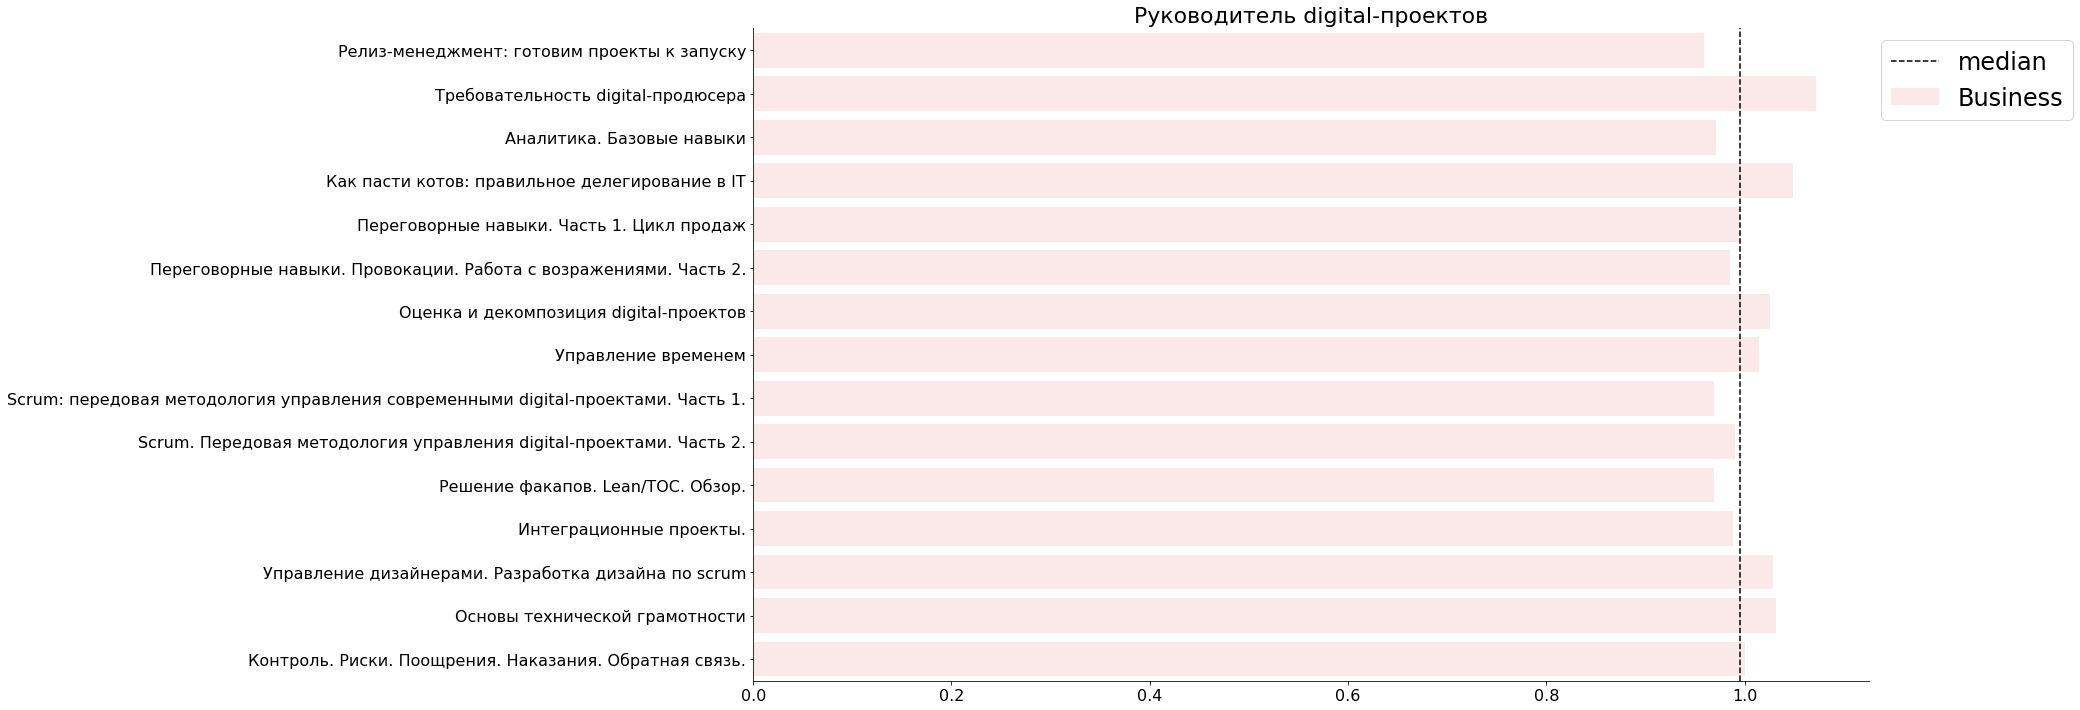

In [44]:
# сохраняем в переменную название всех курсов:
courses = result_conv['course'].unique()

# создаем датасет и присваиваем каждой сфере цвет:
colors = pd.DataFrame({'field': ['Marketing', 'Design', 'Development', 'Business'],
                       'color': ['blue', 'orange', 'green', 'red']})
                      
for i in range(15):
    
    # сохраняем в переменную данные определенного курса:
    data = result_conv[result_conv['course'] == courses[i]]
    
    # добавляем в датасет колонку с цветом:
    data = data.merge(colors, left_on='field', right_on='field')
    
    # сохраняем в переменную цвет:
    color = data['color'].unique()
    
    # удаляем первую строку:
    data = data.iloc [1: , :]
    
    fig, ax = plt.subplots(figsize=(20, 12))
    
    # строим график 
    sns.barplot(x = 'conversion', y = 'module_title', data = data, hue = 'field', palette = [color[0]], alpha = 0.1)

    # строим медиану
    plt.axvline(data['conversion'].median(), color = 'k', linestyle='--', label = 'median')

    # скрываем заголовки осей 
    ax.set_ylabel('')    
    ax.set_xlabel('')
    
    # добавляем заголовок и увеличиваем шрифт меток 
    ax.set_title(courses[i], fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    # выносим легенду за границы поля графика:
    plt.legend(bbox_to_anchor=(1, 1), fontsize=24)
    
    # скрываем верхнюю и правую рамки графика
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')

    plt.show()

### Вывод:
Основываясь на полученные графики конверсии перехода студентов из одного модуля в другой на каждом курсе можно сделать вывод:  
Курс **'Excel Базовый'**. Конверсия практически всех модулей имеет одинаковый уровень и не превышает 1, за исключением последних модулей **'Сводная таблица Excel'** и **'Экзаменационная работа'**. Модули **'Основной функционал Excel (продолжение)'** и **'Формулы и функции Excel. Введение'** не дотягивают по до медианного значения всего курса.  

Курс **'Java разработчик'**. На протяжении всего курса конверсия увеличивается и в середине курса достигает единицы и медиального значения. Тем неменее боленство курсов имеют убывающую конверсию.  

Курс **'Java разработчик с нуля'**. Заметное превышение конверсии (в 6 раз) наблюдается у модуля **'Числа, строки и даты'** . Ниже линии медианы расположились модули **'Массивы и коллекции'**, **'Наследование и полиформизм'**, **'Особенности ООП в Java'**.  

Курс **'JavaScript с нуля'**. В модулях **'Redux'** и **'Экзаменационное задание'** можно наблюдать значительное повышение уровня конверсии относительно медианного значения. По остальным модулям конвенция приблизительно ровна медиане.  

Курс **'PHP-разработчик с 0 до PRO. Часть 1'**. Высокая конверсия наблюдается в молулях **'Протокол HTTP/HTTPS'**, **'Курсовая работа'**. В модуле **'Файлы и каталоги'** заметно небольшое отклонение от медианного значения конверсии в большую сторону. Наоборот в меньшую сторону отклонилось значение конверсии у модуля **'Структура управления данными. Базовые концепции PHP 7'**  

Курс **'SMM-маркетолог от А до Я'**. В курсе наблюдаются большое отклонение конверсии в модуле **'Продвижение VK, FB, MyTarget'** и имеет в разы большую конверсию по сравнению с остальными модулями данного курса. **'Дизайн для недизайнеров'** обладает заметной отрицательной конверсией.  

Курс **'UX-дизайн'**. Конверсия во многих модулей приблизительно равна медиальному значению, за исключением курсов: **'Concept design: теория и практика'**, **'Техника успешной презентации'**, **'Специализация и карьера'**, **'Экзаменационная тема'** - конверсия значительно выше медианы; **'Visual design теория и практика'** - конверсия значительно ниже медианы.  

Курс **'Анимация интерфейсов'**. Конверсия модуля **'Чистая магия - создание продающего шоурила'** значительно превышает значения медианы. В остальных модулях с небольшими отклонениями  конверсия близка к медиане.

Курс **'Веб-вёрстка для начинающих 2.0'**. В данном курсе наблюдается постепенное повышение конверсии от модуля к модулю и к середине курса становится равна медиана. После заметно небольшое превышение конверсии по отношении медиального значения.  

Курс **'Веб-дизайн PRO 2.0'**. Сильно выделяются модули **'Введение в UX'** и **'Портреты пользователей и CJM'**. В них наблюдается сильное превышение и нонижение конверсии, соответственно. В остальных модулях конверсия близка к медиане.  

Курсы **'Веб-дизайн Базовый'** и **'Веб-дизайн с нуля 2.0'**. За исключением последнего итогового модуля в курсе **'Веб-дизайн Базовый'** конверсия во обоих курсах практически равна медиальному значению.  

Курс **'Веб-разработчик'**. Модуль **'Экзаменационная работа'** имеет наибольший показатель в отличие от уровня конверсии всех остальных модулей курса. Наименьшие показатели имеют модули **'Знакомство с JavaScript'**, **'Позиционирование при помощи CSS'**.  

Курс **'Интернет-маркитолог от ingate'**. Из всех модулей сильнее всего выделяются модули: **'Финальное тестирование'** - конверсия ниже медианы более чем в 2 раза; **'Управление репутацией (SERM)'**, **'Маркетплейсы'**, **'Юзабилити: разработка эффективного сайта'** - значение конверсии значительно выше медиального значения.  

Курс **'Руководитель digital-проектов'**. Конверсия всех модулей данного курса близка к значению медианы. К исключениям можно отнести модули **'Как пасти котов. Правильное делегирование в IT'** и **'Требовательность digital-продюсера'**, в них наблюдается небольшое превышение конверсии от отношению к медиане.  

Подводя общие выводы, можно сказать, что медианное значение конверсии приблизительно равно единице. Это говорит о том, что большая часть студентов в равной степени переходит от модуля к модулю. 